In [62]:
import numpy as np
import pandas as pd
import re
import requests
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings('ignore')

import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [63]:
Icc_WTC_Bowling_Stats = pd.read_csv(r'E:\Data Science\01 Python folder\Projects\Icc_WTC_Bowling_Stats.csv')

In [64]:
Icc_WTC_Bowling_Stats

,Unnamed: 0,Name,Span,Matches,innings,Overs,Maidens,Runs_concede,Wickets,Best_Bowling_innings,Best_Bowling_match,Average,Economy,Strike_rate,fifer_5,ten_wickets,country
0,0,PJ Cummins,2019-2022,22*,43,804.2,220,2146,104,5/28,8/79,20.63,2.66,46.4,3,0,AUS
1,1,R Ashwin,2019-2022,21,40,786.1,165,1966,100,7/145,9/207,19.66,2.50,47.1,4,0,INDIA
2,2,SCJ Broad,2019-2022,24,46,775.1,189,2239,95,6/31,10/67,23.56,2.88,48.9,3,1,ENG
3,3,TG Southee,2019-2022,20,40,798.4,189,2365,89,5/32,9/110,26.57,2.96,53.8,5,0,NZ
4,4,NM Lyon,2019-2022,23*,41,1038.0,233,2763,89,6/49,10/118,31.04,2.66,69.9,6,1,AUS
5,5,JJ Bumrah,2019-2022,19,36,606.0,155,1600,74,6/27,9/110,21.62,2.64,49.1,5,0,INDIA
6,6,JM Anderson,2019-2022,21,37,672.0,219,1523,73,6/40,7/63,20.86,2.26,55.2,4,0,ENG
7,7,Shaheen Shah Afridi,2019-2022,19,31,625.1,137,1842,73,6/51,10/94,25.23,2.94,51.3,3,1,PAK
8,8,MA Starc,2019-2022,19*,37,604.2,132,1866,72,6/66,9/97,25.91,3.08,50.3,2,0,AUS
9,9,Mohammed Shami,2019-2022,19,35,507.1,116,1535,70,5/35,8/107,21.92,3.02,43.4,2,0,INDIA


In [65]:
Icc_WTC_Bowling_Stats.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            47 non-null     int64  
 1   Name                  47 non-null     object 
 2   Span                  47 non-null     object 
 3   Matches               47 non-null     object 
 4   innings               47 non-null     int64  
 5   Overs                 47 non-null     float64
 6   Maidens               47 non-null     int64  
 7   Runs_concede          47 non-null     int64  
 8   Wickets               47 non-null     int64  
 9   Best_Bowling_innings  47 non-null     object 
 10  Best_Bowling_match    47 non-null     object 
 11  Average               47 non-null     float64
 12  Economy               47 non-null     float64
 13  Strike_rate           47 non-null     float64
 14  fifer_5               47 non-null     int64  
 15  ten_wickets           47 

In [66]:

Icc_WTC_Bowling_Stats['Matches'] = Icc_WTC_Bowling_Stats['Matches'].str.replace('*', '')

In [67]:
Icc_WTC_Bowling_Stats[['Matches']]= Icc_WTC_Bowling_Stats[['Matches']].astype(int)

In [68]:
Icc_WTC_Bowling_Stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            47 non-null     int64  
 1   Name                  47 non-null     object 
 2   Span                  47 non-null     object 
 3   Matches               47 non-null     int32  
 4   innings               47 non-null     int64  
 5   Overs                 47 non-null     float64
 6   Maidens               47 non-null     int64  
 7   Runs_concede          47 non-null     int64  
 8   Wickets               47 non-null     int64  
 9   Best_Bowling_innings  47 non-null     object 
 10  Best_Bowling_match    47 non-null     object 
 11  Average               47 non-null     float64
 12  Economy               47 non-null     float64
 13  Strike_rate           47 non-null     float64
 14  fifer_5               47 non-null     int64  
 15  ten_wickets           47 

In [69]:
Icc_WTC_Bowling_Stats

,Unnamed: 0,Name,Span,Matches,innings,Overs,Maidens,Runs_concede,Wickets,Best_Bowling_innings,Best_Bowling_match,Average,Economy,Strike_rate,fifer_5,ten_wickets,country
0,0,PJ Cummins,2019-2022,22,43,804.2,220,2146,104,5/28,8/79,20.63,2.66,46.4,3,0,AUS
1,1,R Ashwin,2019-2022,21,40,786.1,165,1966,100,7/145,9/207,19.66,2.50,47.1,4,0,INDIA
2,2,SCJ Broad,2019-2022,24,46,775.1,189,2239,95,6/31,10/67,23.56,2.88,48.9,3,1,ENG
3,3,TG Southee,2019-2022,20,40,798.4,189,2365,89,5/32,9/110,26.57,2.96,53.8,5,0,NZ
4,4,NM Lyon,2019-2022,23,41,1038.0,233,2763,89,6/49,10/118,31.04,2.66,69.9,6,1,AUS
5,5,JJ Bumrah,2019-2022,19,36,606.0,155,1600,74,6/27,9/110,21.62,2.64,49.1,5,0,INDIA
6,6,JM Anderson,2019-2022,21,37,672.0,219,1523,73,6/40,7/63,20.86,2.26,55.2,4,0,ENG
7,7,Shaheen Shah Afridi,2019-2022,19,31,625.1,137,1842,73,6/51,10/94,25.23,2.94,51.3,3,1,PAK
8,8,MA Starc,2019-2022,19,37,604.2,132,1866,72,6/66,9/97,25.91,3.08,50.3,2,0,AUS
9,9,Mohammed Shami,2019-2022,19,35,507.1,116,1535,70,5/35,8/107,21.92,3.02,43.4,2,0,INDIA


In [70]:
Icc_WTC_Bowling_Stats.drop('Unnamed: 0' , axis = 1, inplace=True)


In [71]:
Icc_WTC_Bowling_Stats

,Name,Span,Matches,innings,Overs,Maidens,Runs_concede,Wickets,Best_Bowling_innings,Best_Bowling_match,Average,Economy,Strike_rate,fifer_5,ten_wickets,country
0,PJ Cummins,2019-2022,22,43,804.2,220,2146,104,5/28,8/79,20.63,2.66,46.4,3,0,AUS
1,R Ashwin,2019-2022,21,40,786.1,165,1966,100,7/145,9/207,19.66,2.50,47.1,4,0,INDIA
2,SCJ Broad,2019-2022,24,46,775.1,189,2239,95,6/31,10/67,23.56,2.88,48.9,3,1,ENG
3,TG Southee,2019-2022,20,40,798.4,189,2365,89,5/32,9/110,26.57,2.96,53.8,5,0,NZ
4,NM Lyon,2019-2022,23,41,1038.0,233,2763,89,6/49,10/118,31.04,2.66,69.9,6,1,AUS
5,JJ Bumrah,2019-2022,19,36,606.0,155,1600,74,6/27,9/110,21.62,2.64,49.1,5,0,INDIA
6,JM Anderson,2019-2022,21,37,672.0,219,1523,73,6/40,7/63,20.86,2.26,55.2,4,0,ENG
7,Shaheen Shah Afridi,2019-2022,19,31,625.1,137,1842,73,6/51,10/94,25.23,2.94,51.3,3,1,PAK
8,MA Starc,2019-2022,19,37,604.2,132,1866,72,6/66,9/97,25.91,3.08,50.3,2,0,AUS
9,Mohammed Shami,2019-2022,19,35,507.1,116,1535,70,5/35,8/107,21.92,3.02,43.4,2,0,INDIA


In [72]:
Icc_WTC_Bowling_Stats.to_csv(r'E:\Data Science\01 Python folder\Projects\Icc_WTC_Bowling_Stats.csv')
Icc_WTC_Bowling_Stats.to_excel(r'E:\Data Science\01 Python folder\Projects\Icc_WTC_Bowling_Stats.xlsx')

In [73]:
Icc_WTC_Bowling_Stats

,Name,Span,Matches,innings,Overs,Maidens,Runs_concede,Wickets,Best_Bowling_innings,Best_Bowling_match,Average,Economy,Strike_rate,fifer_5,ten_wickets,country
0,PJ Cummins,2019-2022,22,43,804.2,220,2146,104,5/28,8/79,20.63,2.66,46.4,3,0,AUS
1,R Ashwin,2019-2022,21,40,786.1,165,1966,100,7/145,9/207,19.66,2.50,47.1,4,0,INDIA
2,SCJ Broad,2019-2022,24,46,775.1,189,2239,95,6/31,10/67,23.56,2.88,48.9,3,1,ENG
3,TG Southee,2019-2022,20,40,798.4,189,2365,89,5/32,9/110,26.57,2.96,53.8,5,0,NZ
4,NM Lyon,2019-2022,23,41,1038.0,233,2763,89,6/49,10/118,31.04,2.66,69.9,6,1,AUS
5,JJ Bumrah,2019-2022,19,36,606.0,155,1600,74,6/27,9/110,21.62,2.64,49.1,5,0,INDIA
6,JM Anderson,2019-2022,21,37,672.0,219,1523,73,6/40,7/63,20.86,2.26,55.2,4,0,ENG
7,Shaheen Shah Afridi,2019-2022,19,31,625.1,137,1842,73,6/51,10/94,25.23,2.94,51.3,3,1,PAK
8,MA Starc,2019-2022,19,37,604.2,132,1866,72,6/66,9/97,25.91,3.08,50.3,2,0,AUS
9,Mohammed Shami,2019-2022,19,35,507.1,116,1535,70,5/35,8/107,21.92,3.02,43.4,2,0,INDIA


# Visualisation

In [74]:
# import libraries
import pandas as pd
import numpy as np

import sidetable # for frequency table
# use: pip install sidetable for installation

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use('bmh')

import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# for HD visualizations
%config InlineBackend.figure_format='retina'

## Uni variat

### Distribution plot for Matches 

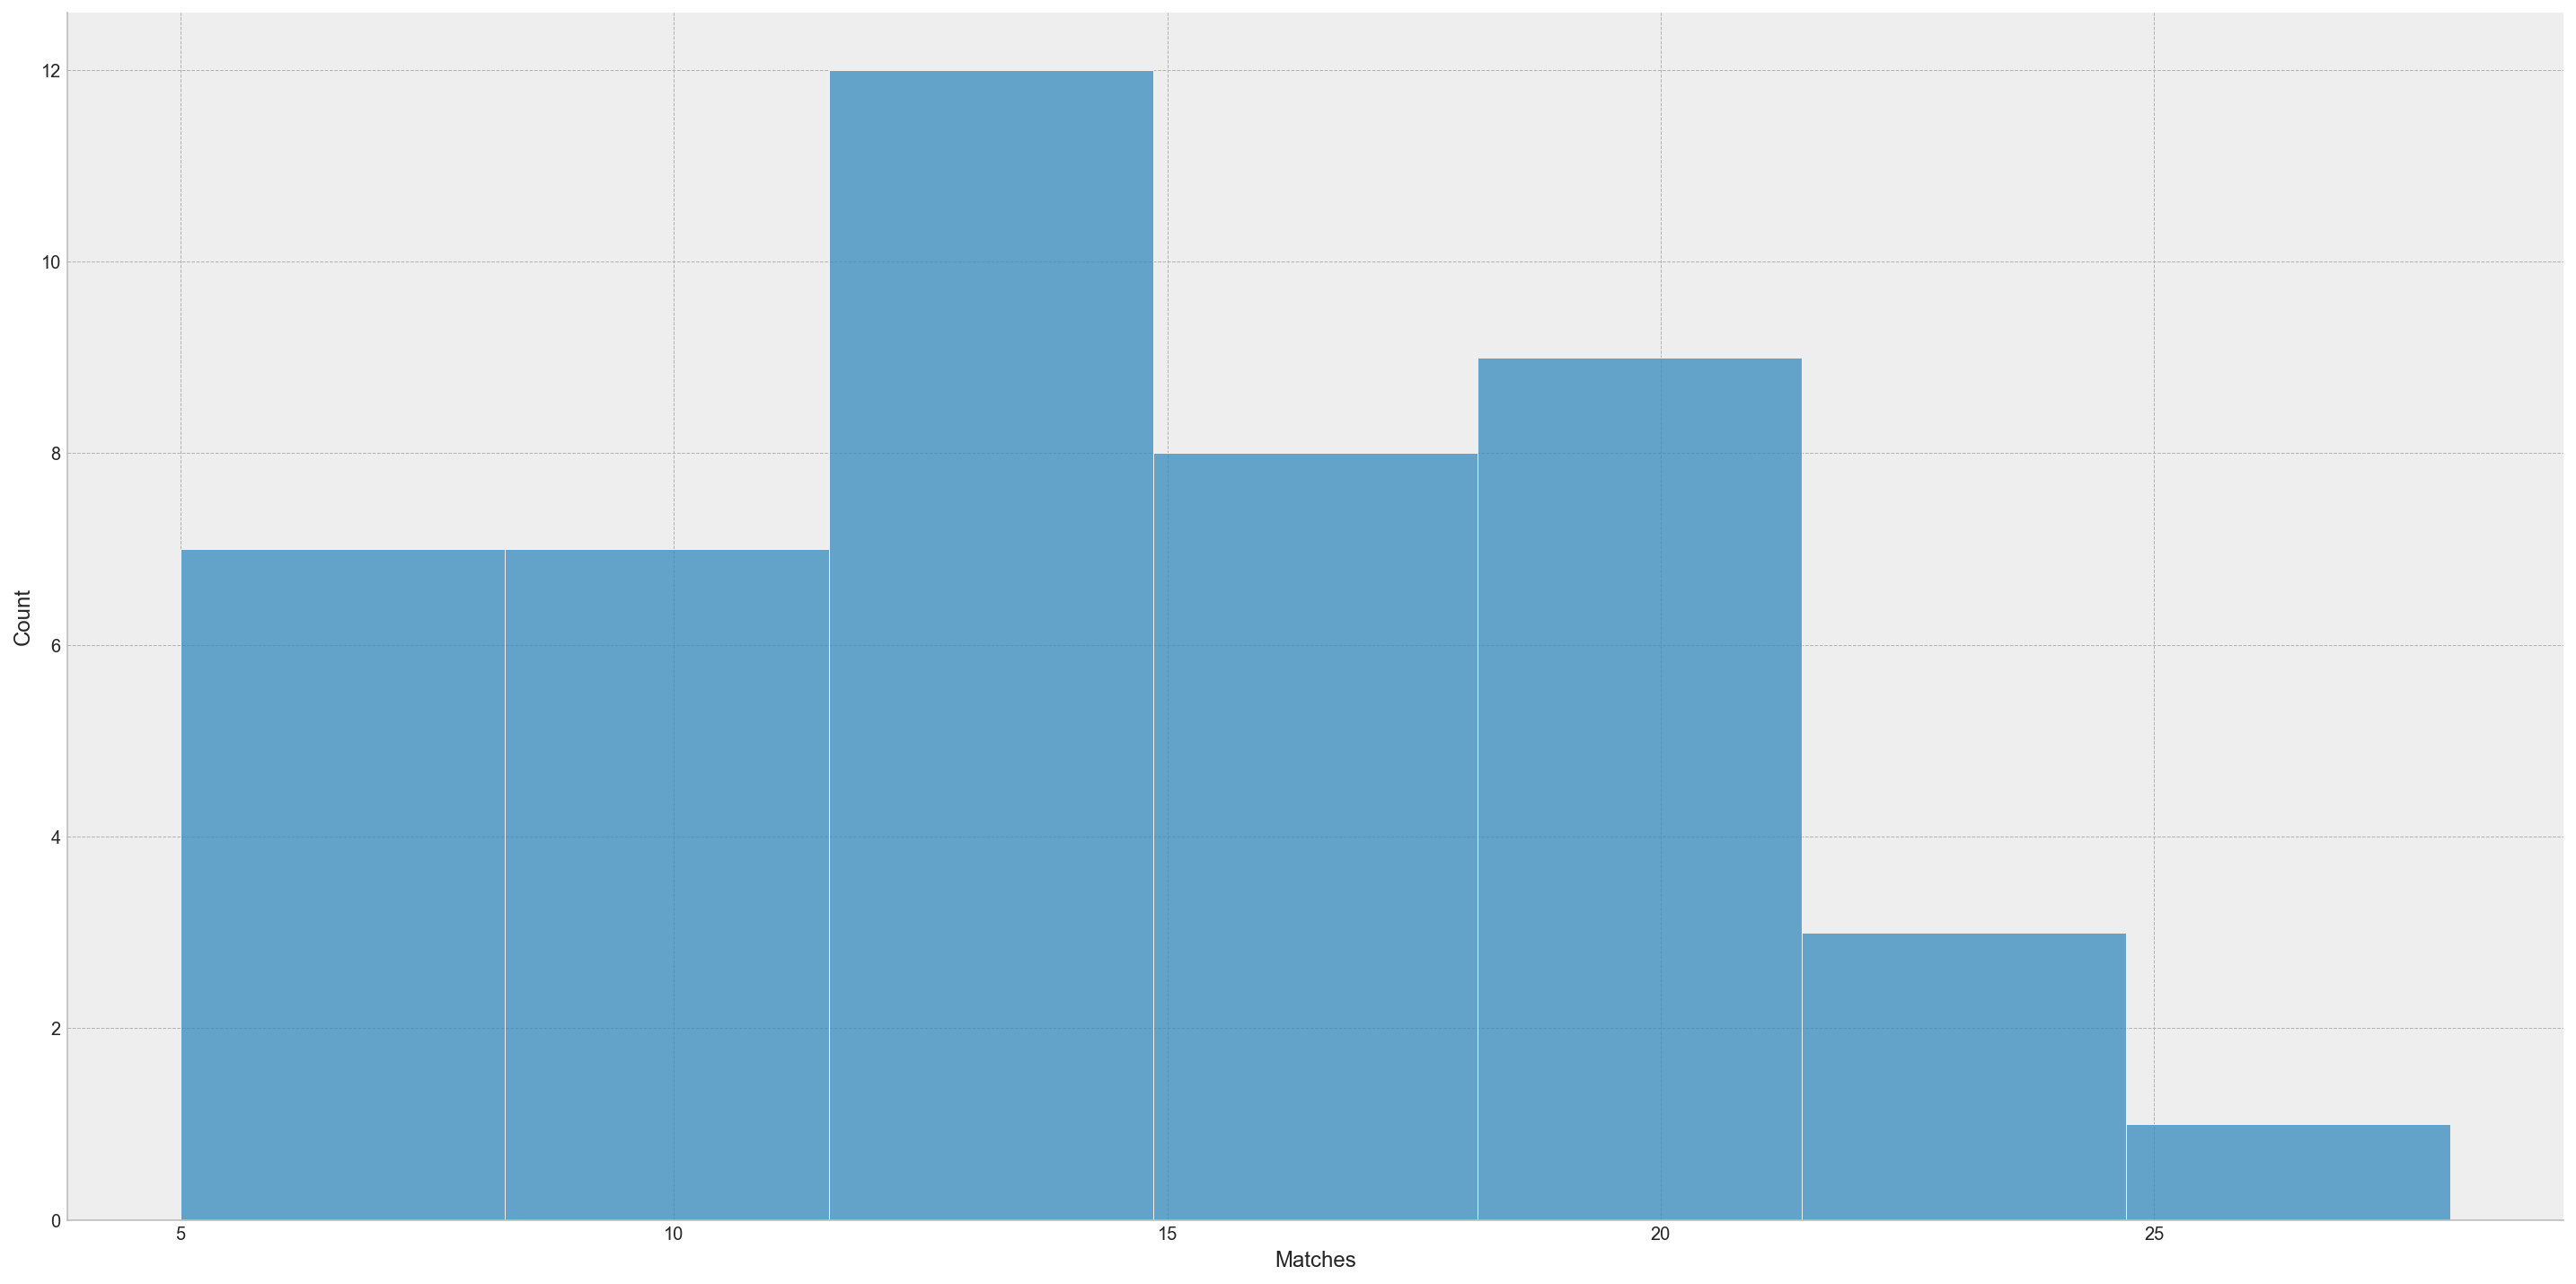

In [75]:
sns.displot(data =Icc_WTC_Bowling_Stats , x = 'Matches', height=10, aspect =10/5);

### Distribution plot for innings

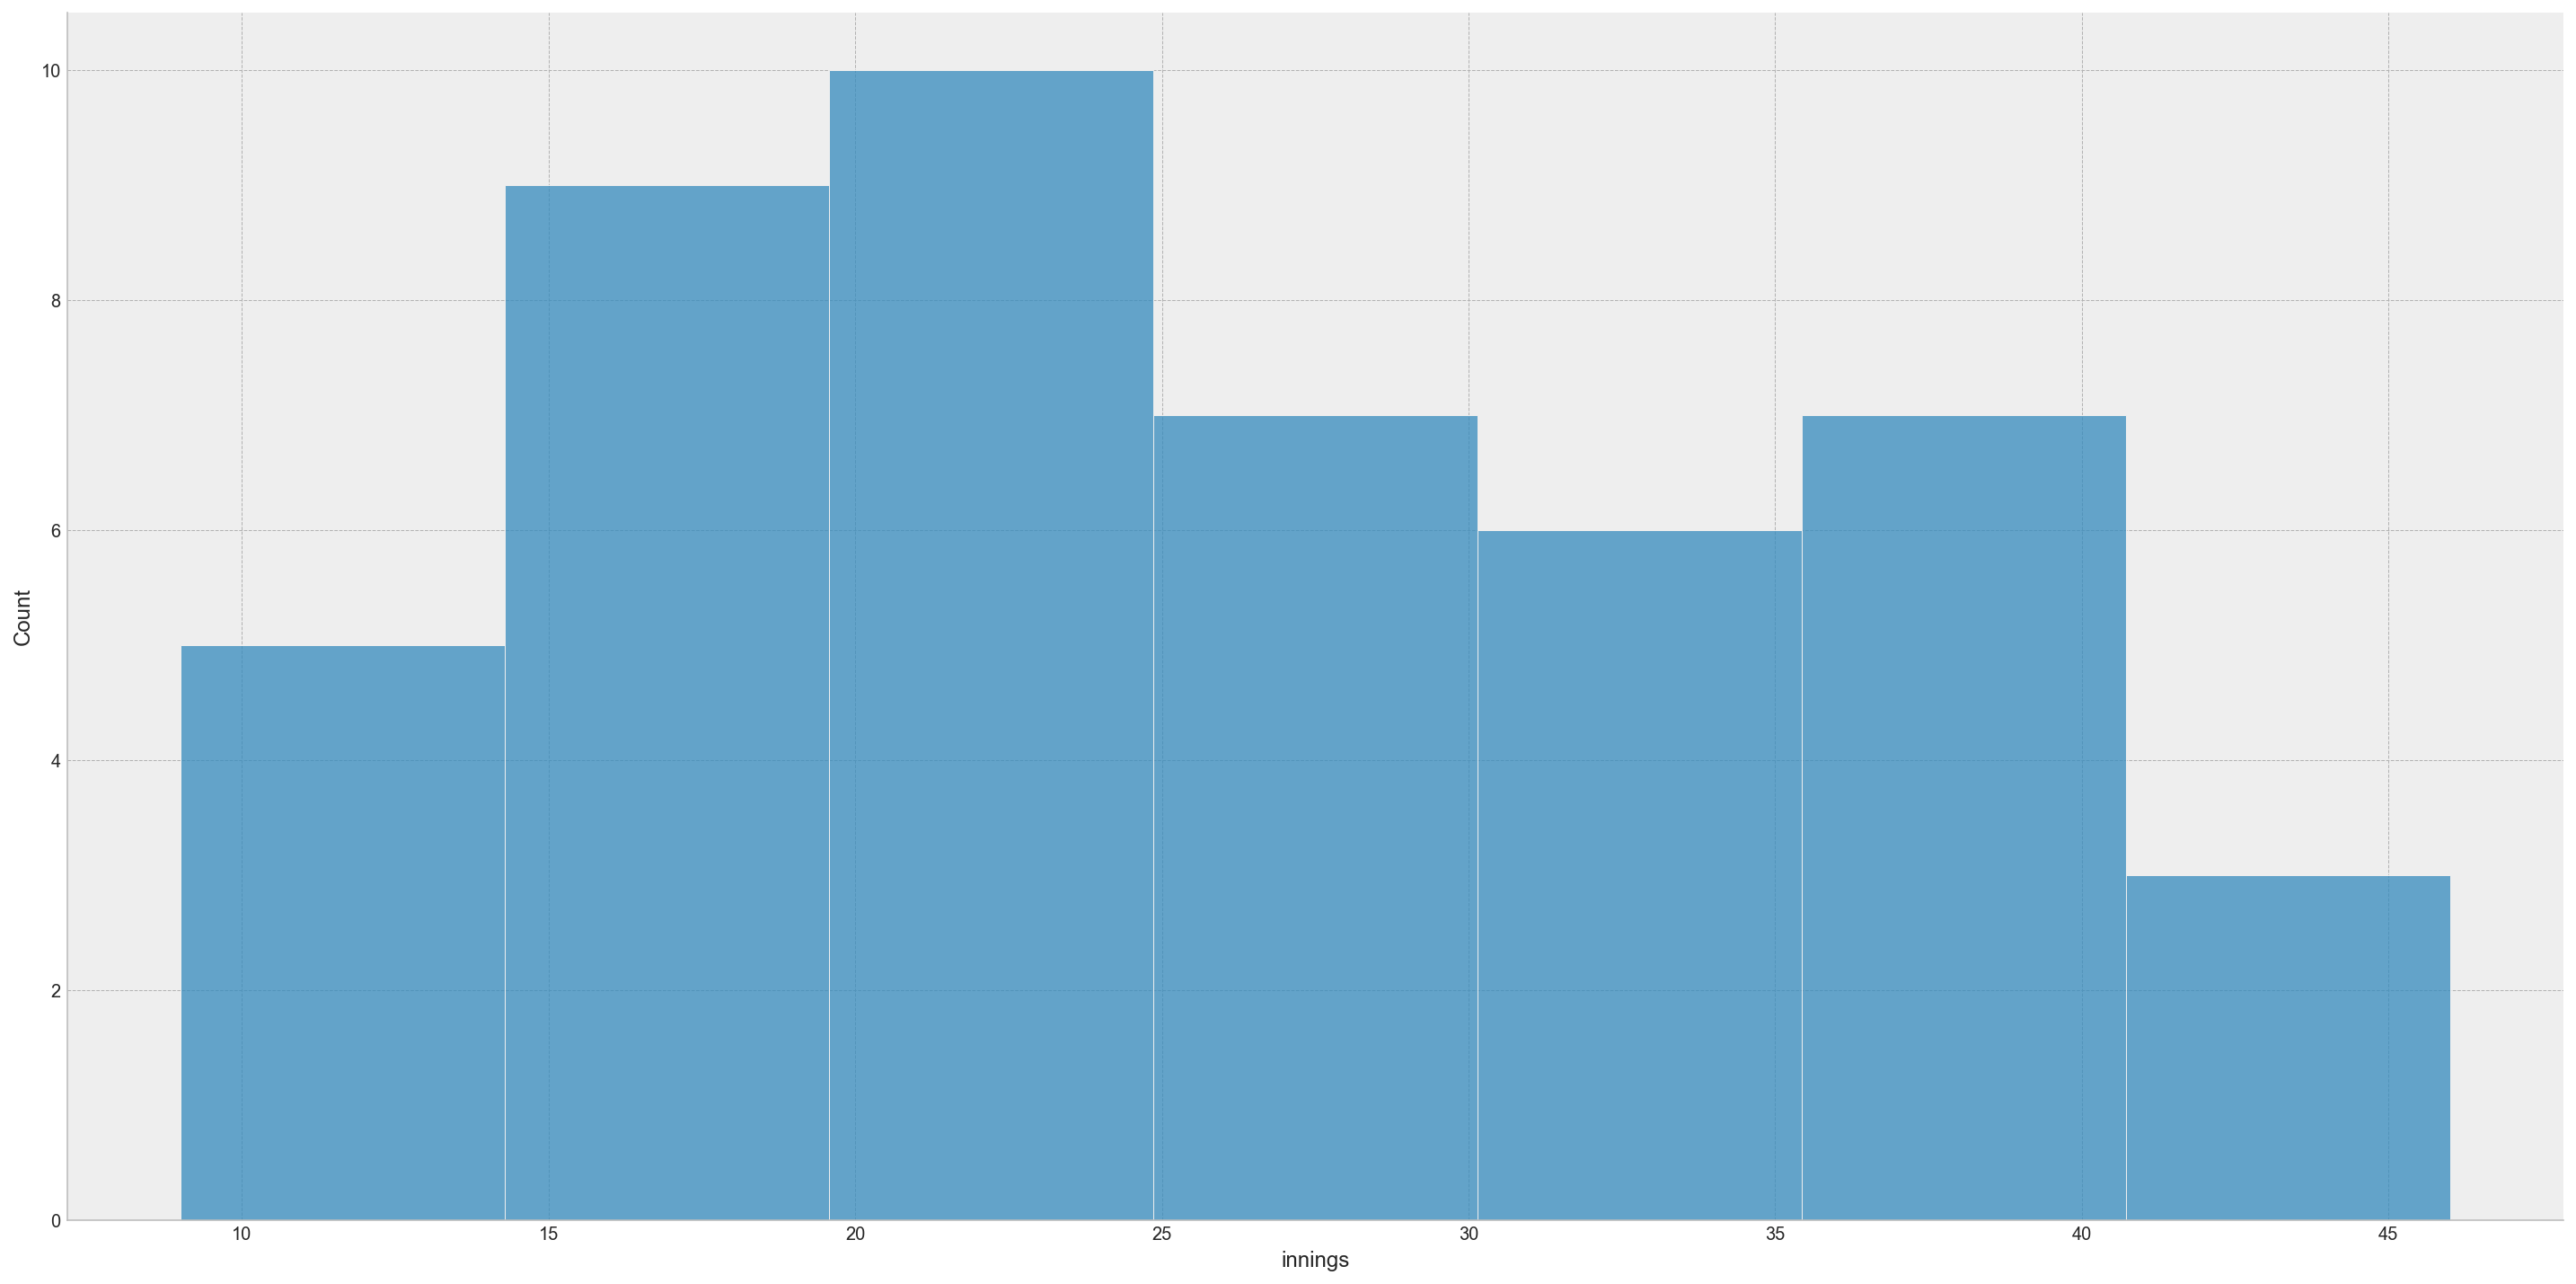

In [76]:
sns.displot(data =Icc_WTC_Bowling_Stats , x = 'innings', height=10, aspect =10/5);

### Distribution plot for Overs

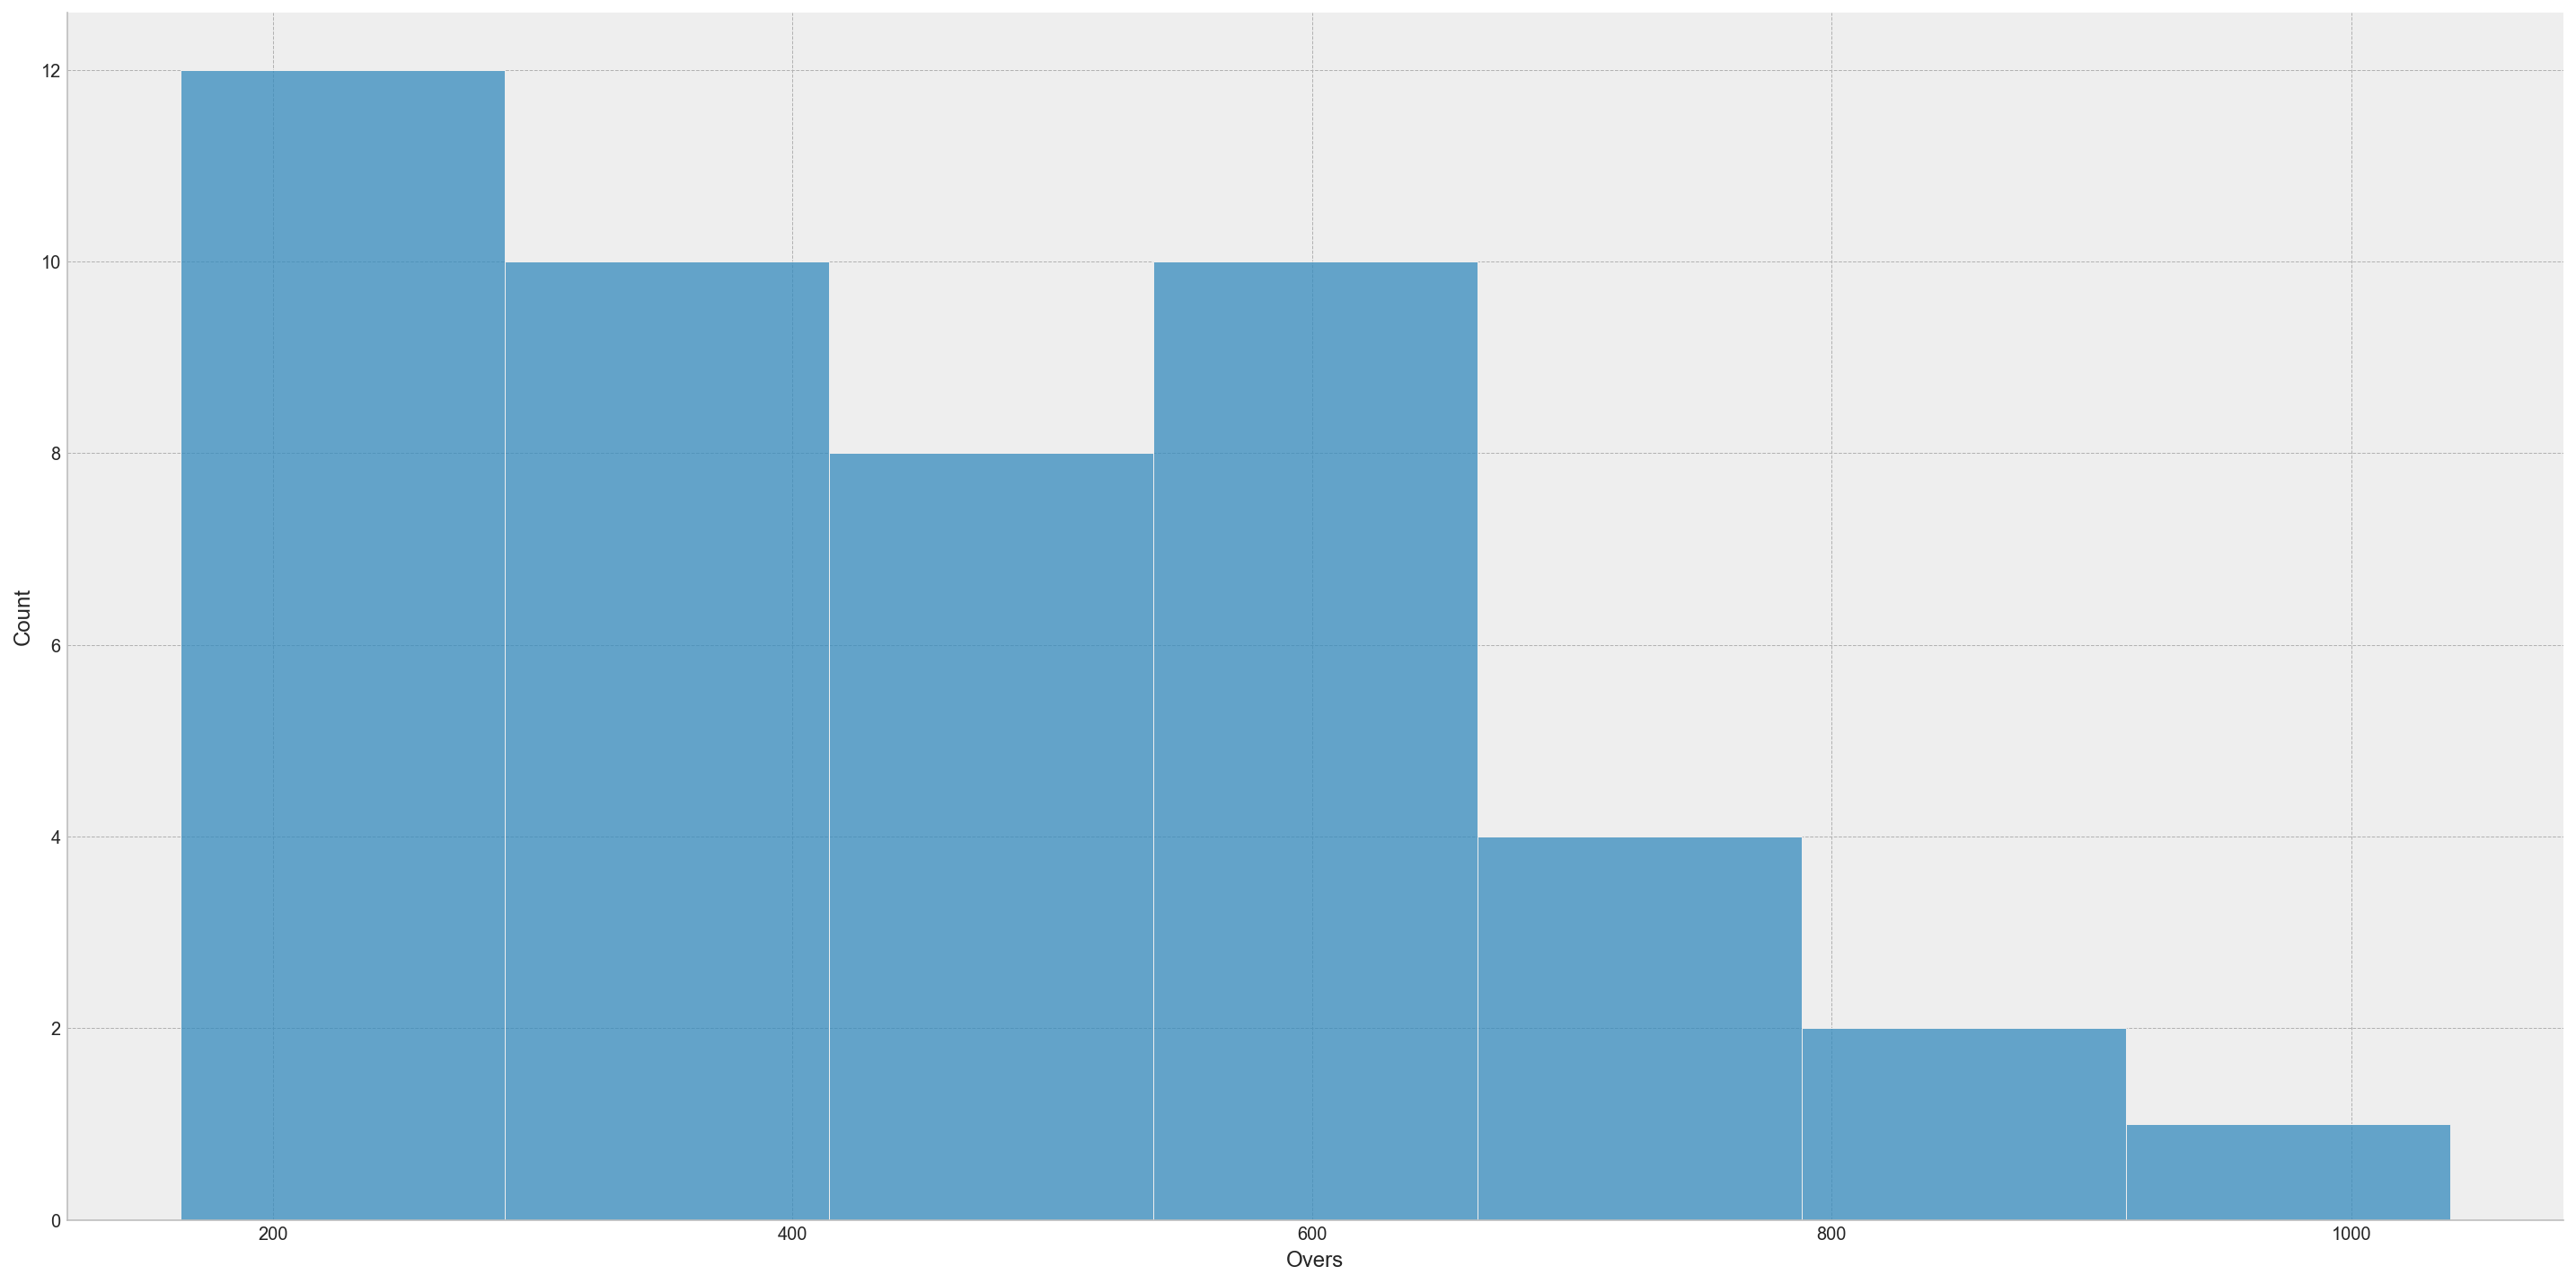

In [77]:
sns.displot(data =Icc_WTC_Bowling_Stats , x = 'Overs', height=10, aspect =10/5);

### Distribution plot for Maidens

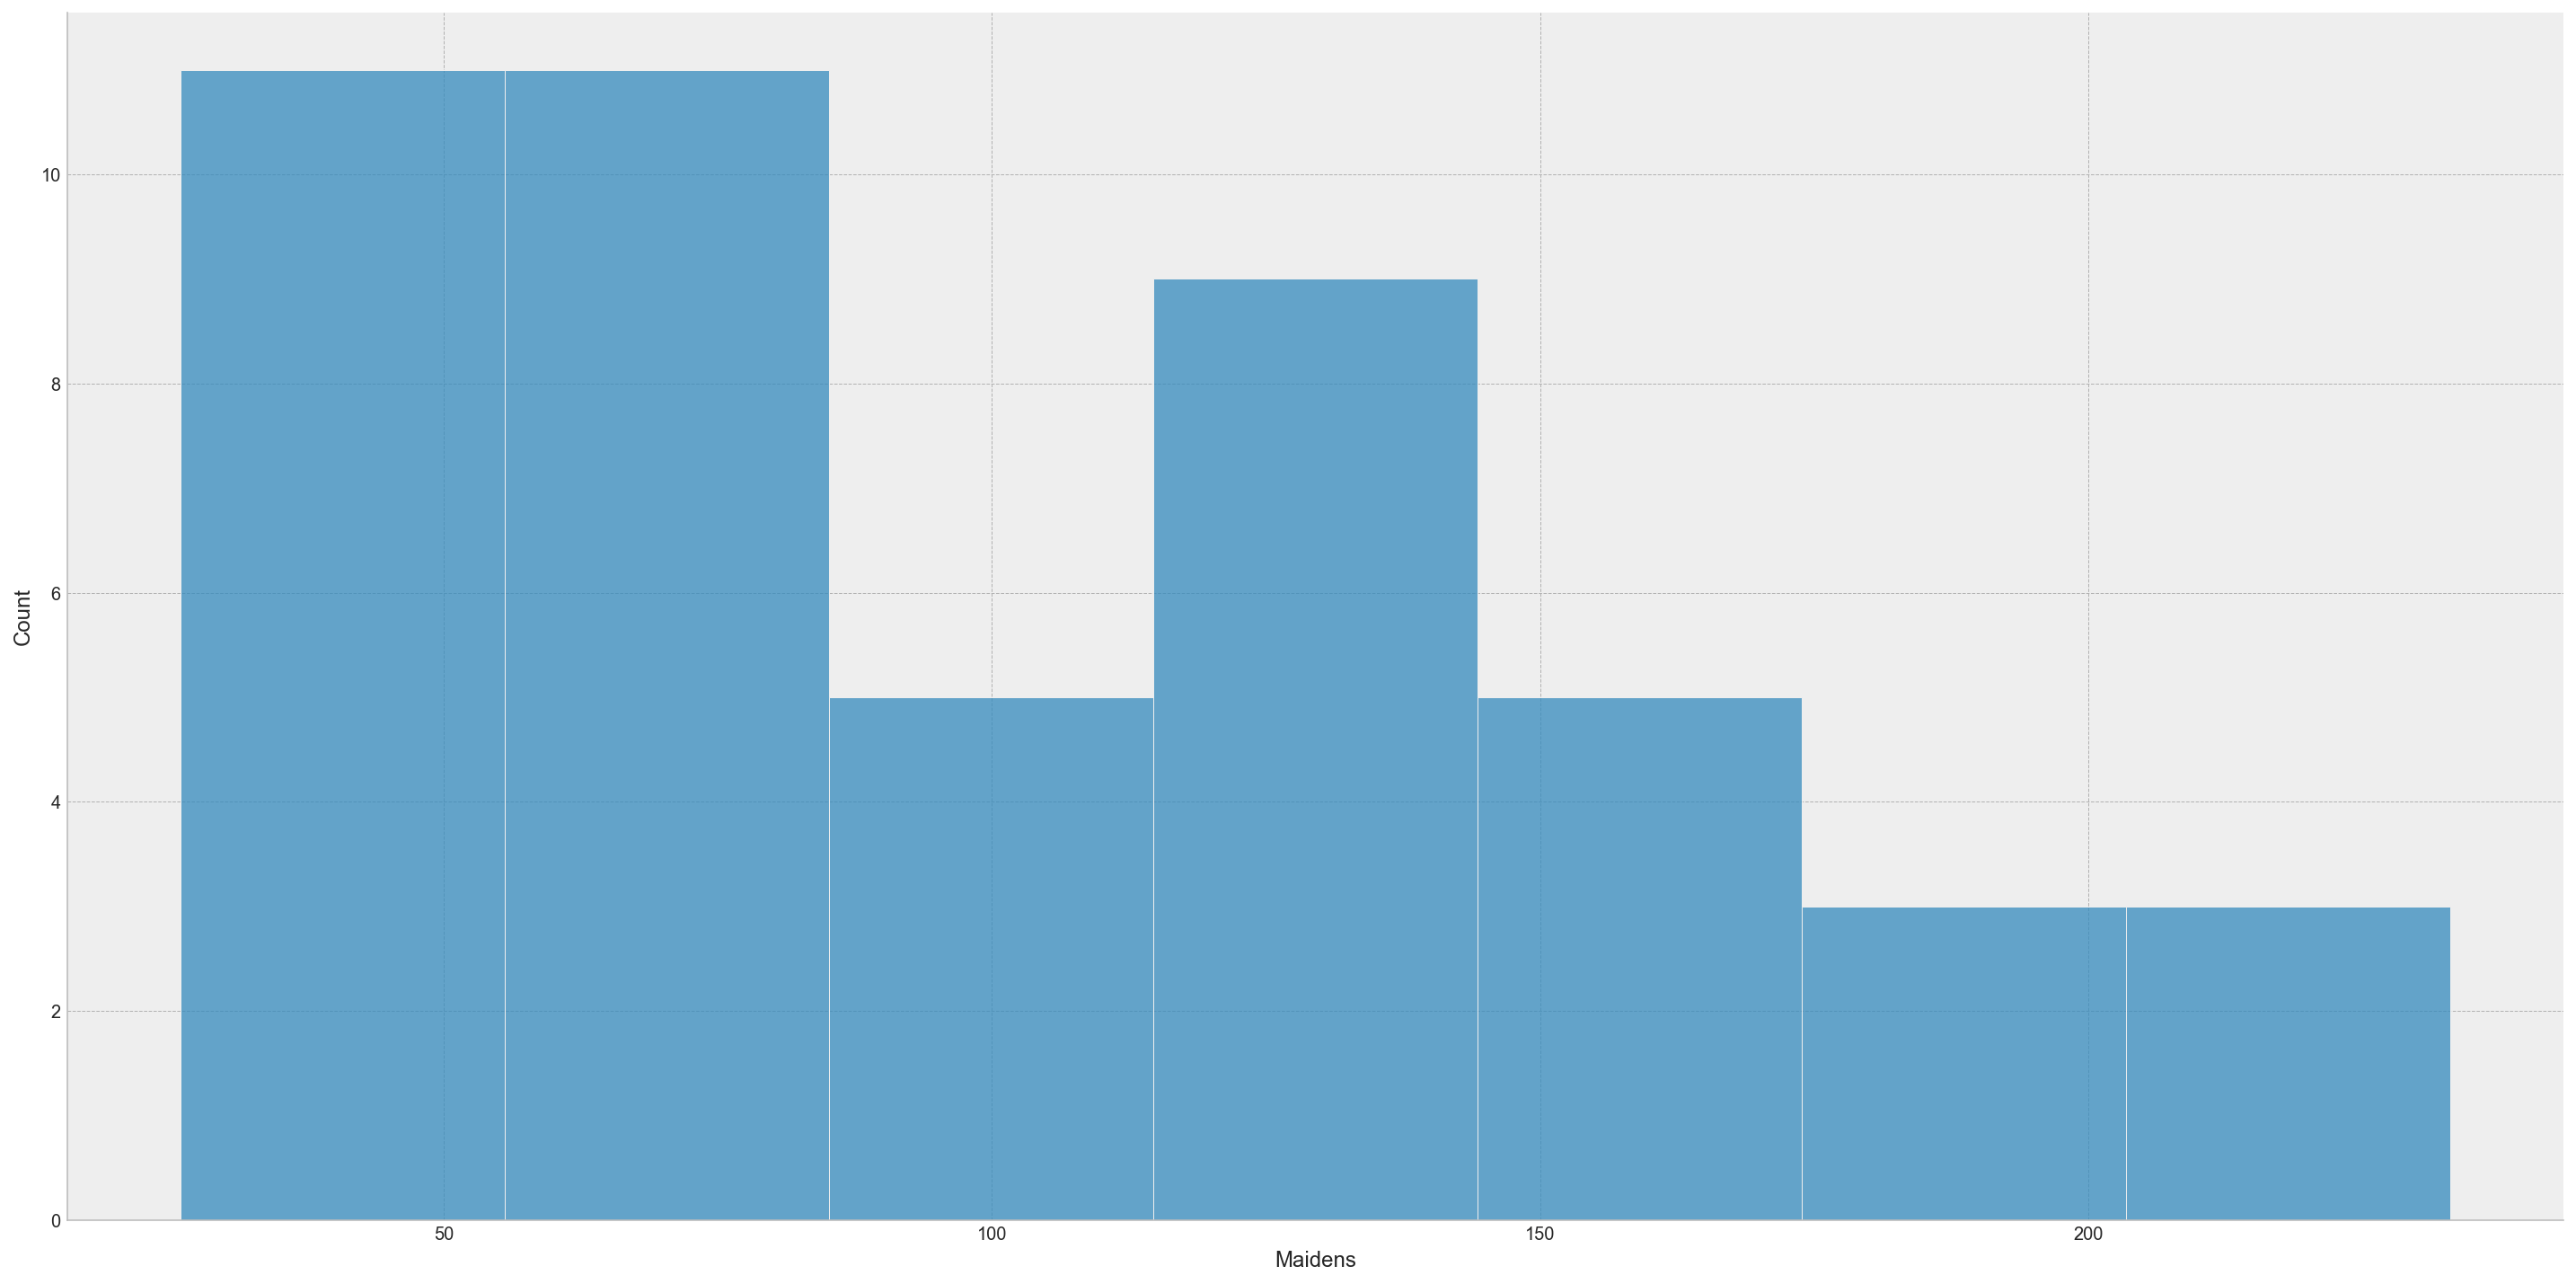

In [78]:
sns.displot(data =Icc_WTC_Bowling_Stats , x = 'Maidens', height=10, aspect =10/5);

### Distribution plot for Runs_concede

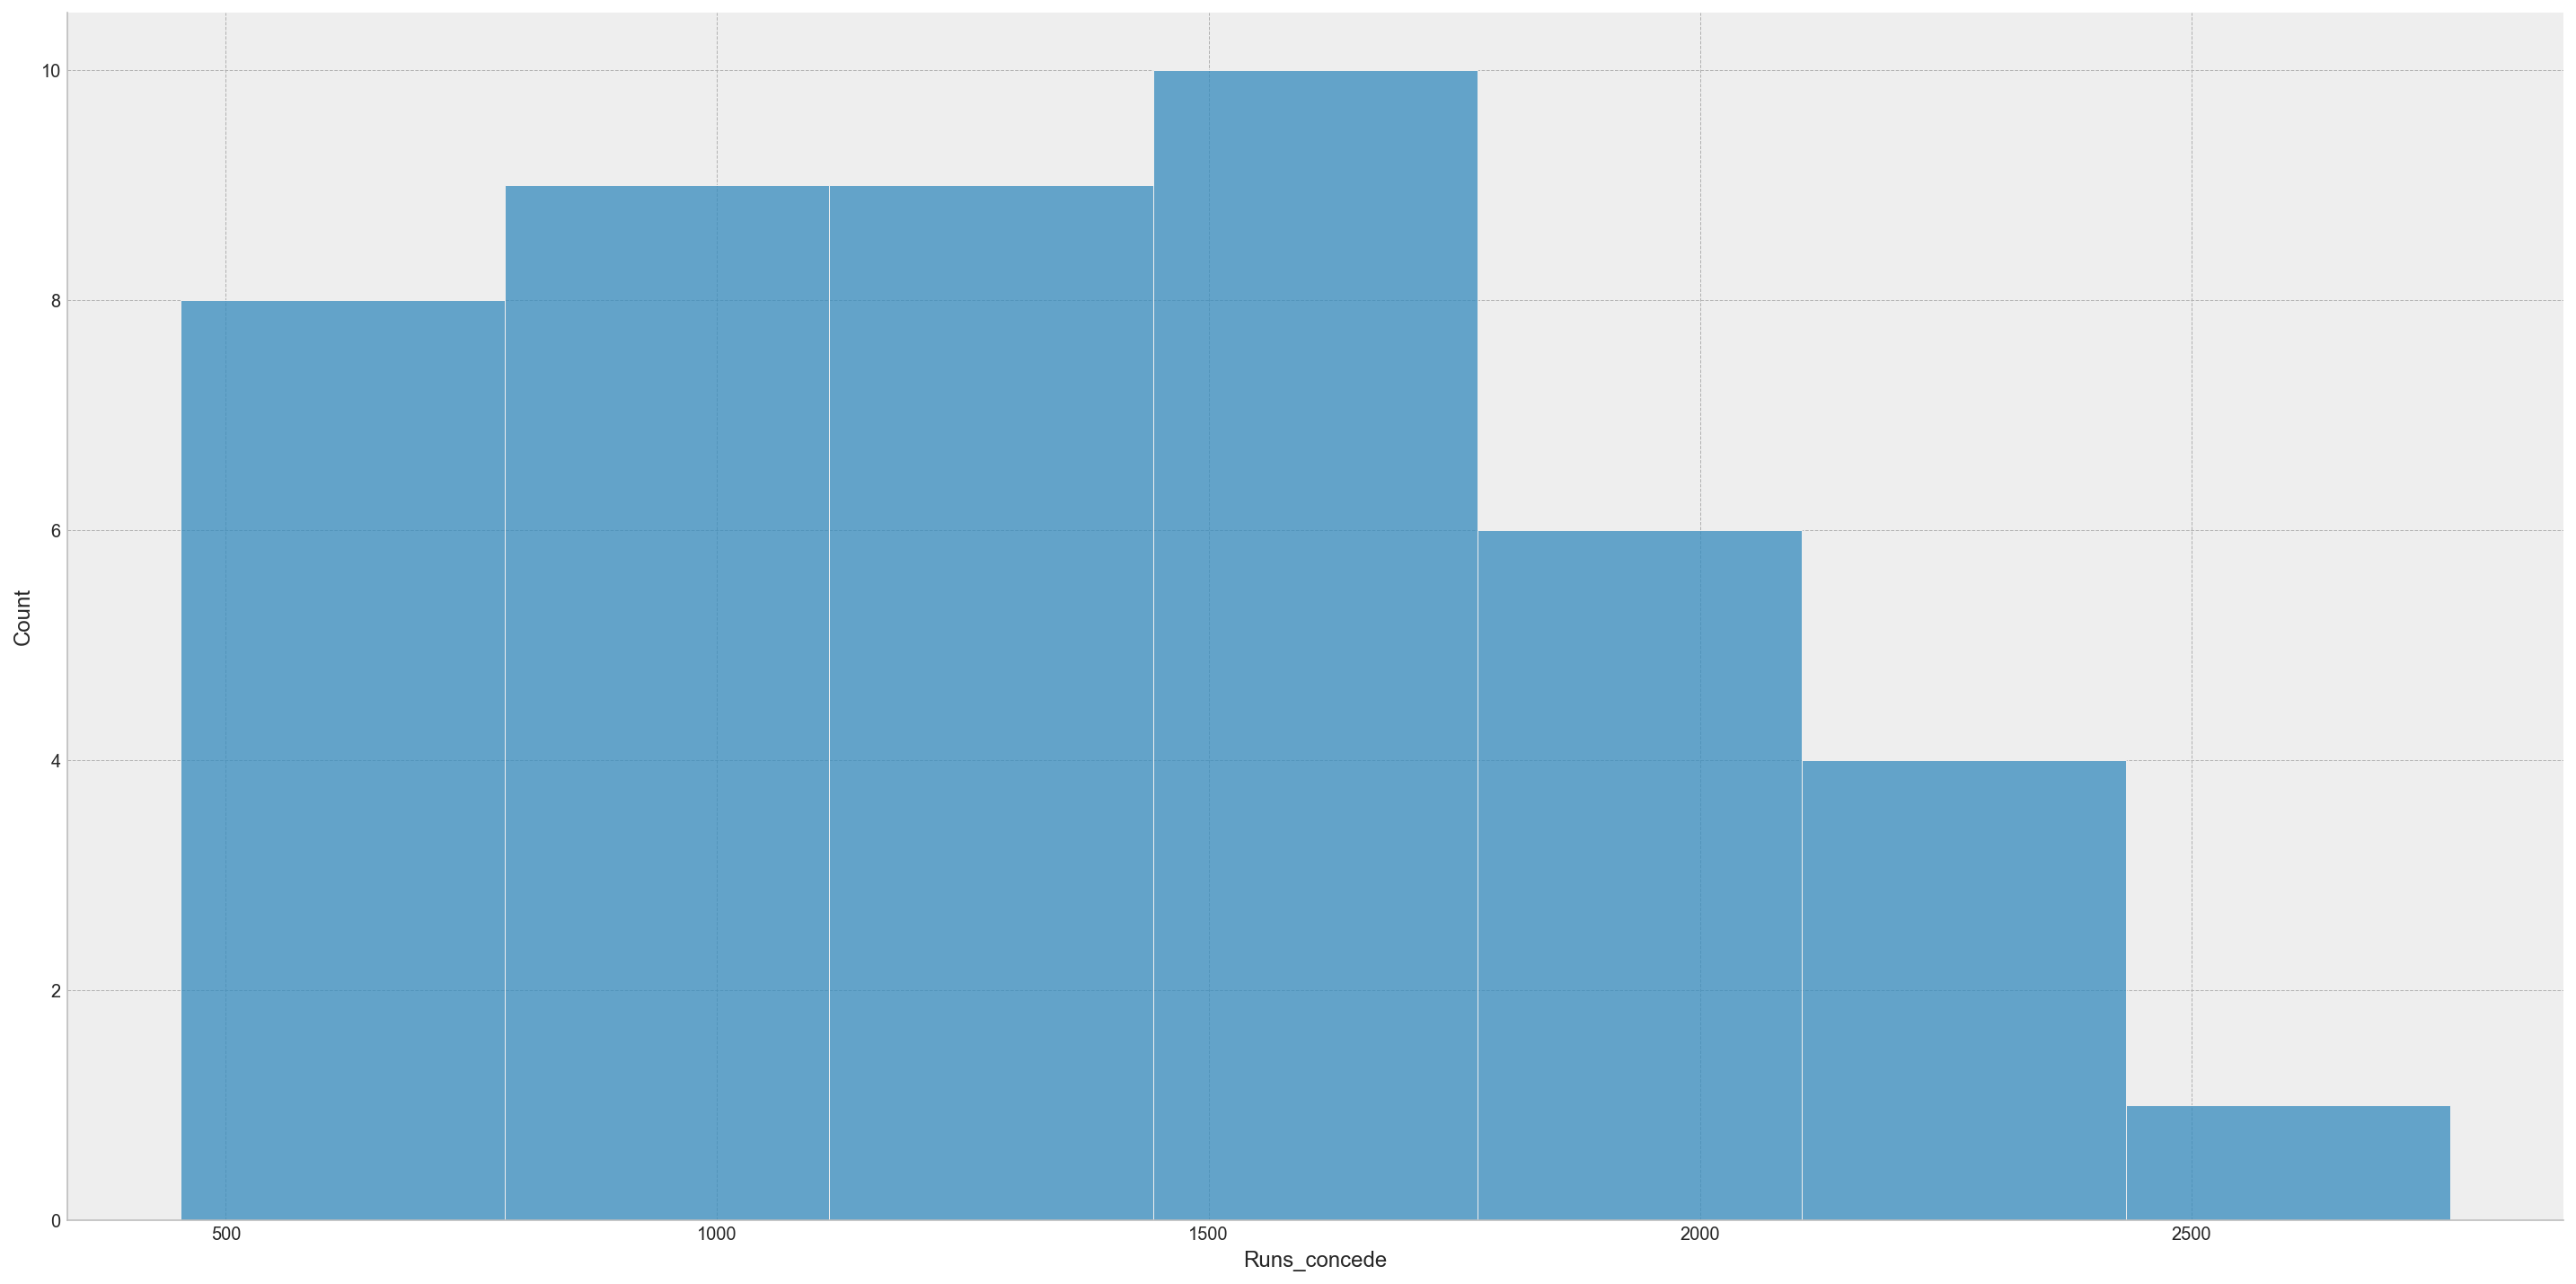

In [79]:
sns.displot(data =Icc_WTC_Bowling_Stats , x = 'Runs_concede', height=10, aspect =10/5);

### Distribution plot for Wickets

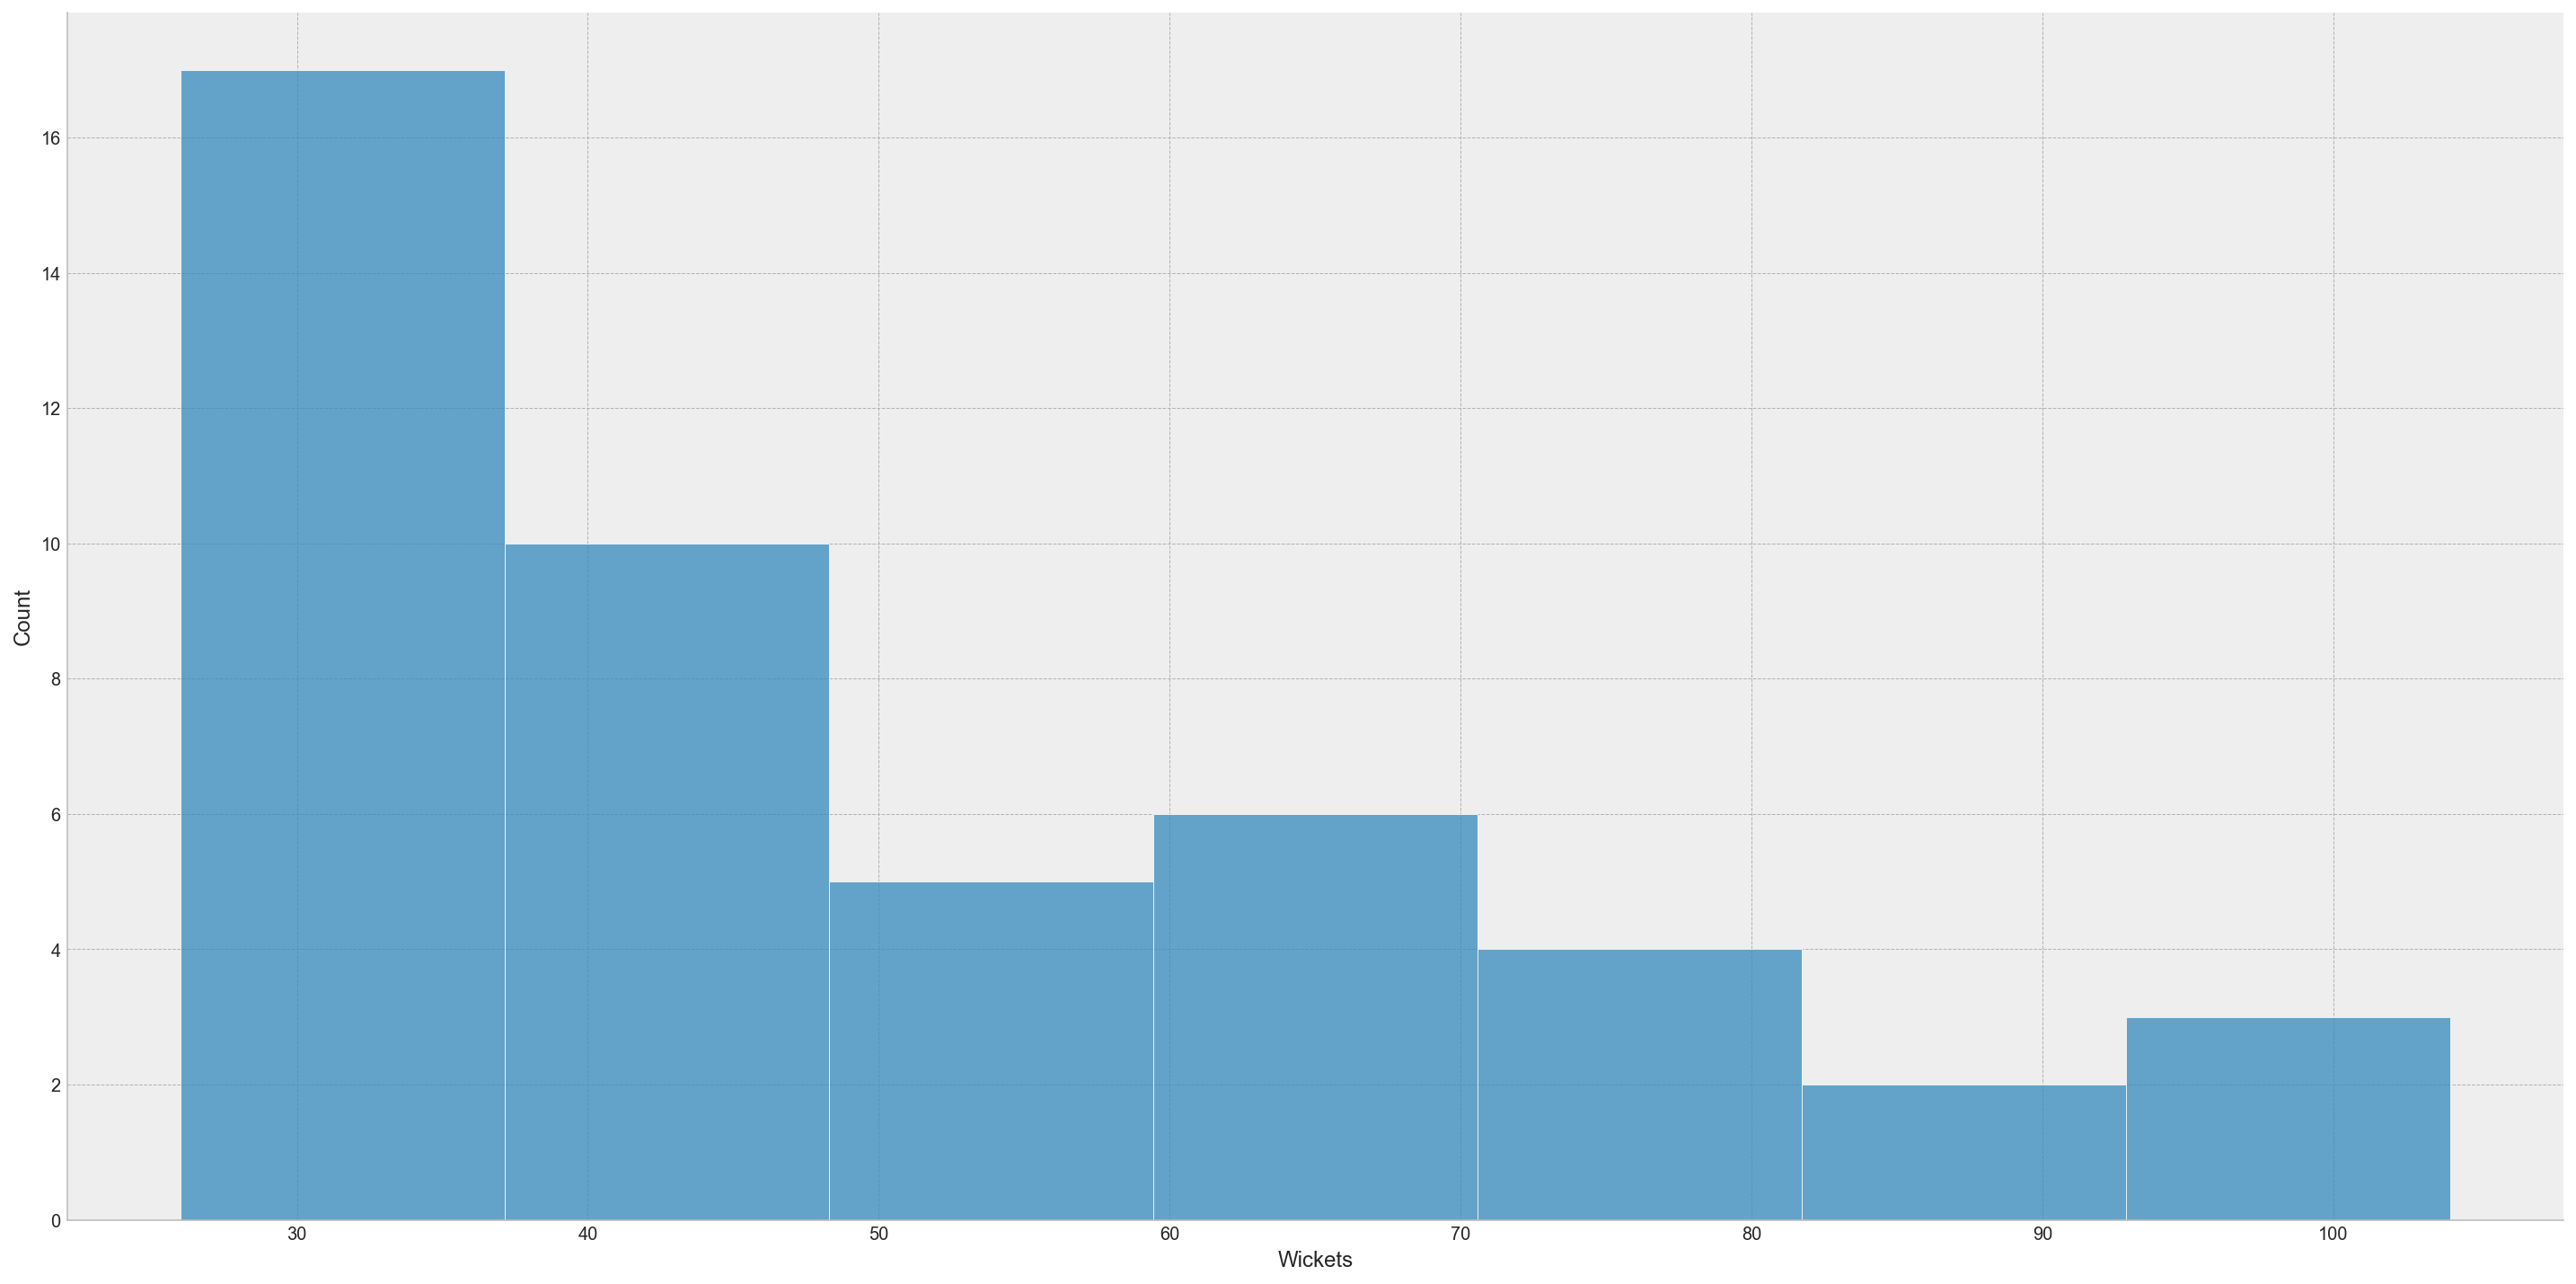

In [80]:
sns.displot(data =Icc_WTC_Bowling_Stats , x = 'Wickets', height=10, aspect =10/5);

### Distribution plot for Average

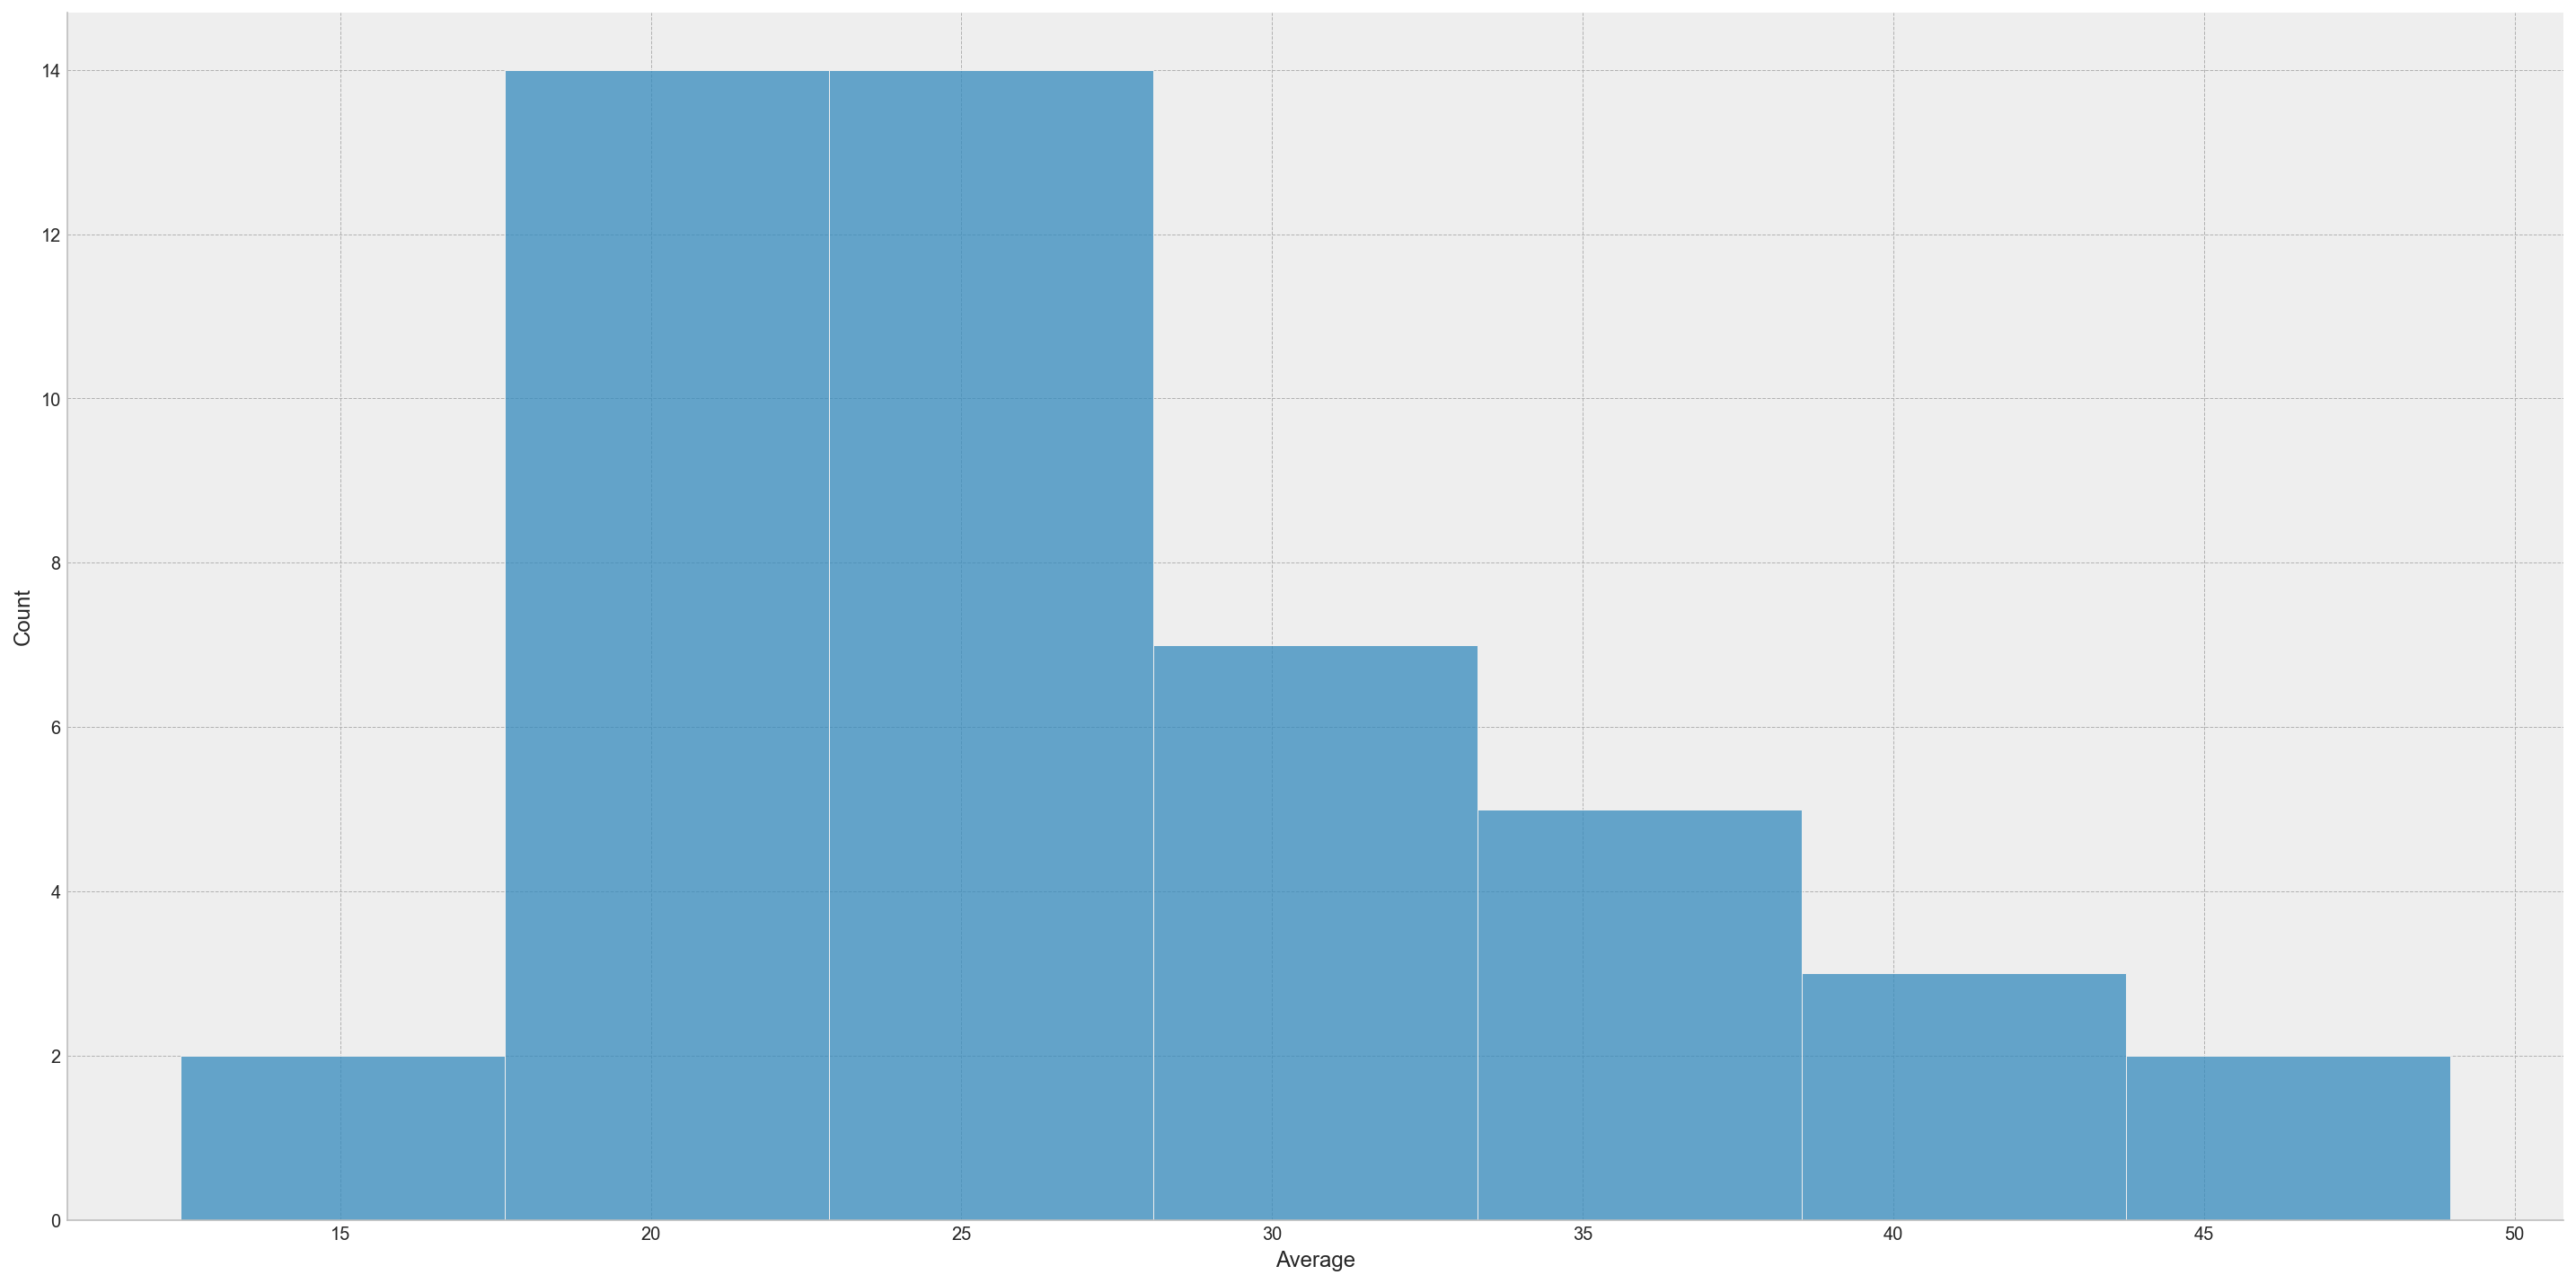

In [81]:
sns.displot(data =Icc_WTC_Bowling_Stats , x = 'Average', height=10, aspect =10/5);

### Distribution plot for Economy

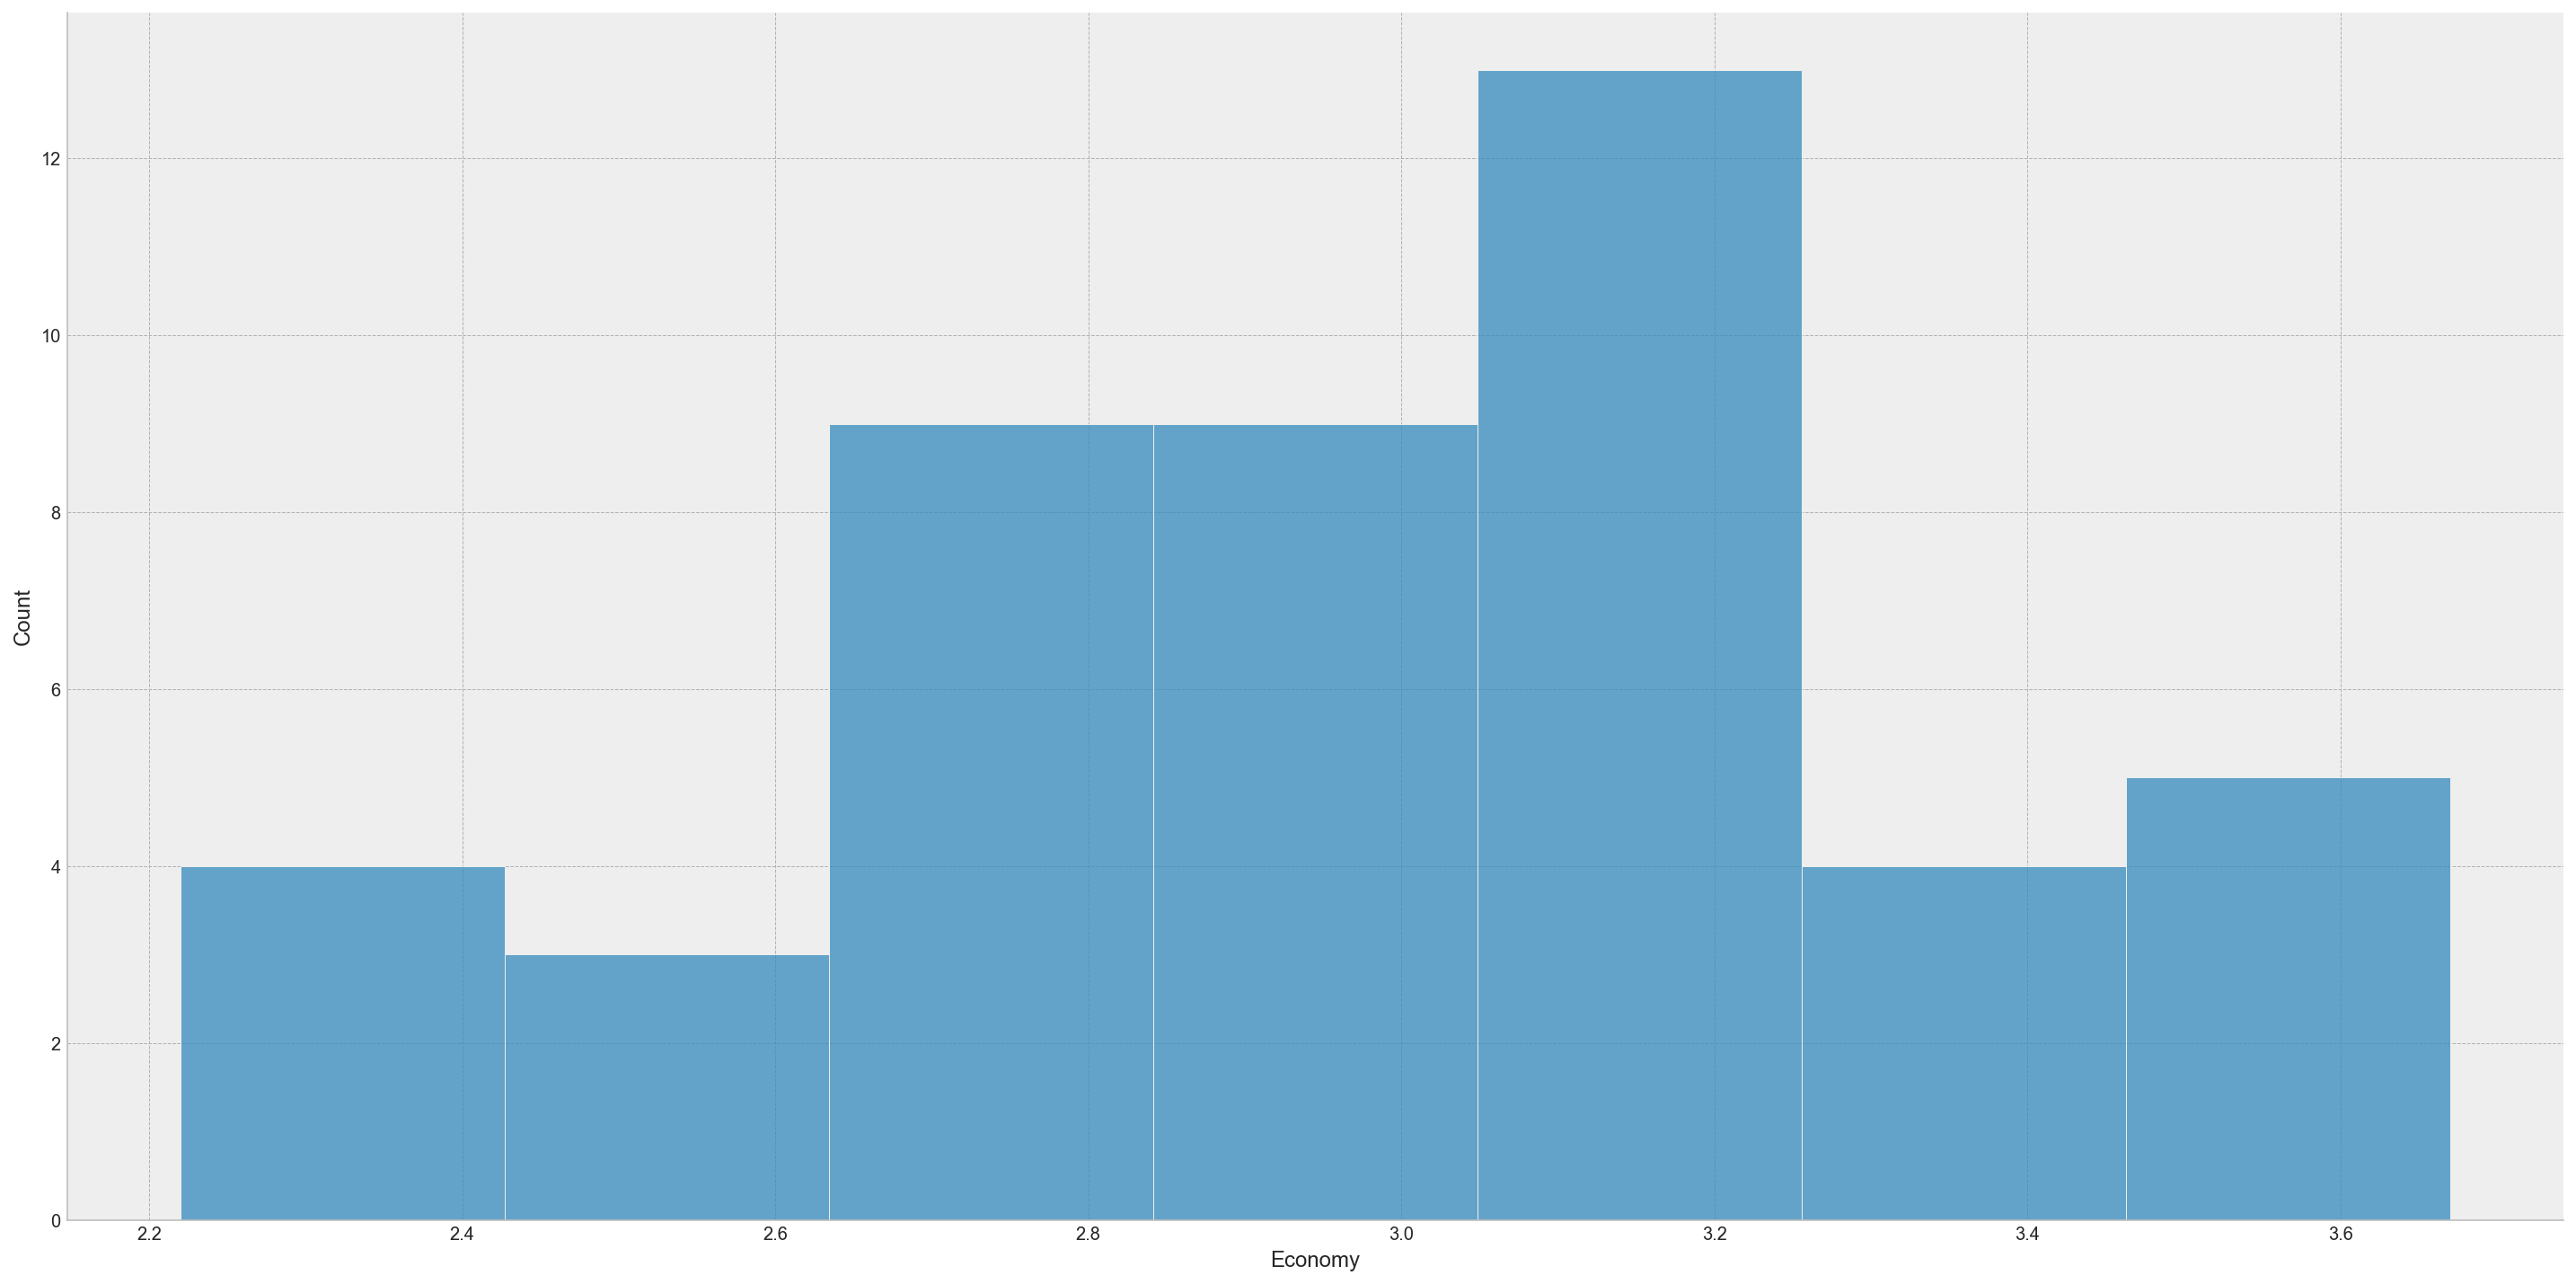

In [82]:
sns.displot(data =Icc_WTC_Bowling_Stats , x = 'Economy', height=10, aspect =10/5);

### Distribution plot for Strike_rate

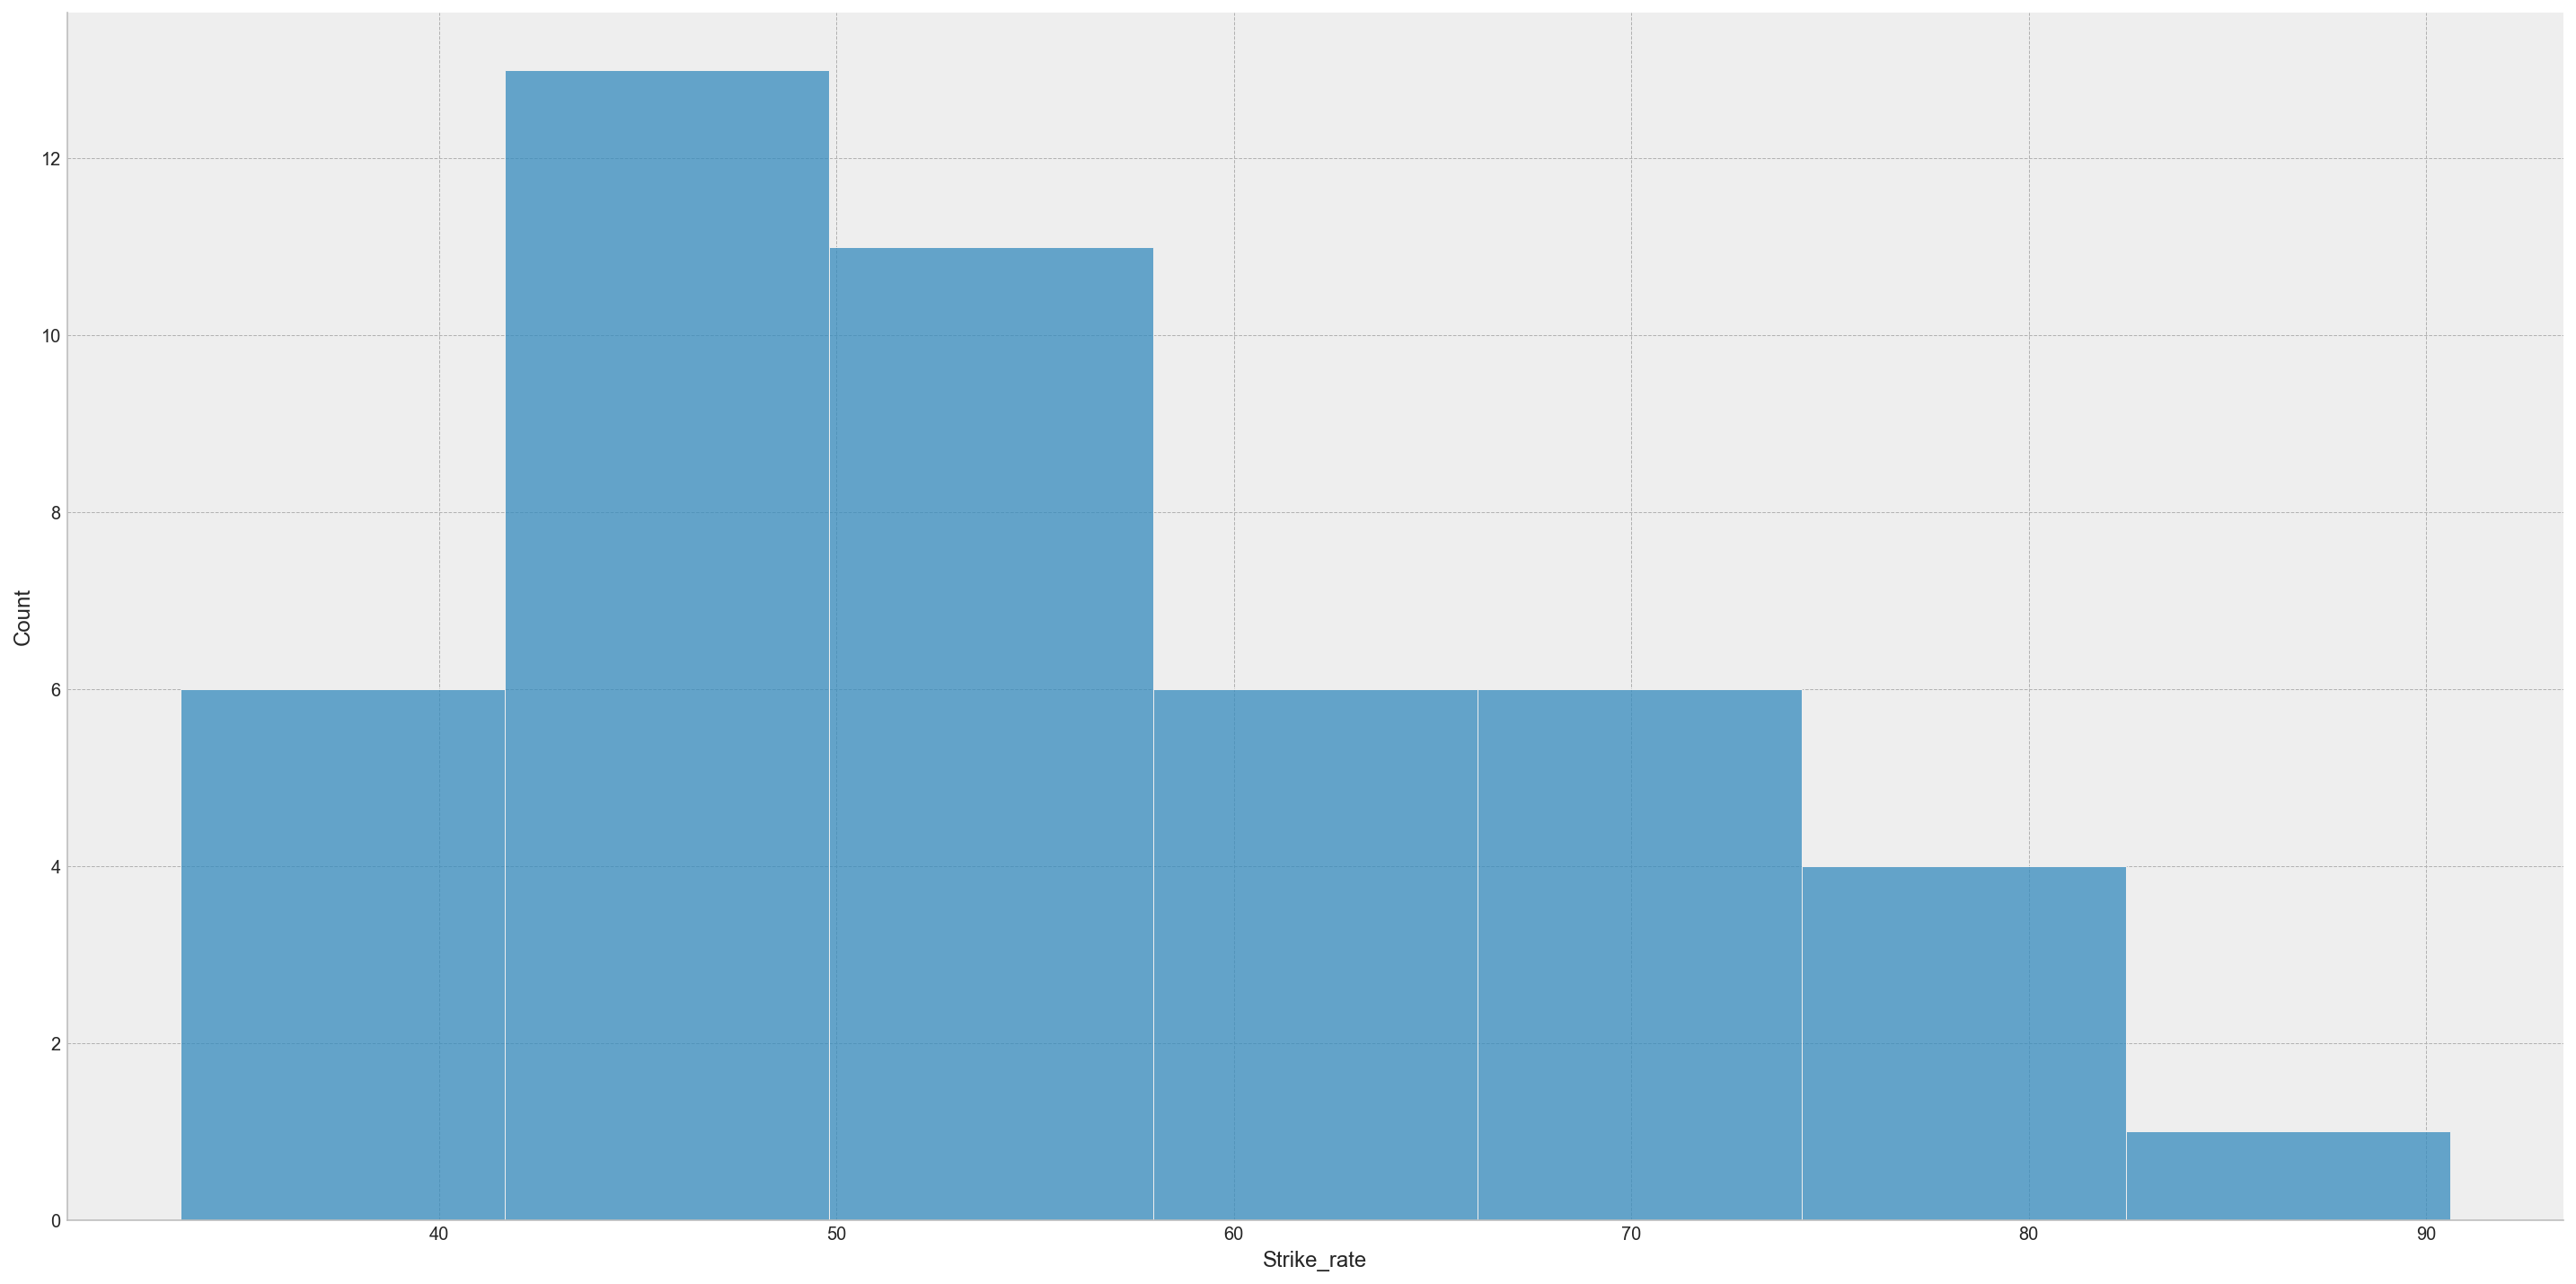

In [83]:
sns.displot(data =Icc_WTC_Bowling_Stats , x = 'Strike_rate', height=10, aspect =10/5);

### Distribution plot for fifer_5

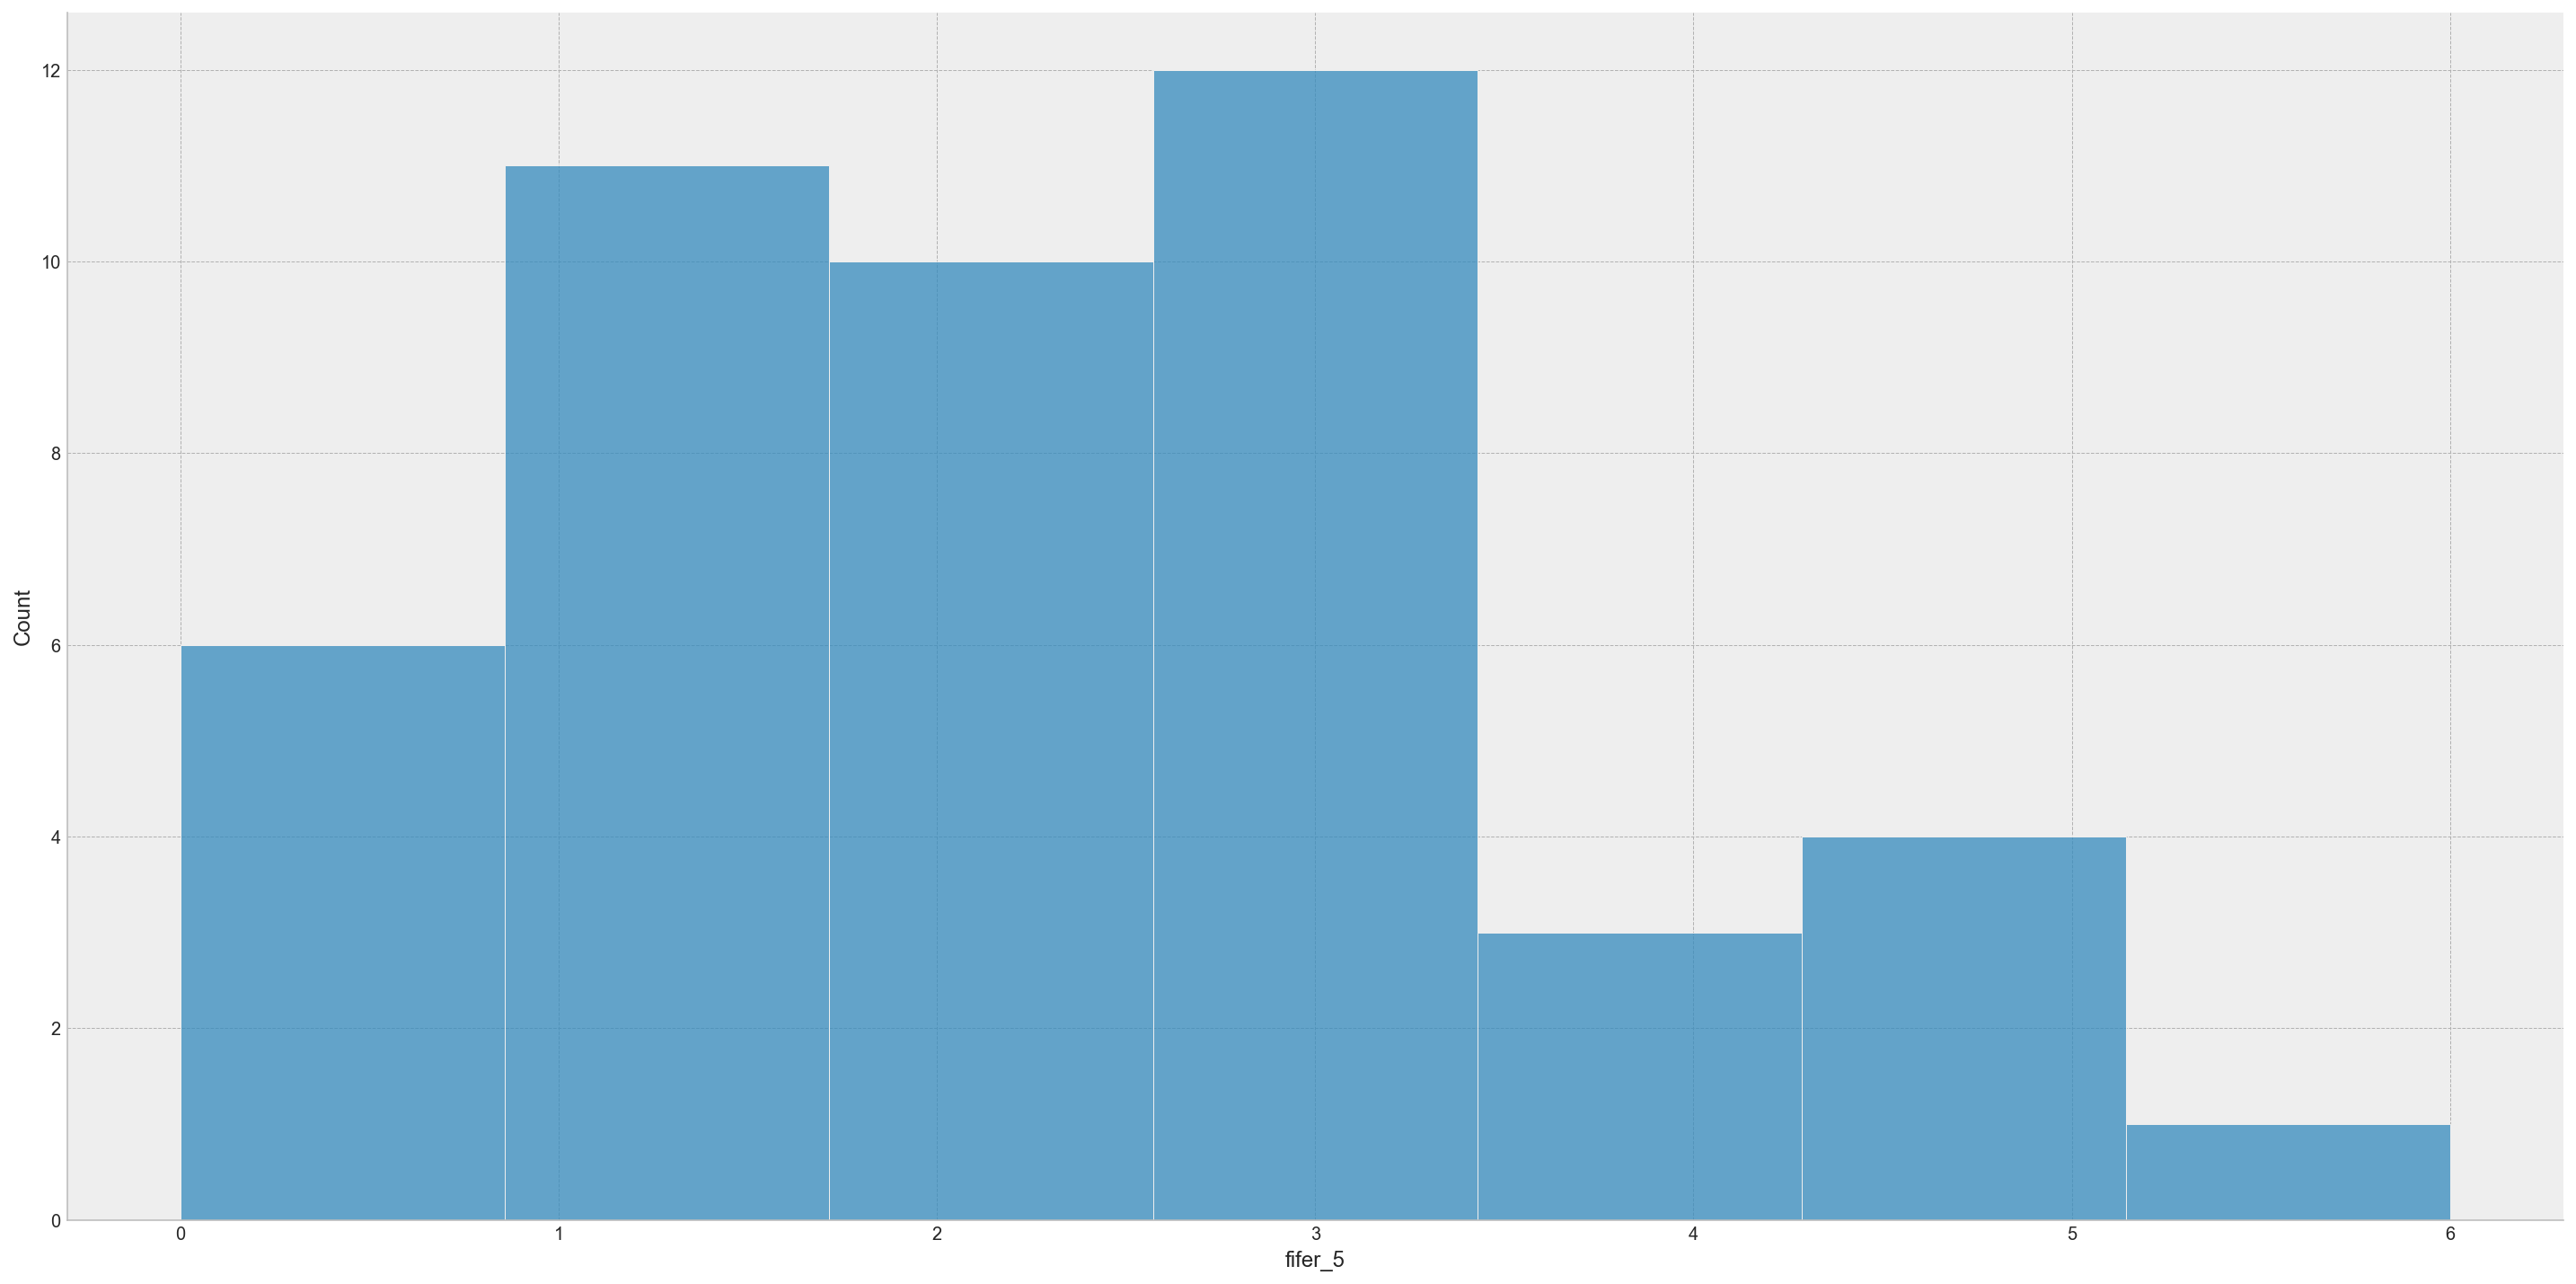

In [84]:
sns.displot(data =Icc_WTC_Bowling_Stats , x = 'fifer_5', height=10, aspect =10/5);

### Distribution plot for ten_wickets

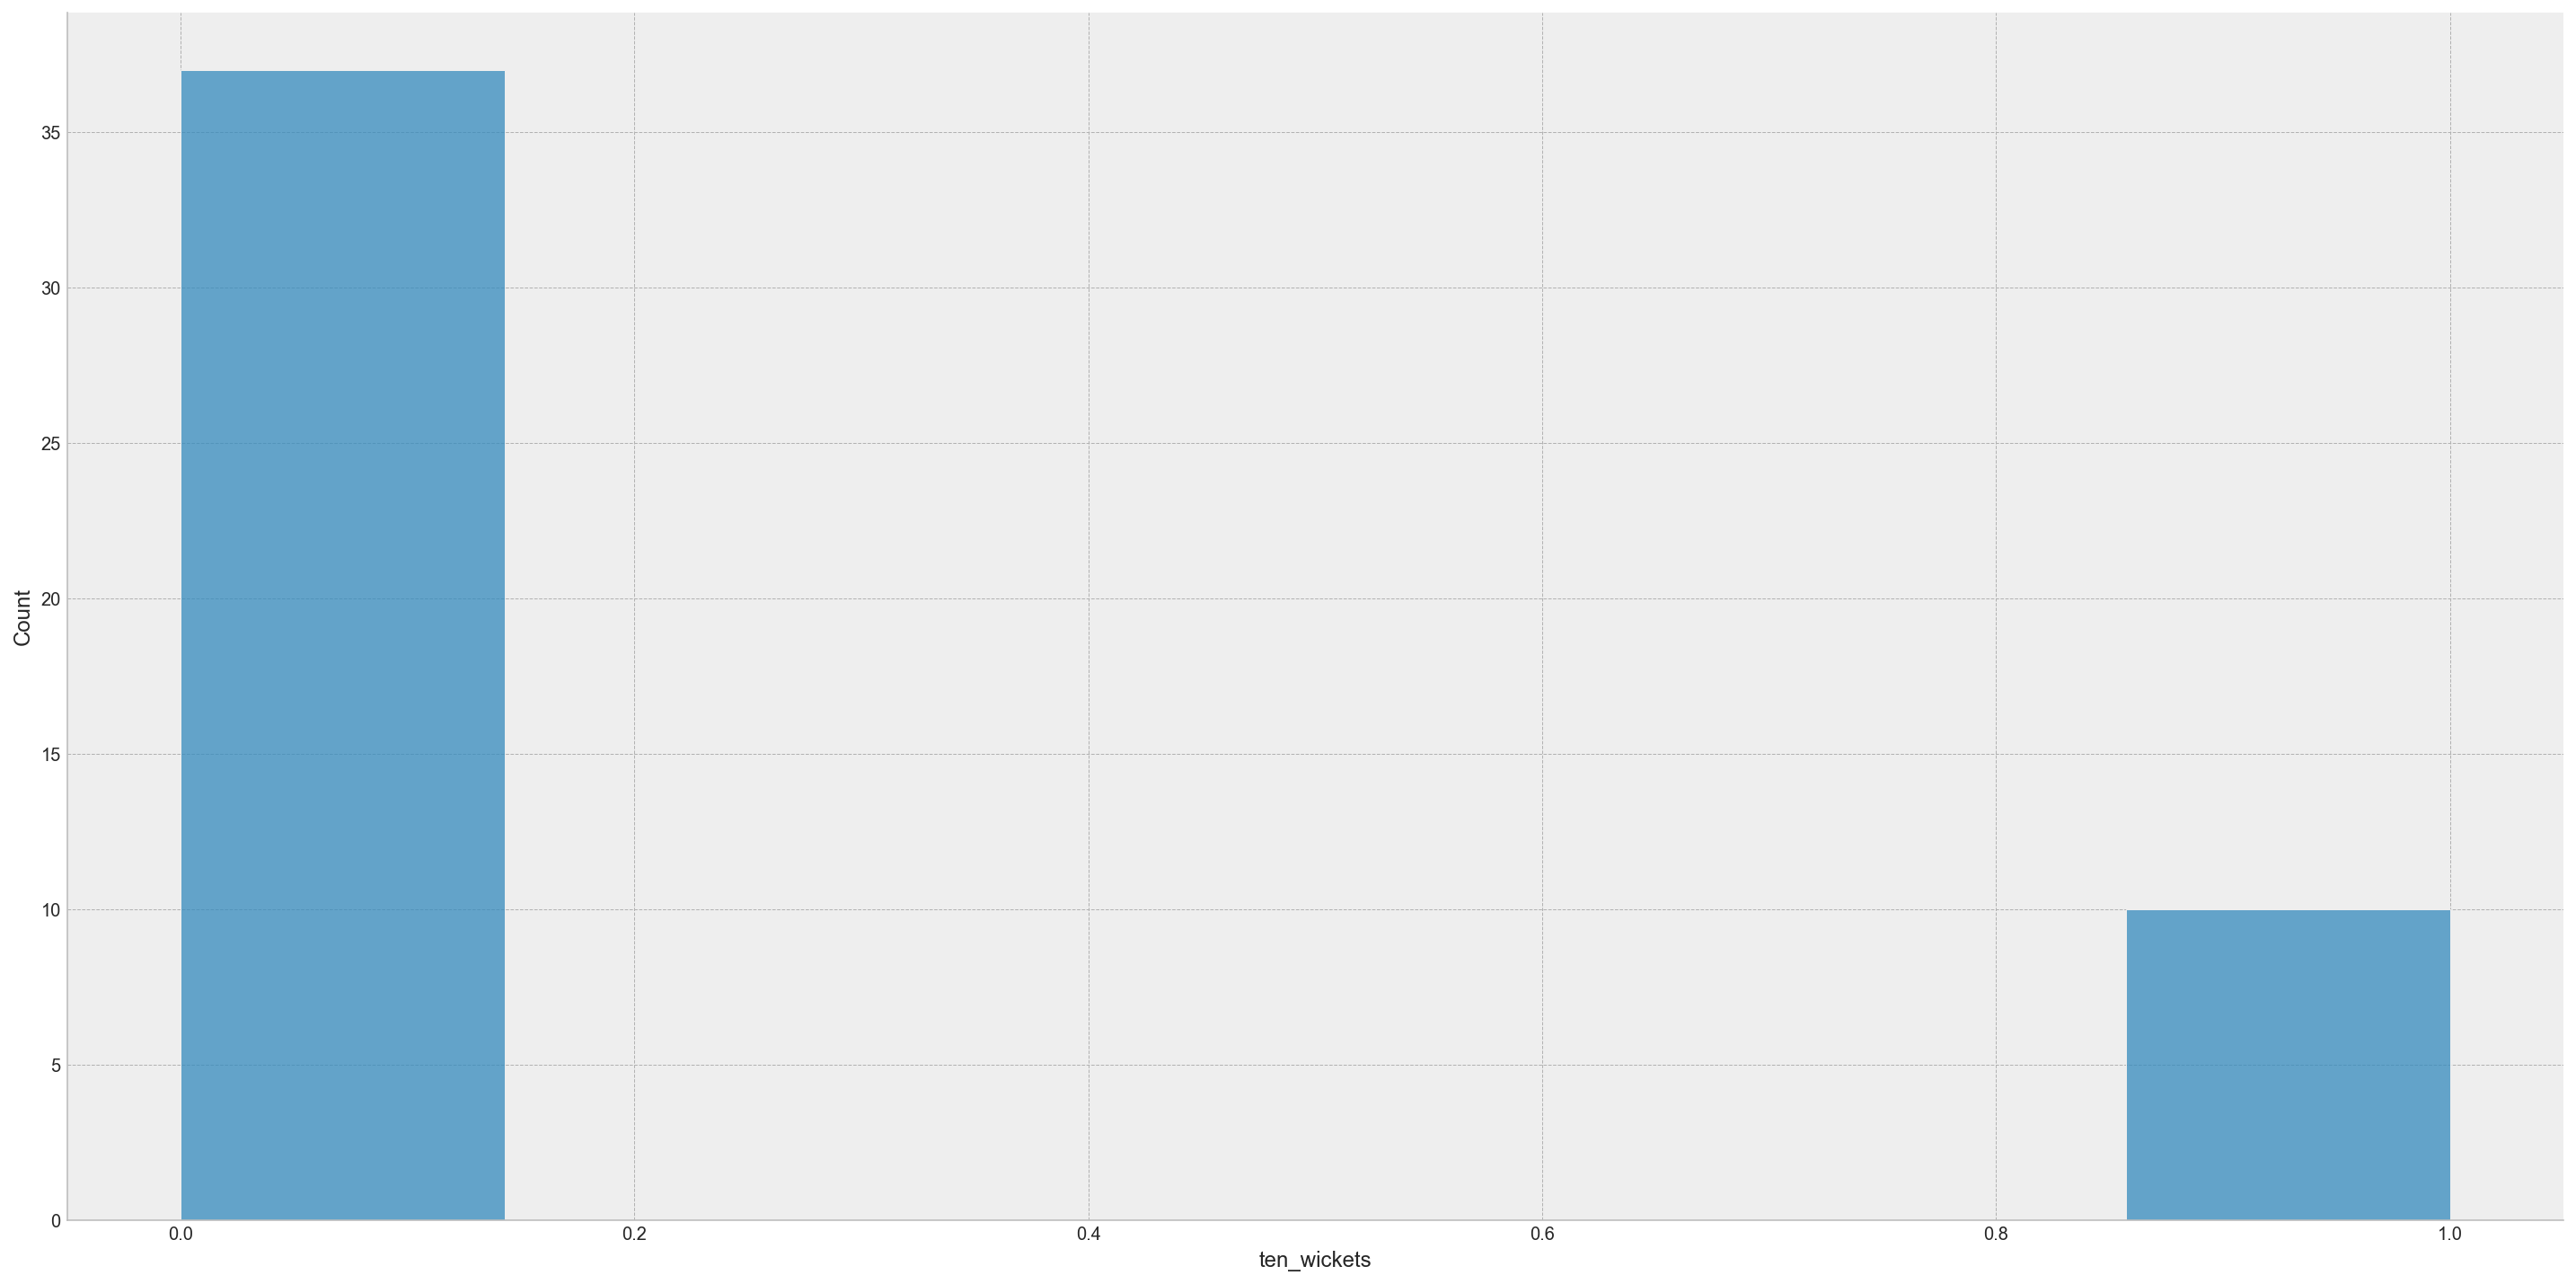

In [85]:
sns.displot(data =Icc_WTC_Bowling_Stats , x = 'ten_wickets', height=10, aspect =10/5);

### Distribution plot for Country

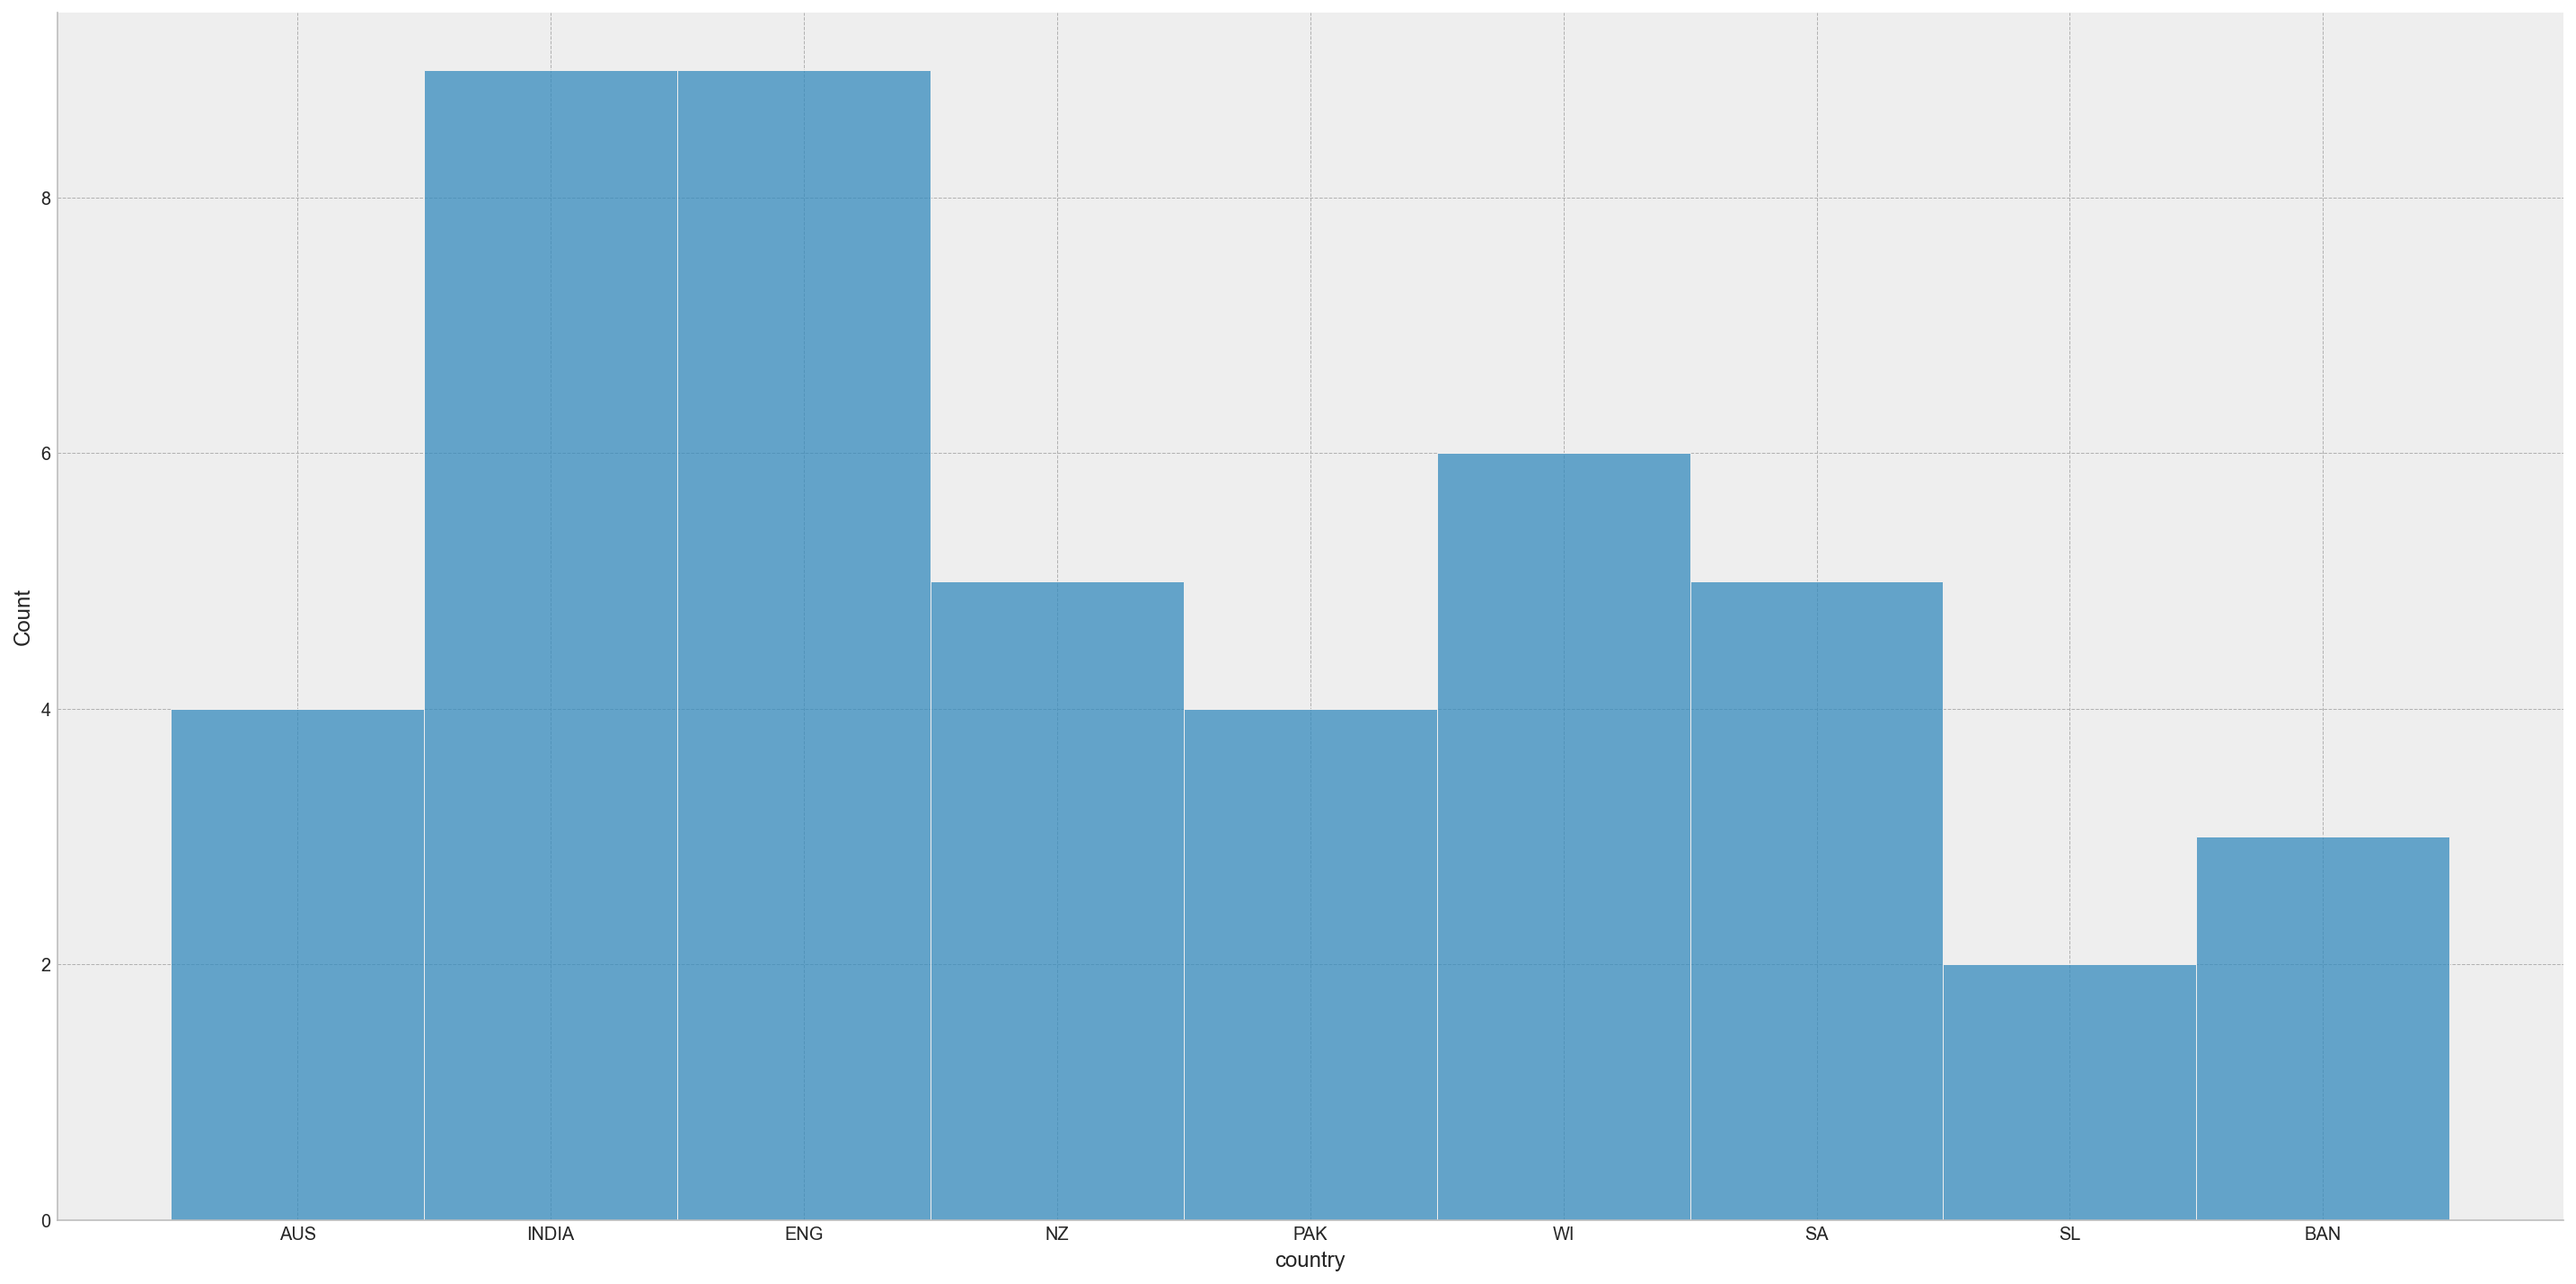

In [97]:
sns.displot(data =Icc_WTC_Bowling_Stats , x = 'country', height=10, aspect =10/5);

## Bi variat

### Matches

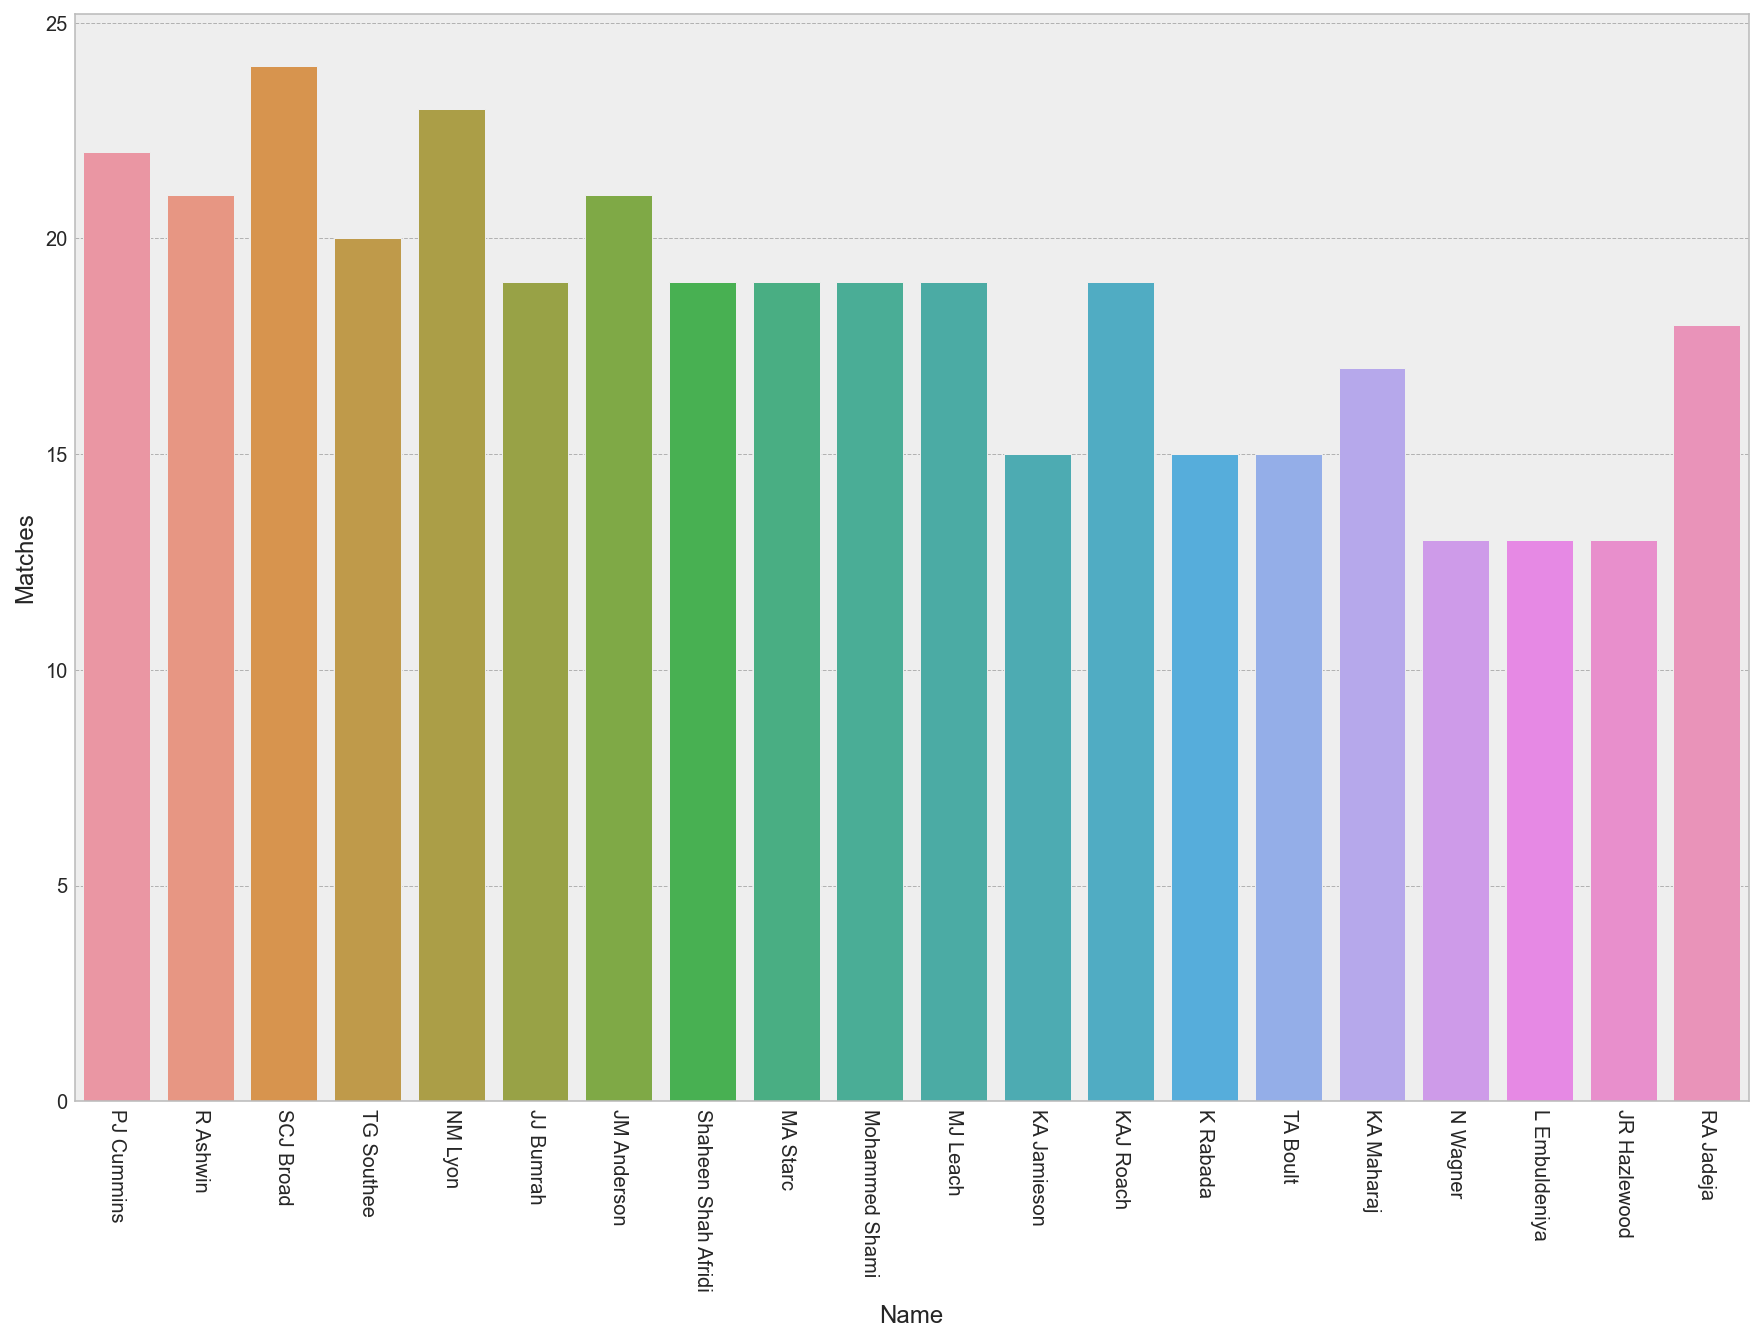

In [86]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Bowling_Stats.head(20) , x = 'Name', y = 'Matches', );

### Innings

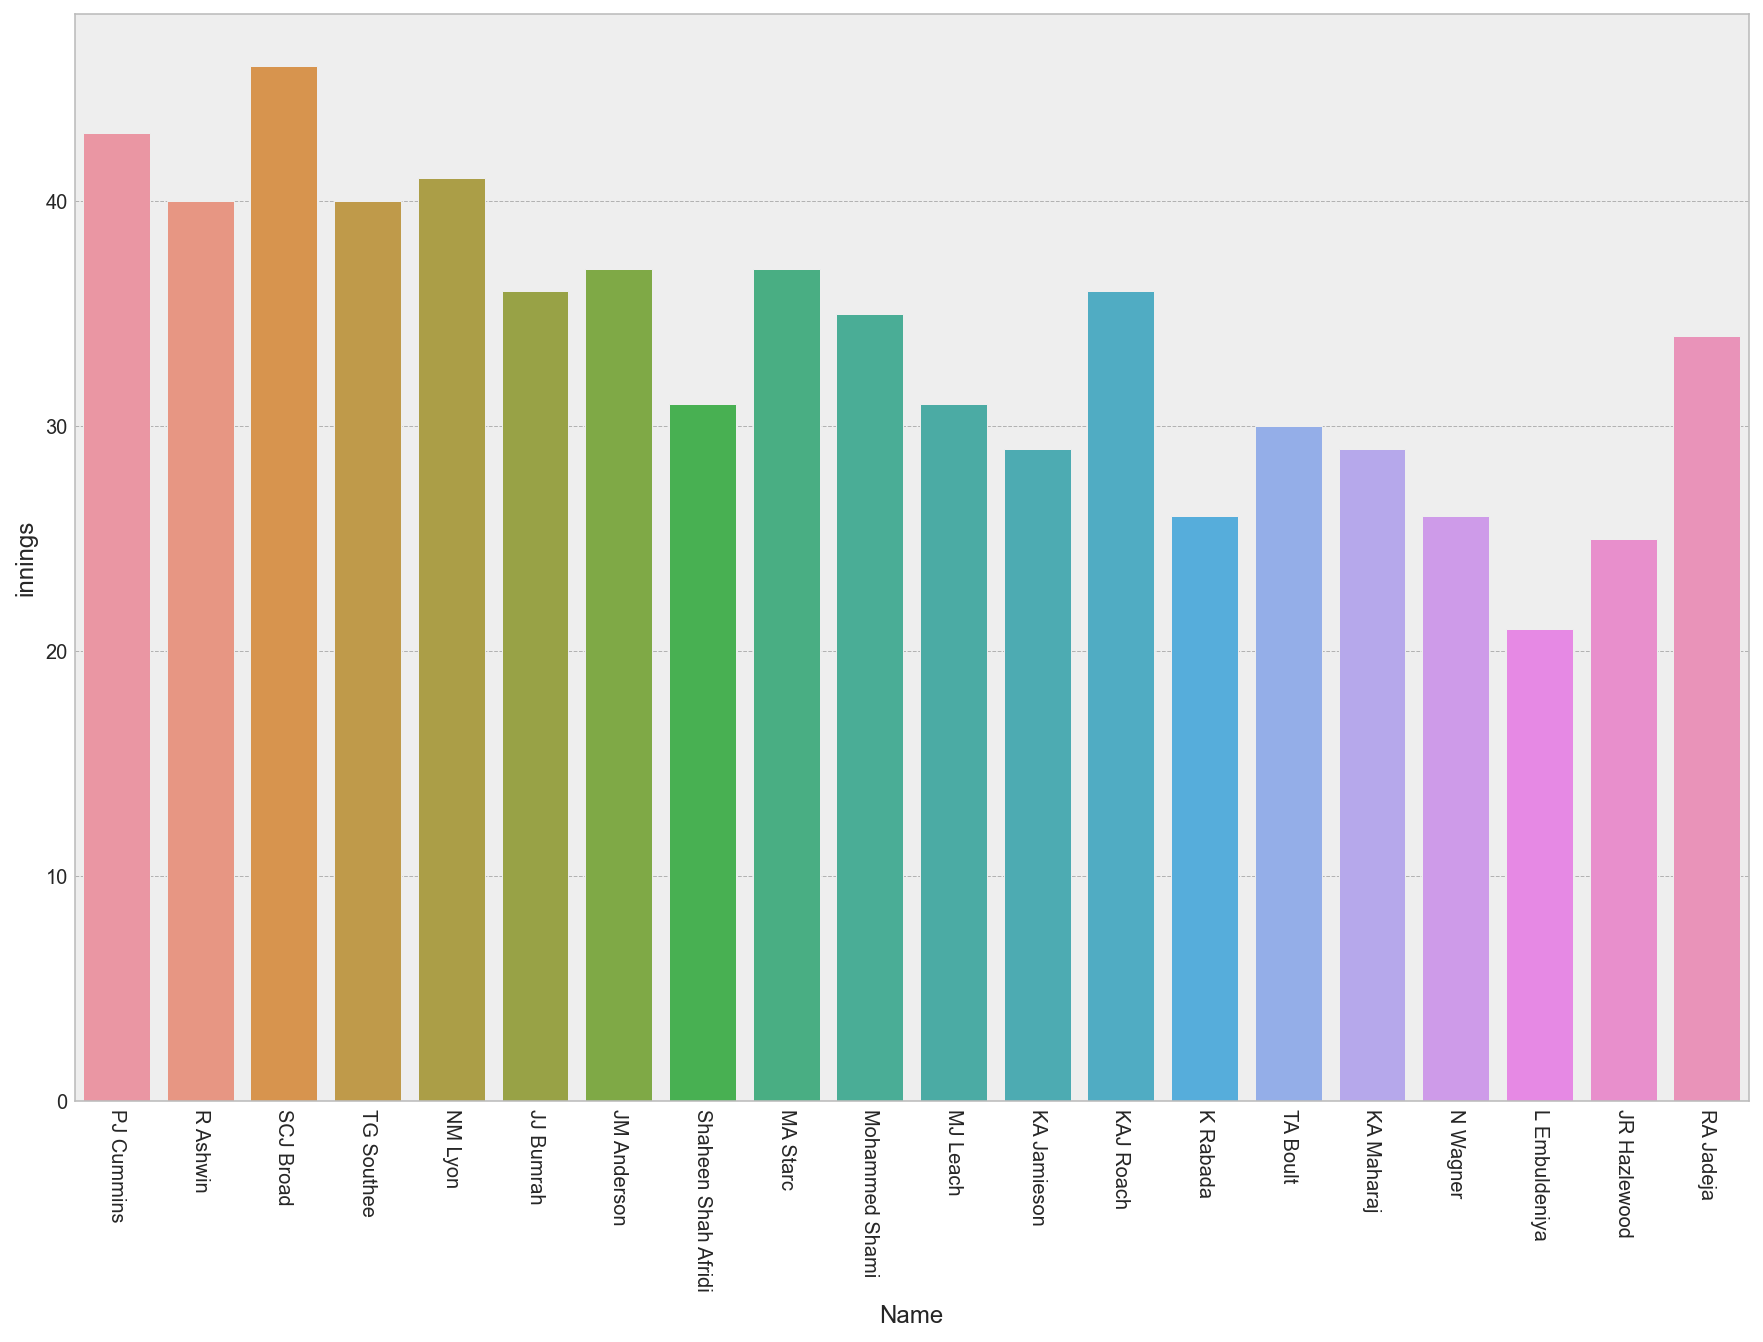

In [87]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Bowling_Stats.head(20) , x = 'Name', y = 'innings', );

### Overs

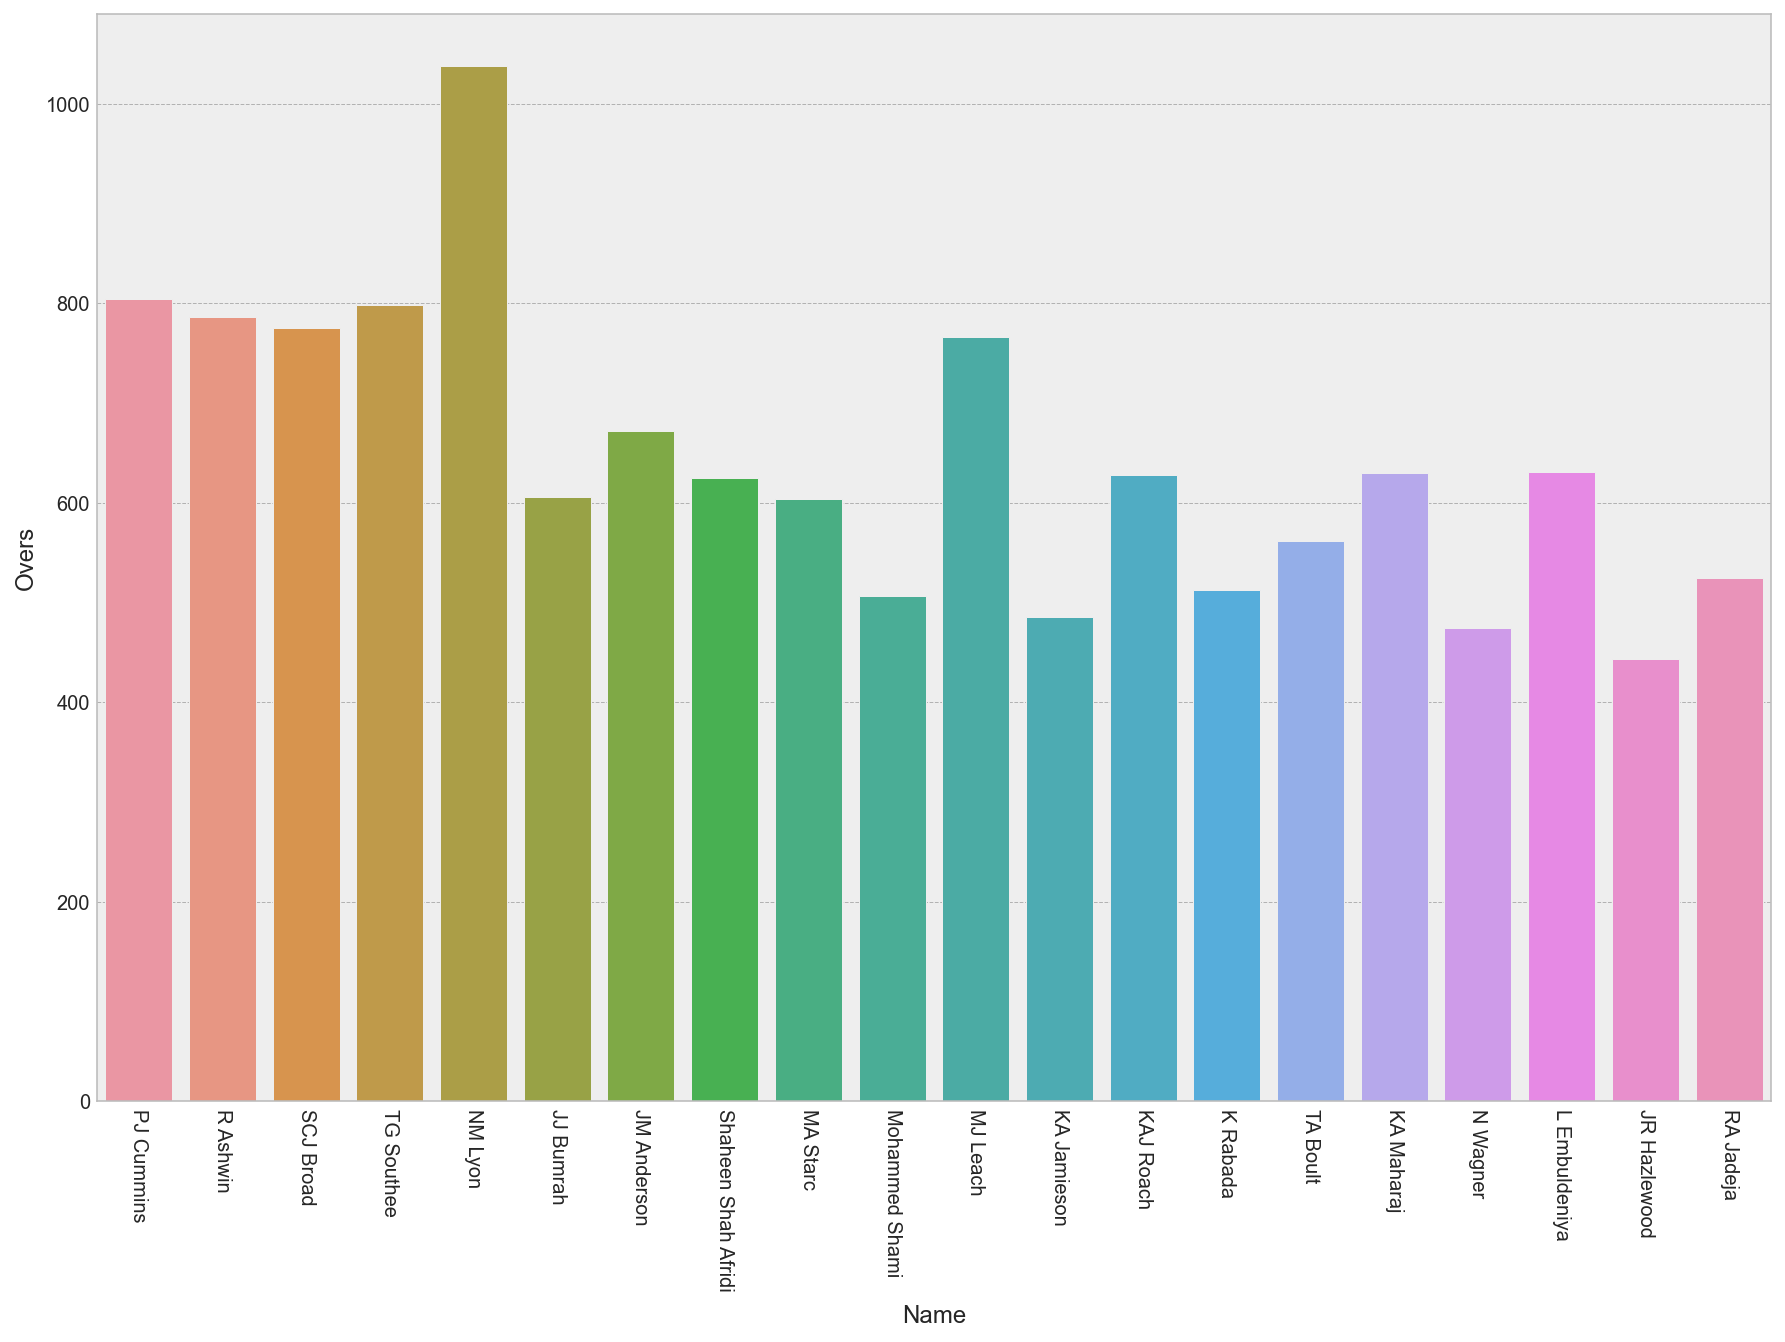

In [88]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Bowling_Stats.head(20) , x = 'Name', y = 'Overs', );

### Maidens

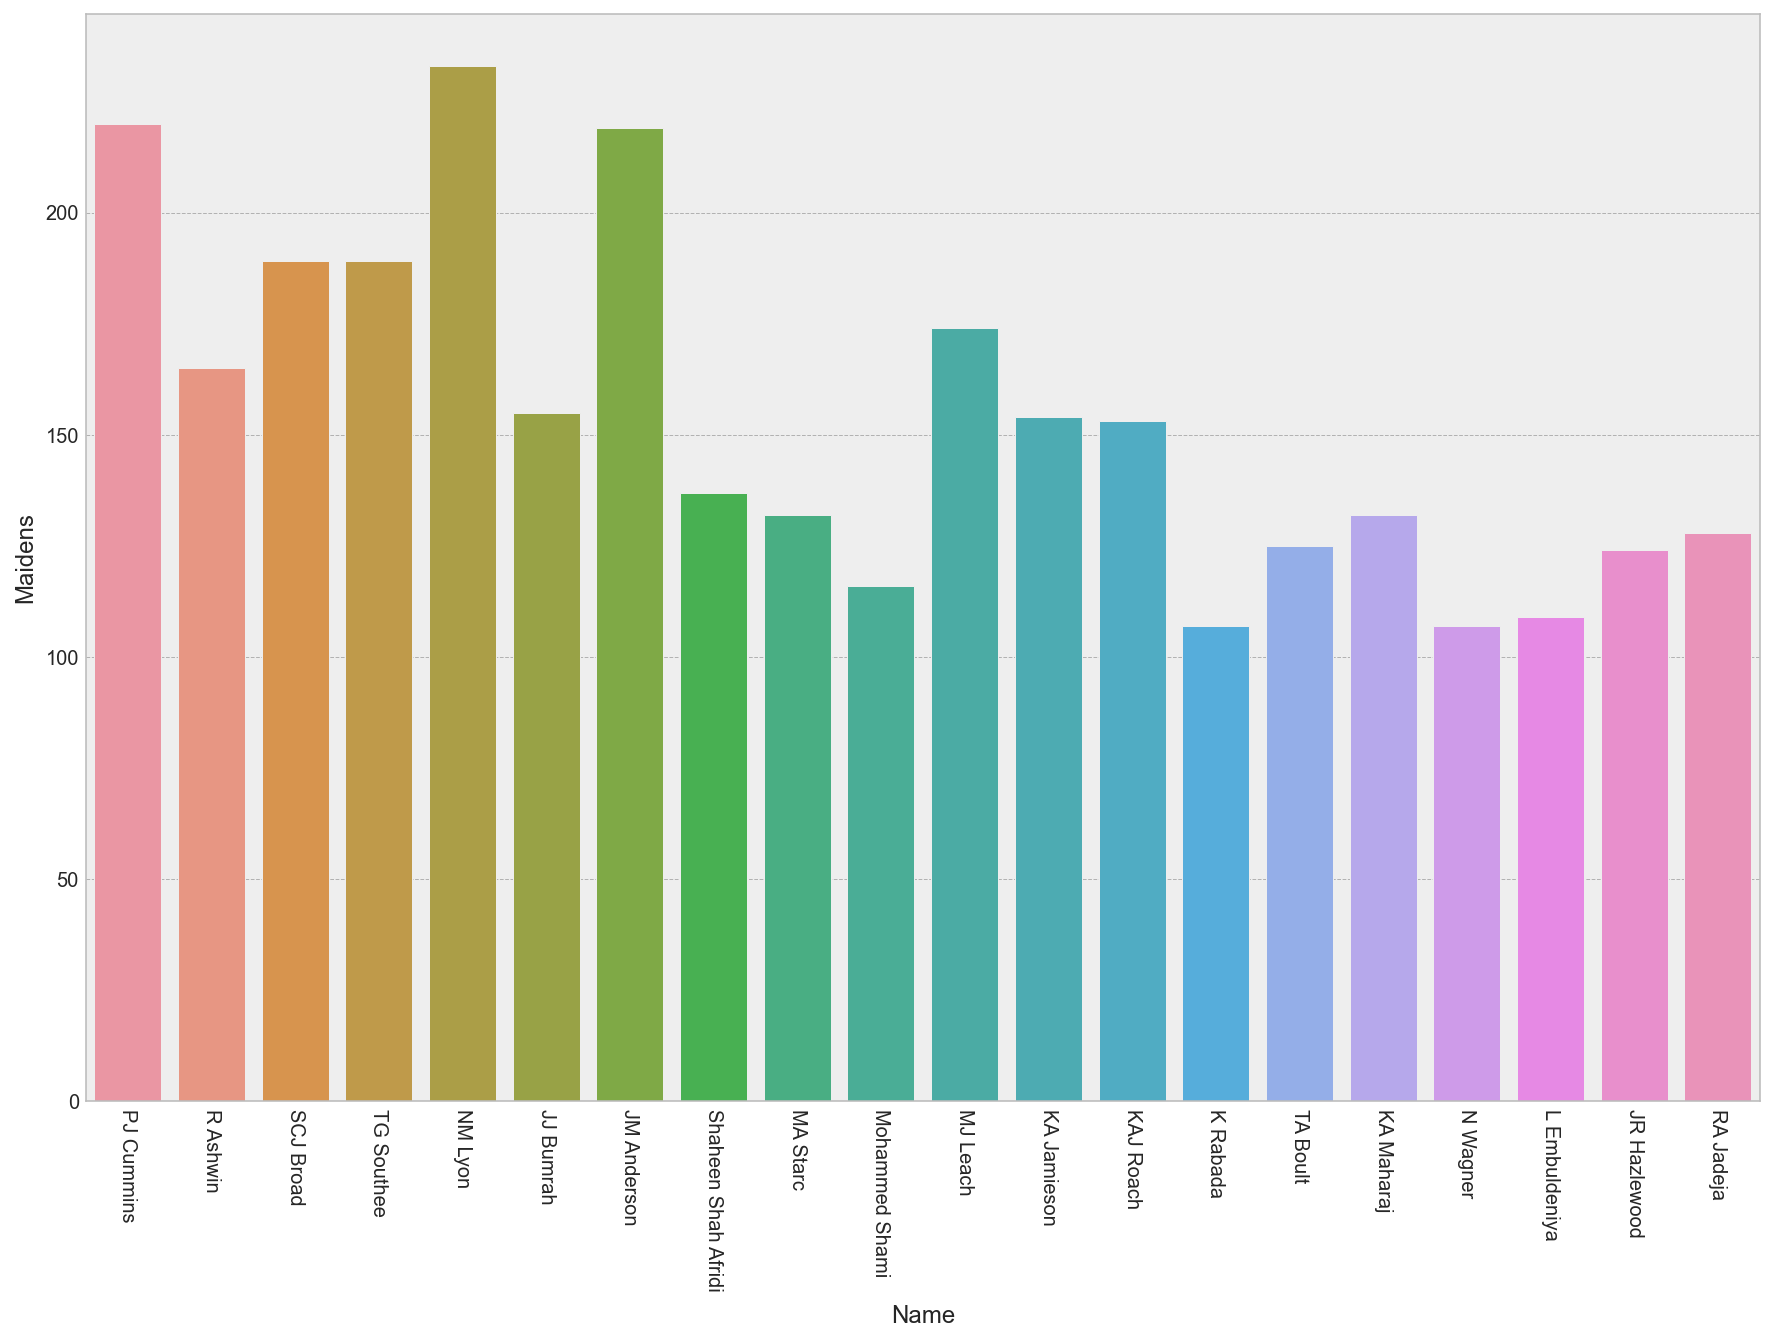

In [89]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Bowling_Stats.head(20) , x = 'Name', y = 'Maidens', );

### Runs concede

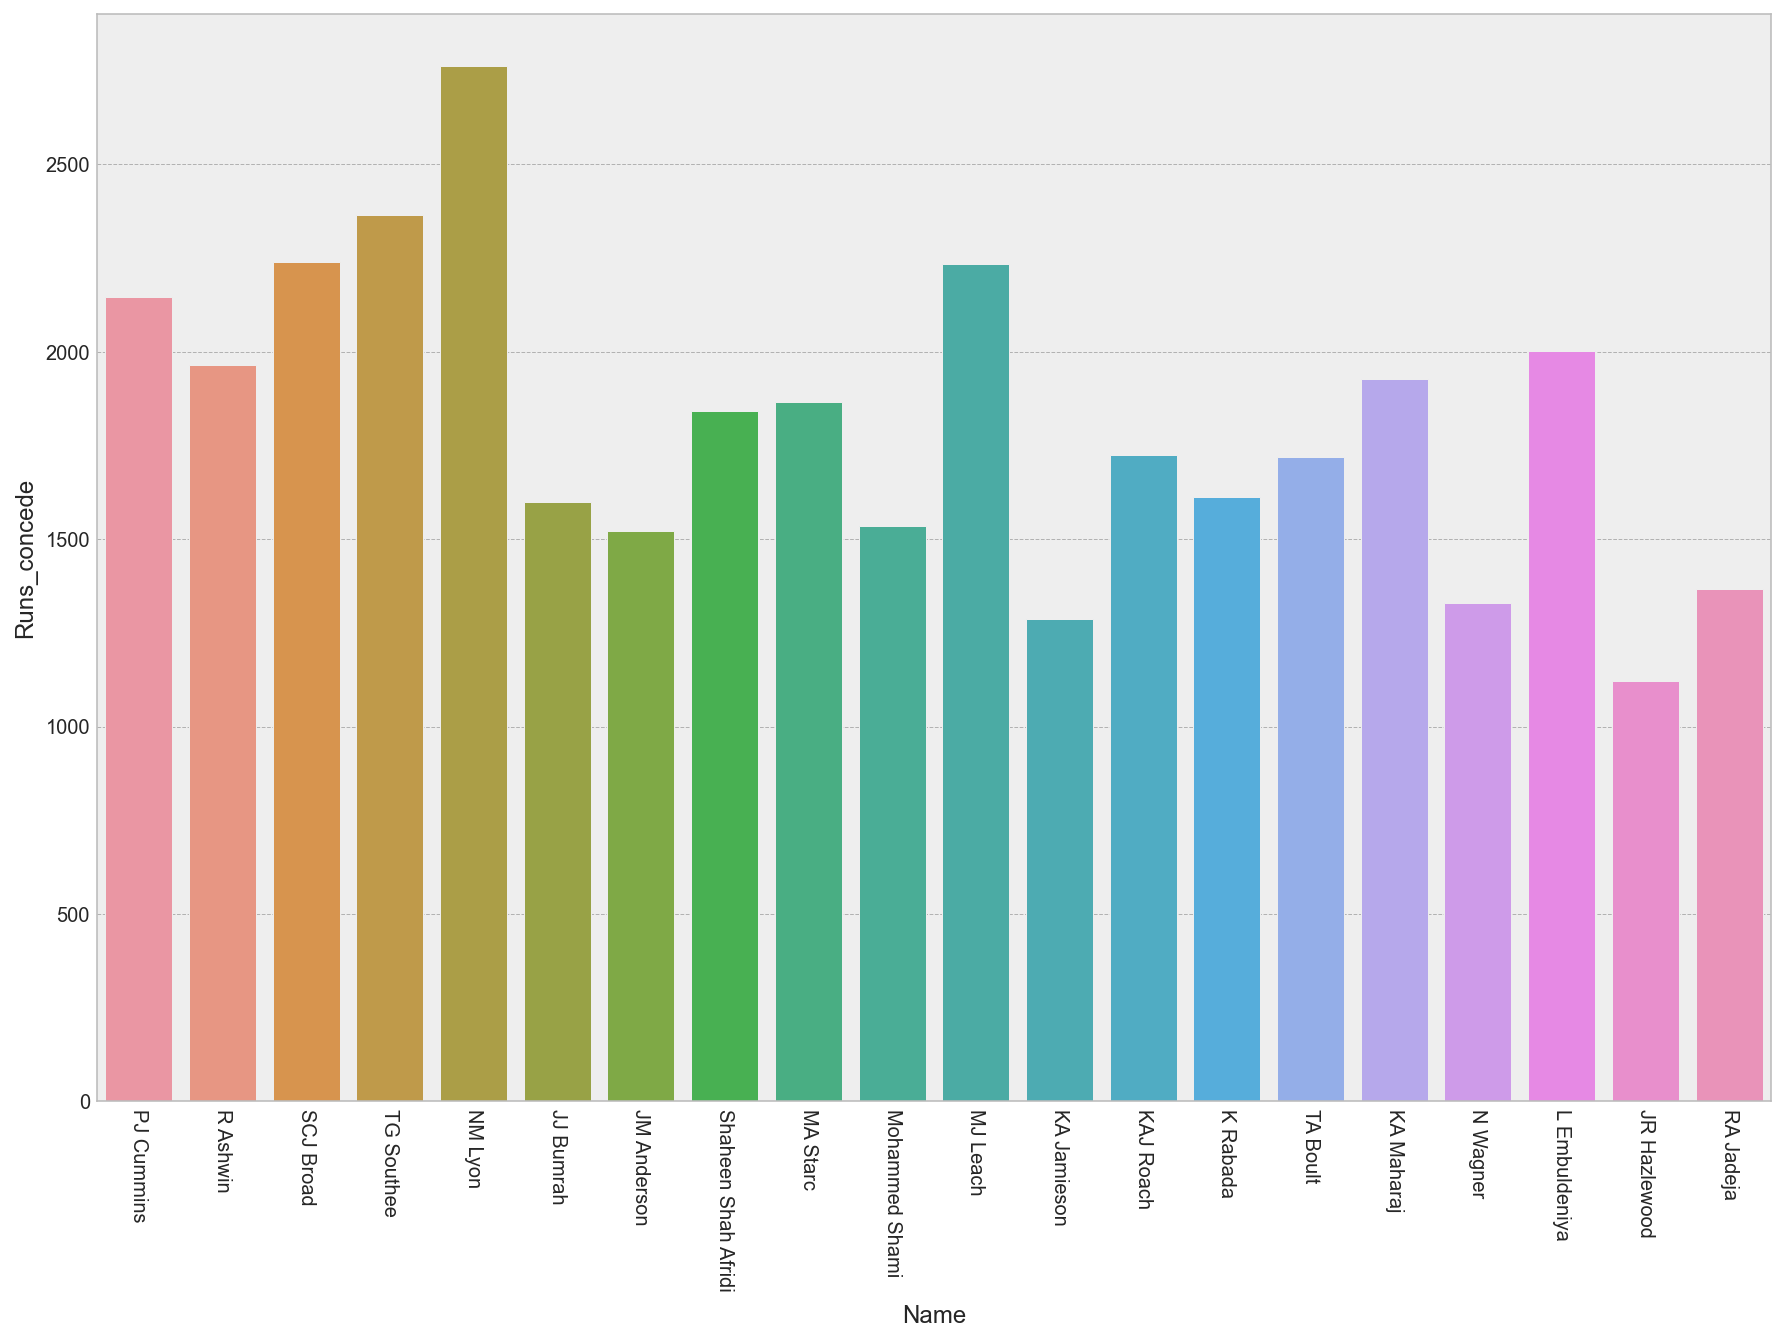

In [90]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Bowling_Stats.head(20) , x = 'Name', y = 'Runs_concede', );

### Wickets

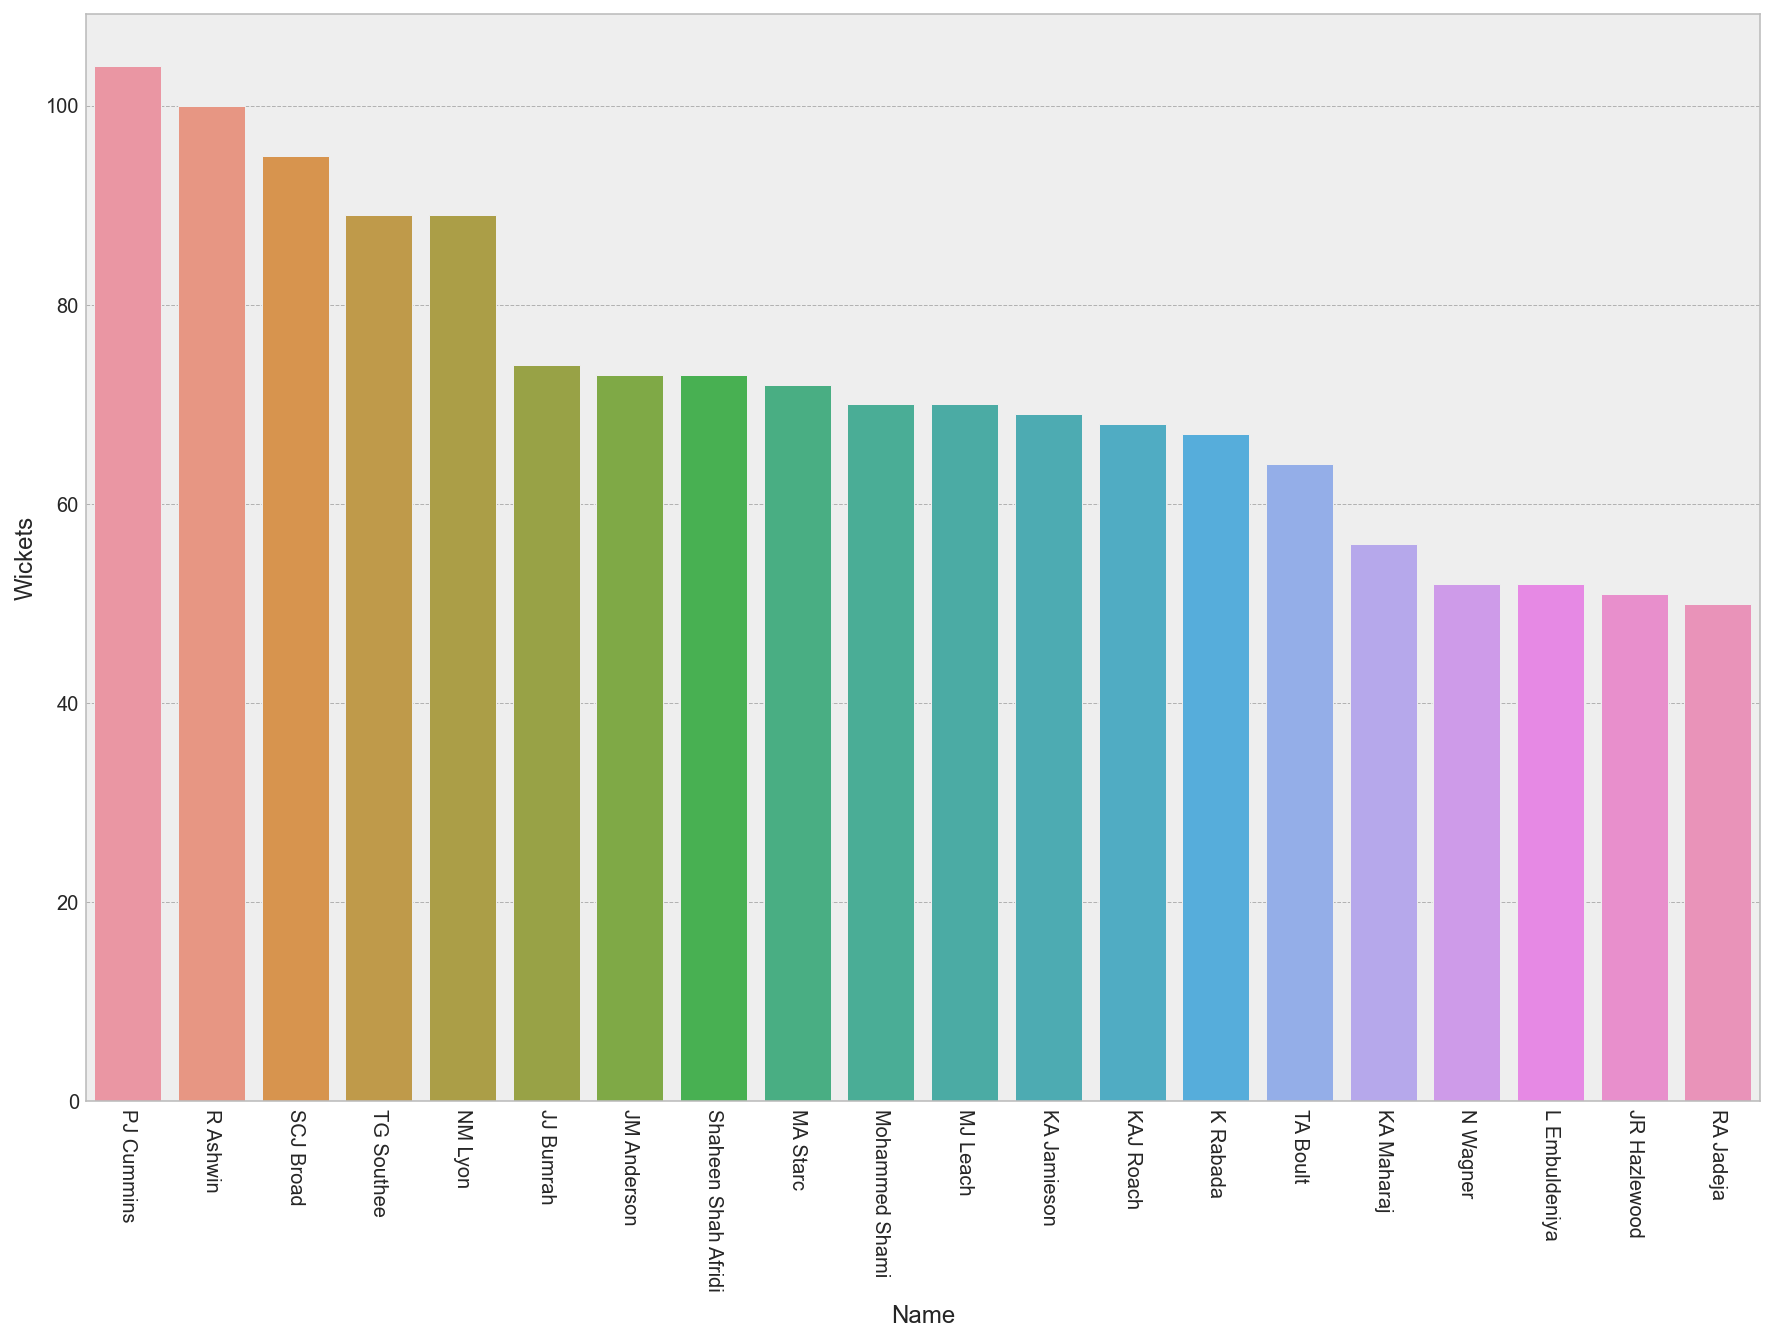

In [91]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Bowling_Stats.head(20) , x = 'Name', y = 'Wickets', );

### Average

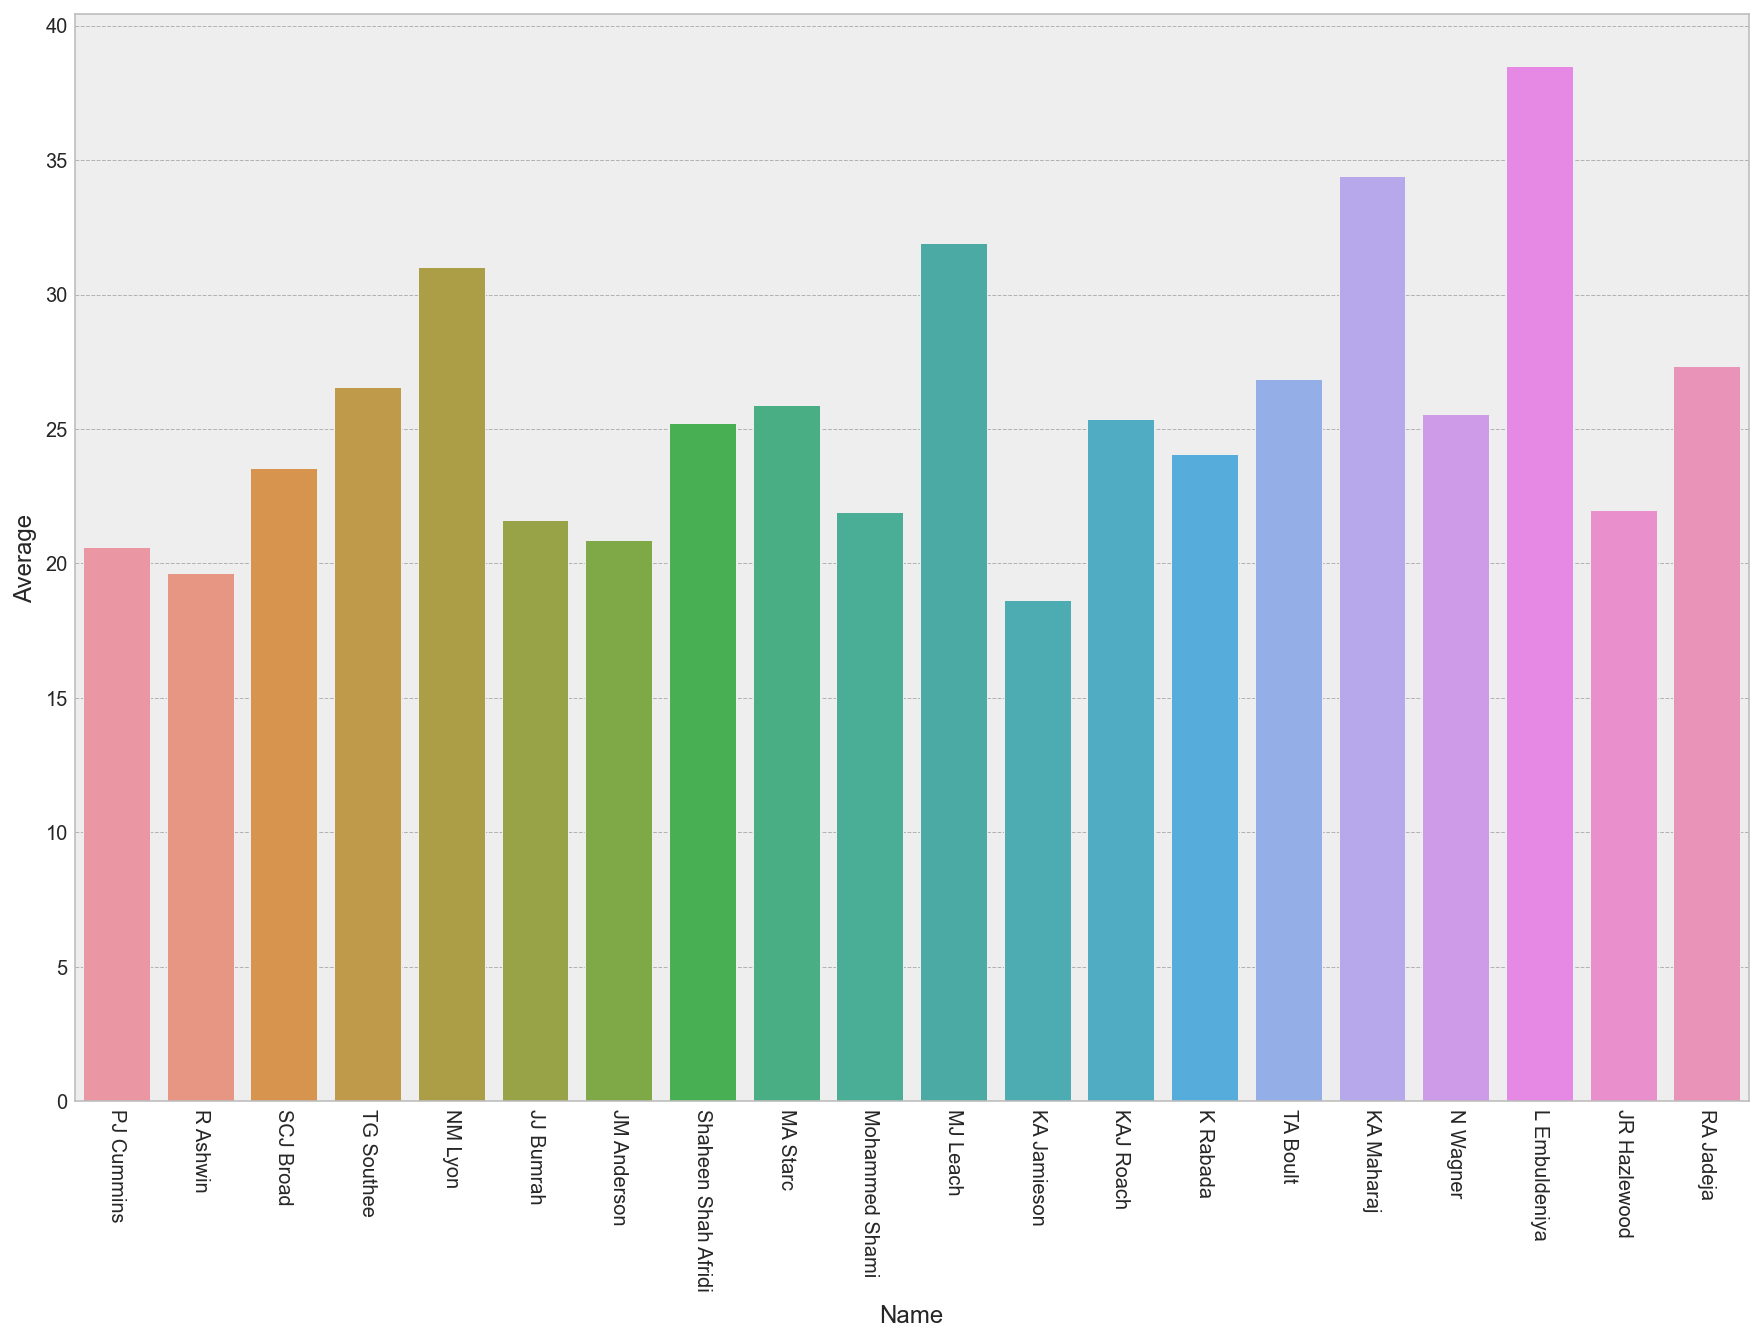

In [92]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Bowling_Stats.head(20) , x = 'Name', y = 'Average', );

### Economy

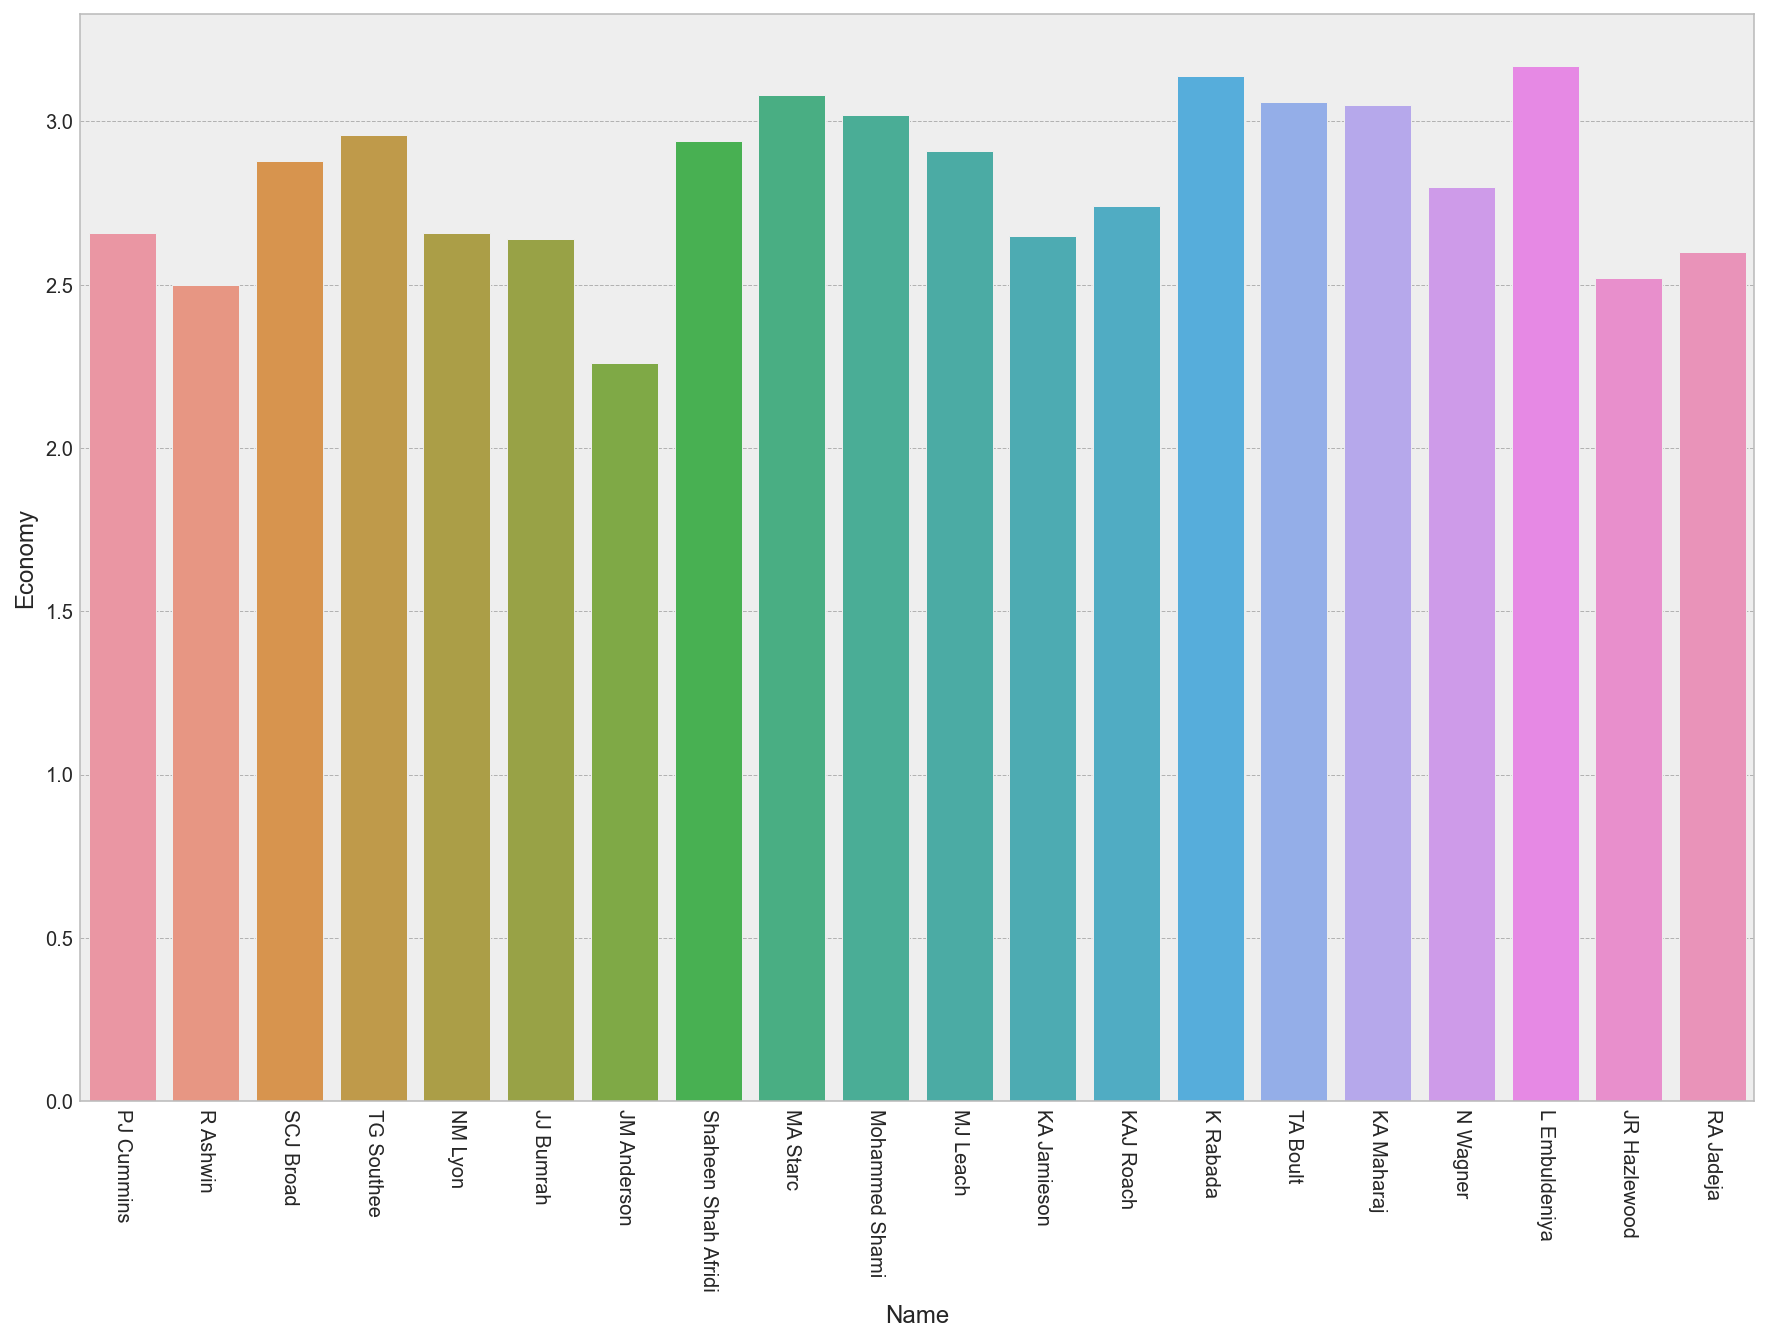

In [93]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Bowling_Stats.head(20) , x = 'Name', y = 'Economy', );

### Strike rate

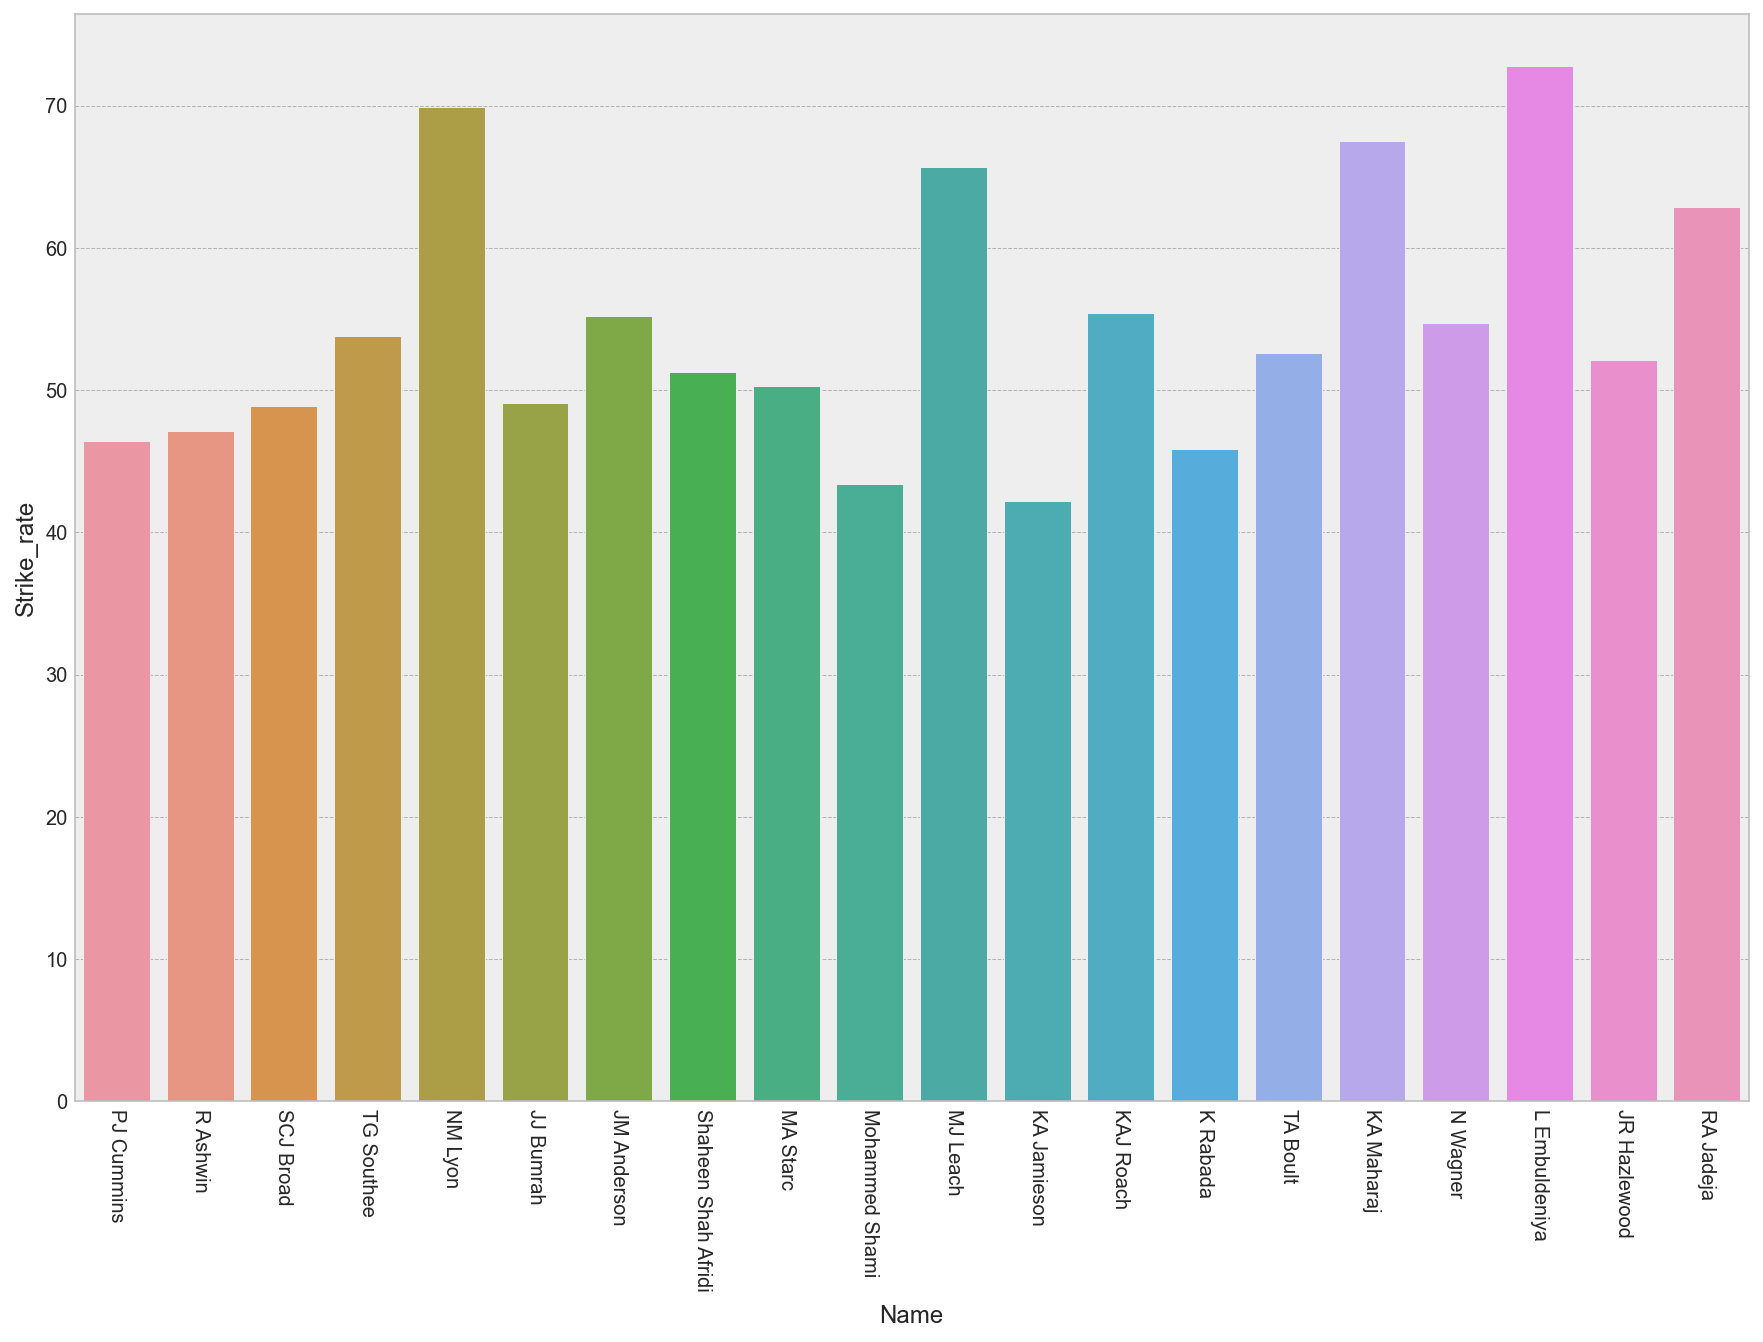

In [94]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Bowling_Stats.head(20) , x = 'Name', y = 'Strike_rate', );

### Fifer

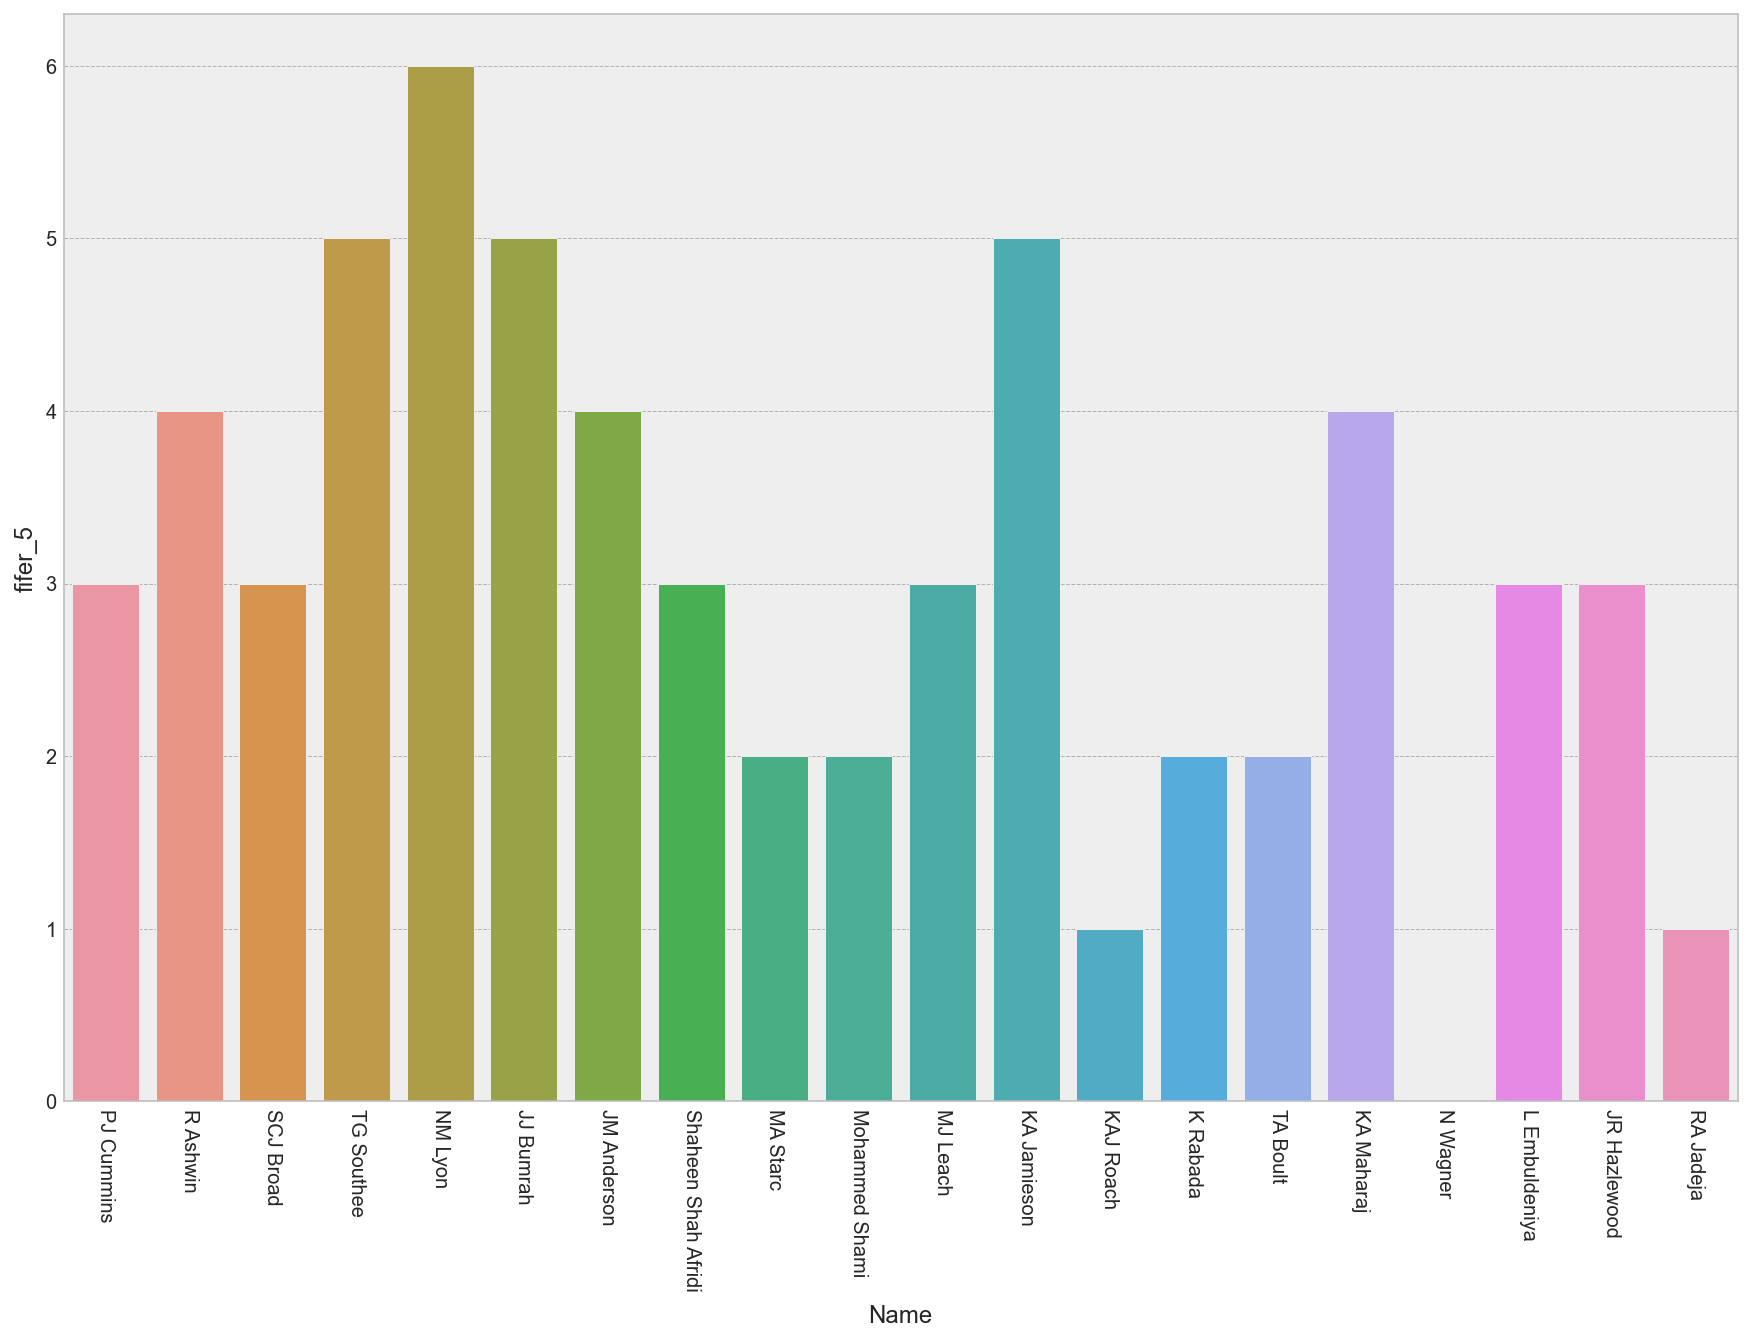

In [95]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Bowling_Stats.head(20) , x = 'Name', y = 'fifer_5', );

### Ten Wickets`

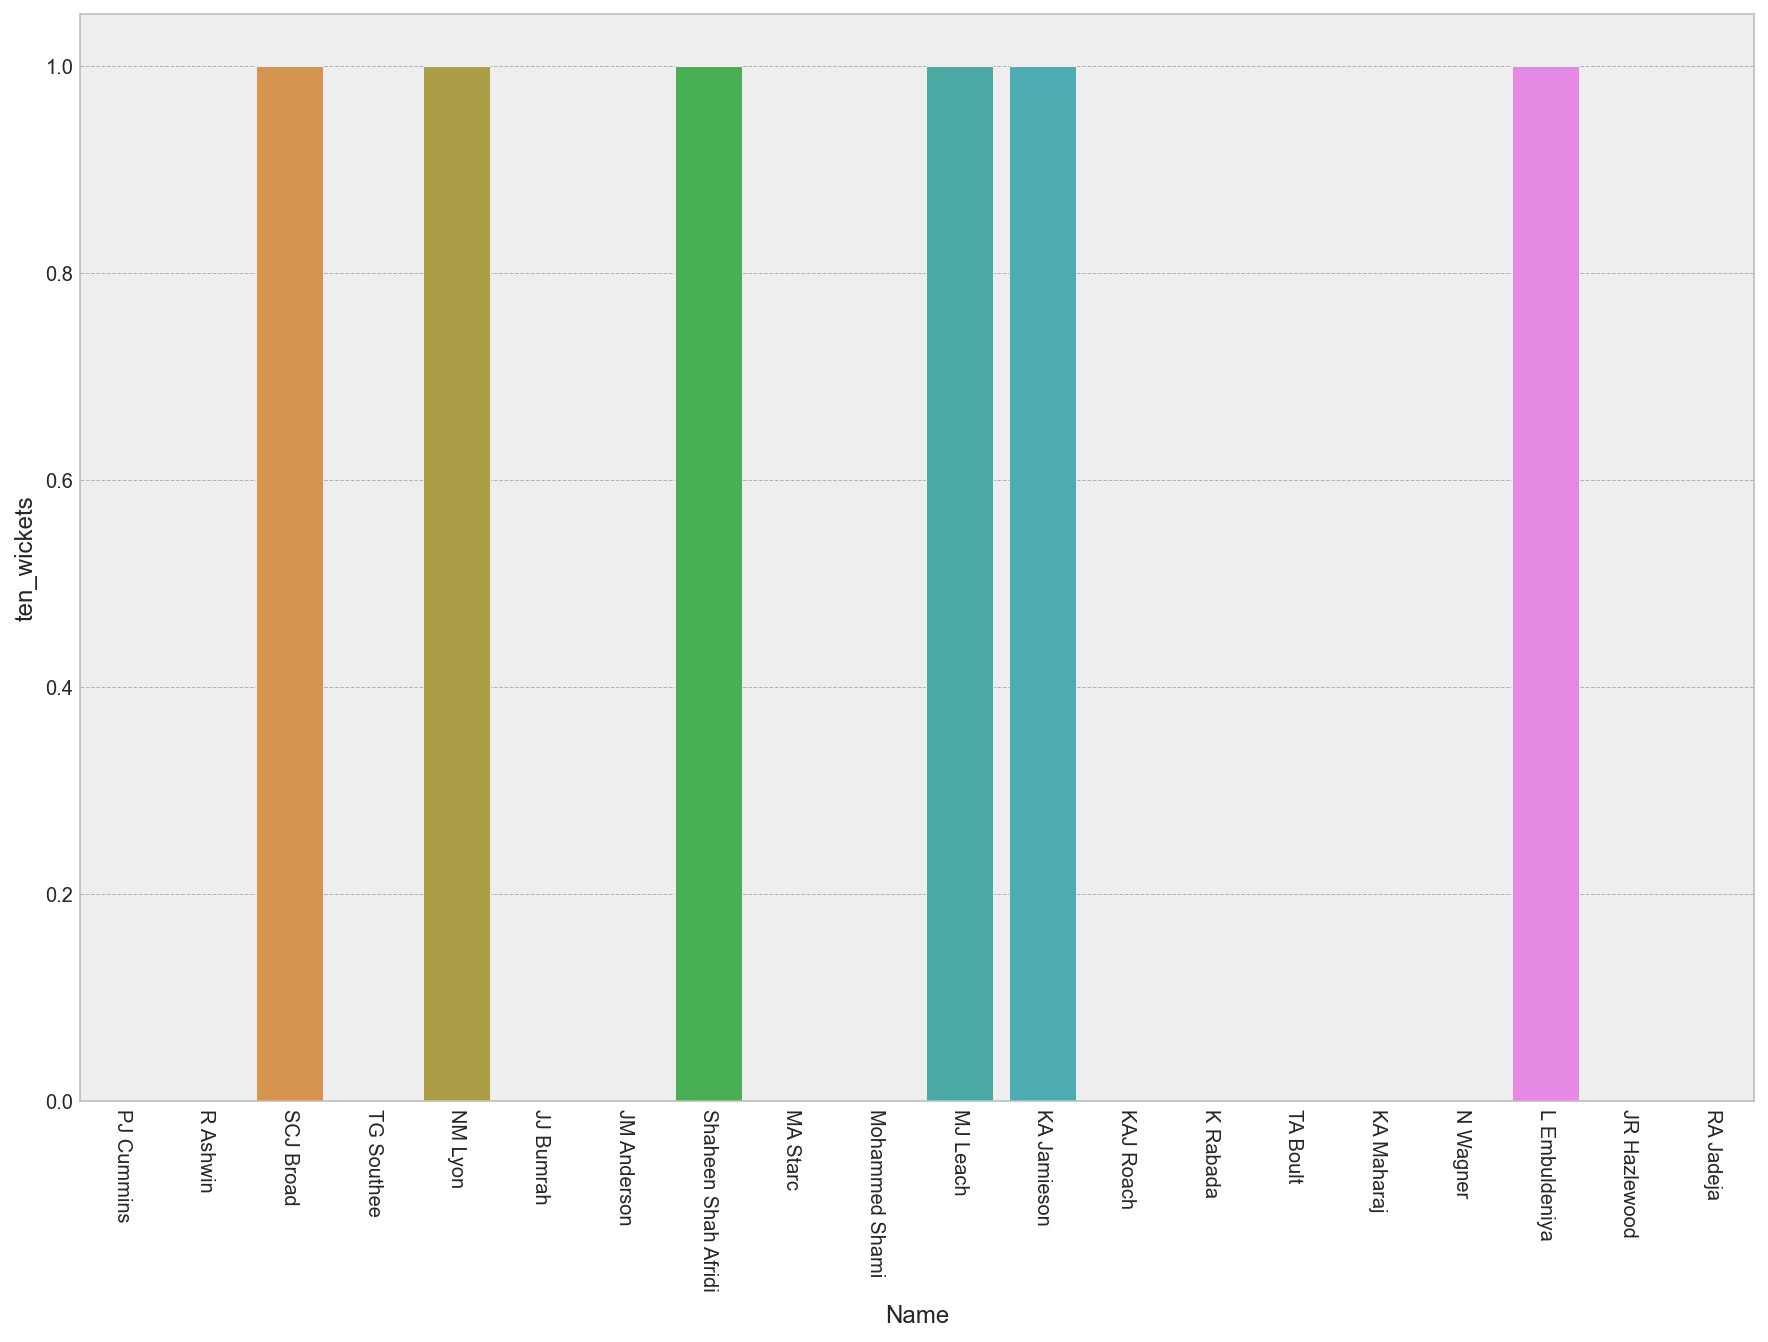

In [96]:
plt.figure(figsize = (15,10))
plt.xticks(rotation = 270)
sns.barplot(data = Icc_WTC_Bowling_Stats.head(20) , x = 'Name', y = 'ten_wickets', );

### Country wise total number of playes

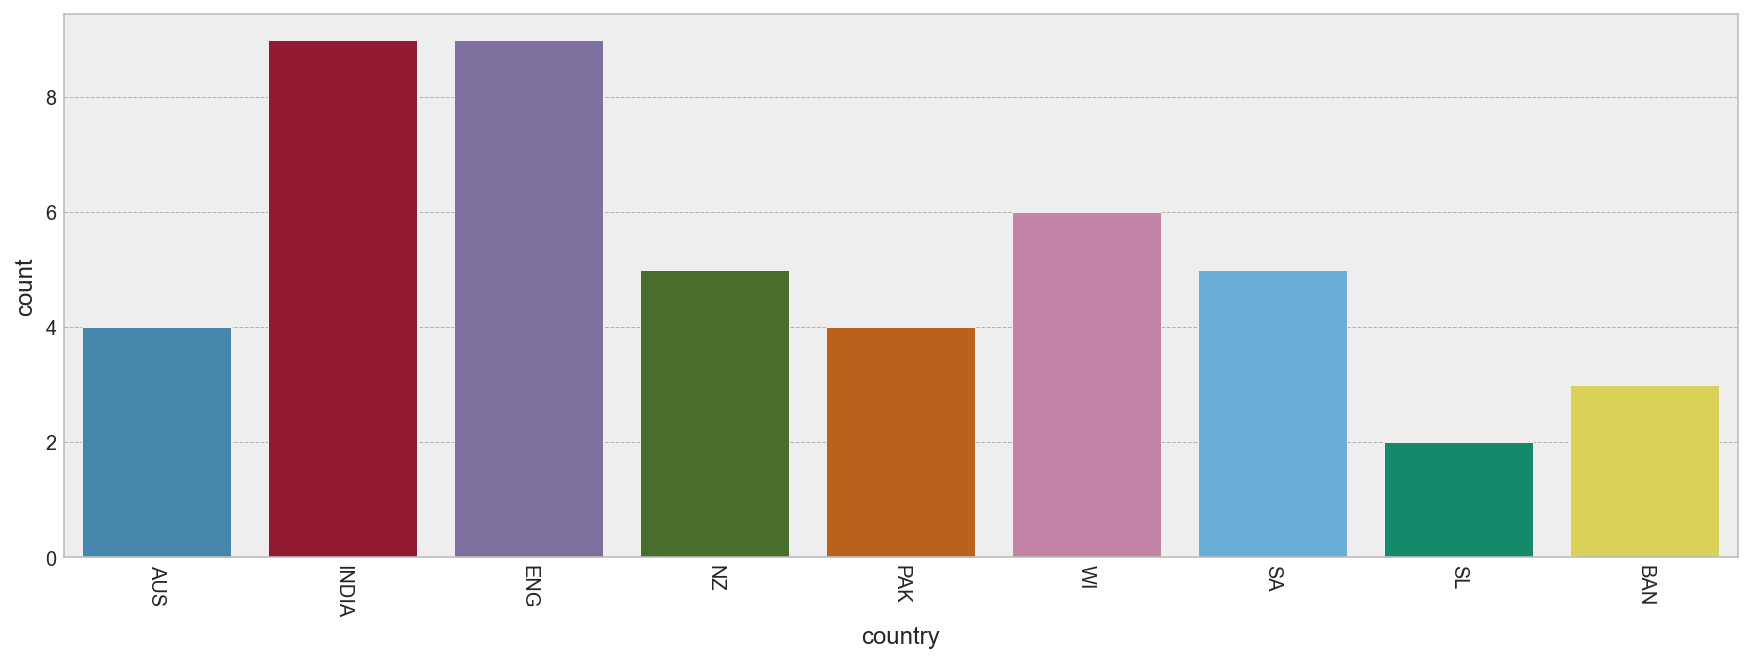

In [99]:
plt.figure(figsize = (15,5))
plt.xticks(rotation = 270)
sns.countplot(data = Icc_WTC_Bowling_Stats, x = 'country');

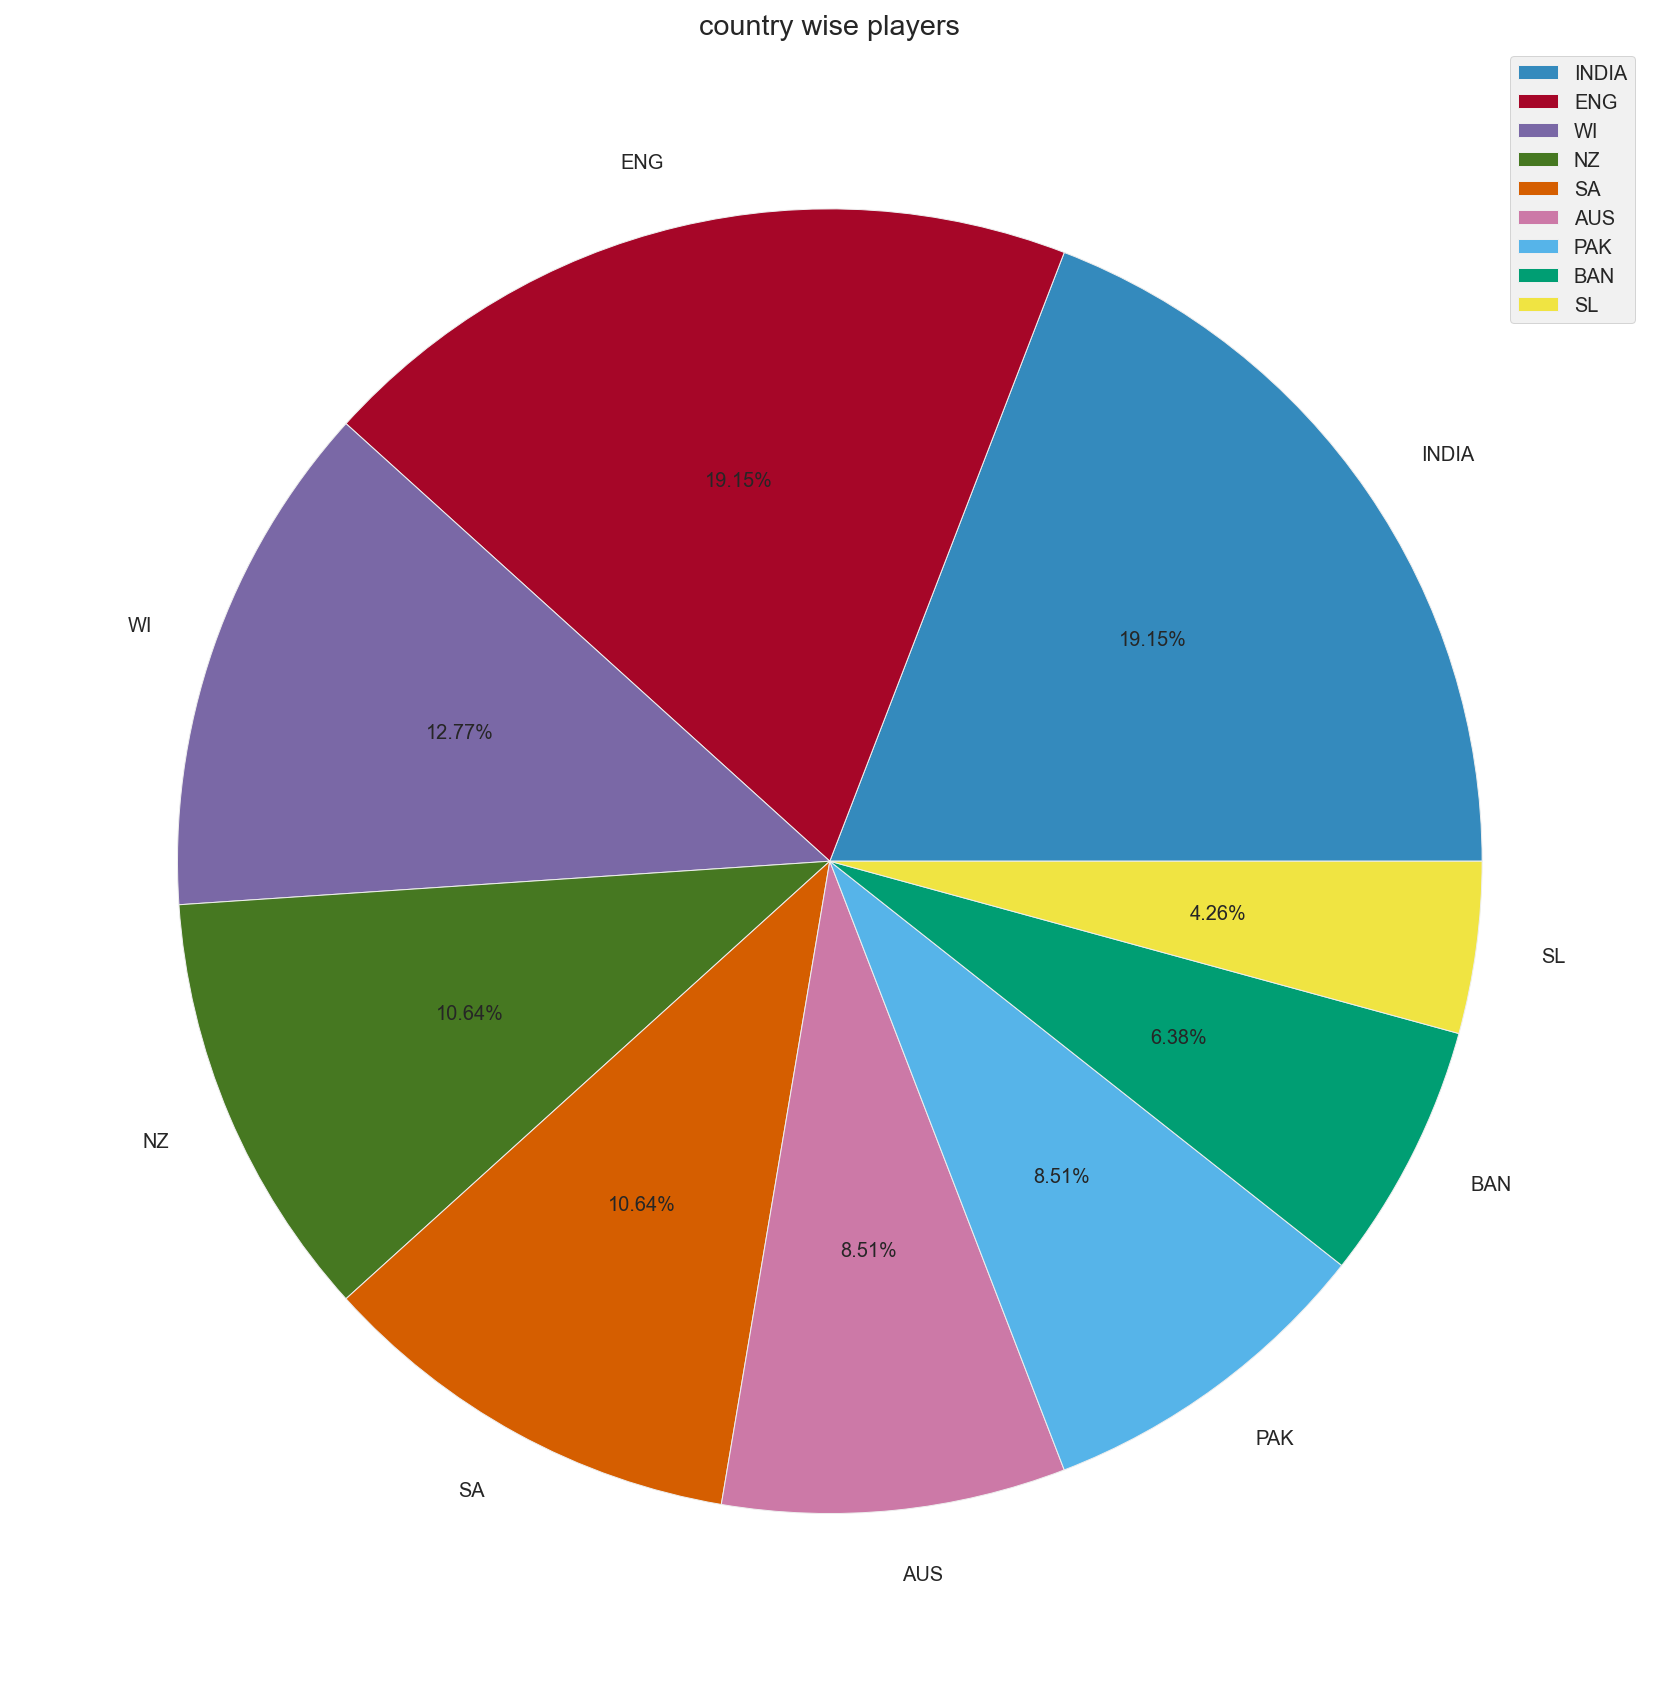

In [100]:
plt.figure(figsize=(15,15))
plt.pie(x = Icc_WTC_Bowling_Stats.country.value_counts().values,
       labels = Icc_WTC_Bowling_Stats.country.value_counts().index,
       autopct = '%.2f%%')
plt.title('country wise players')
plt.legend();

### Correlation

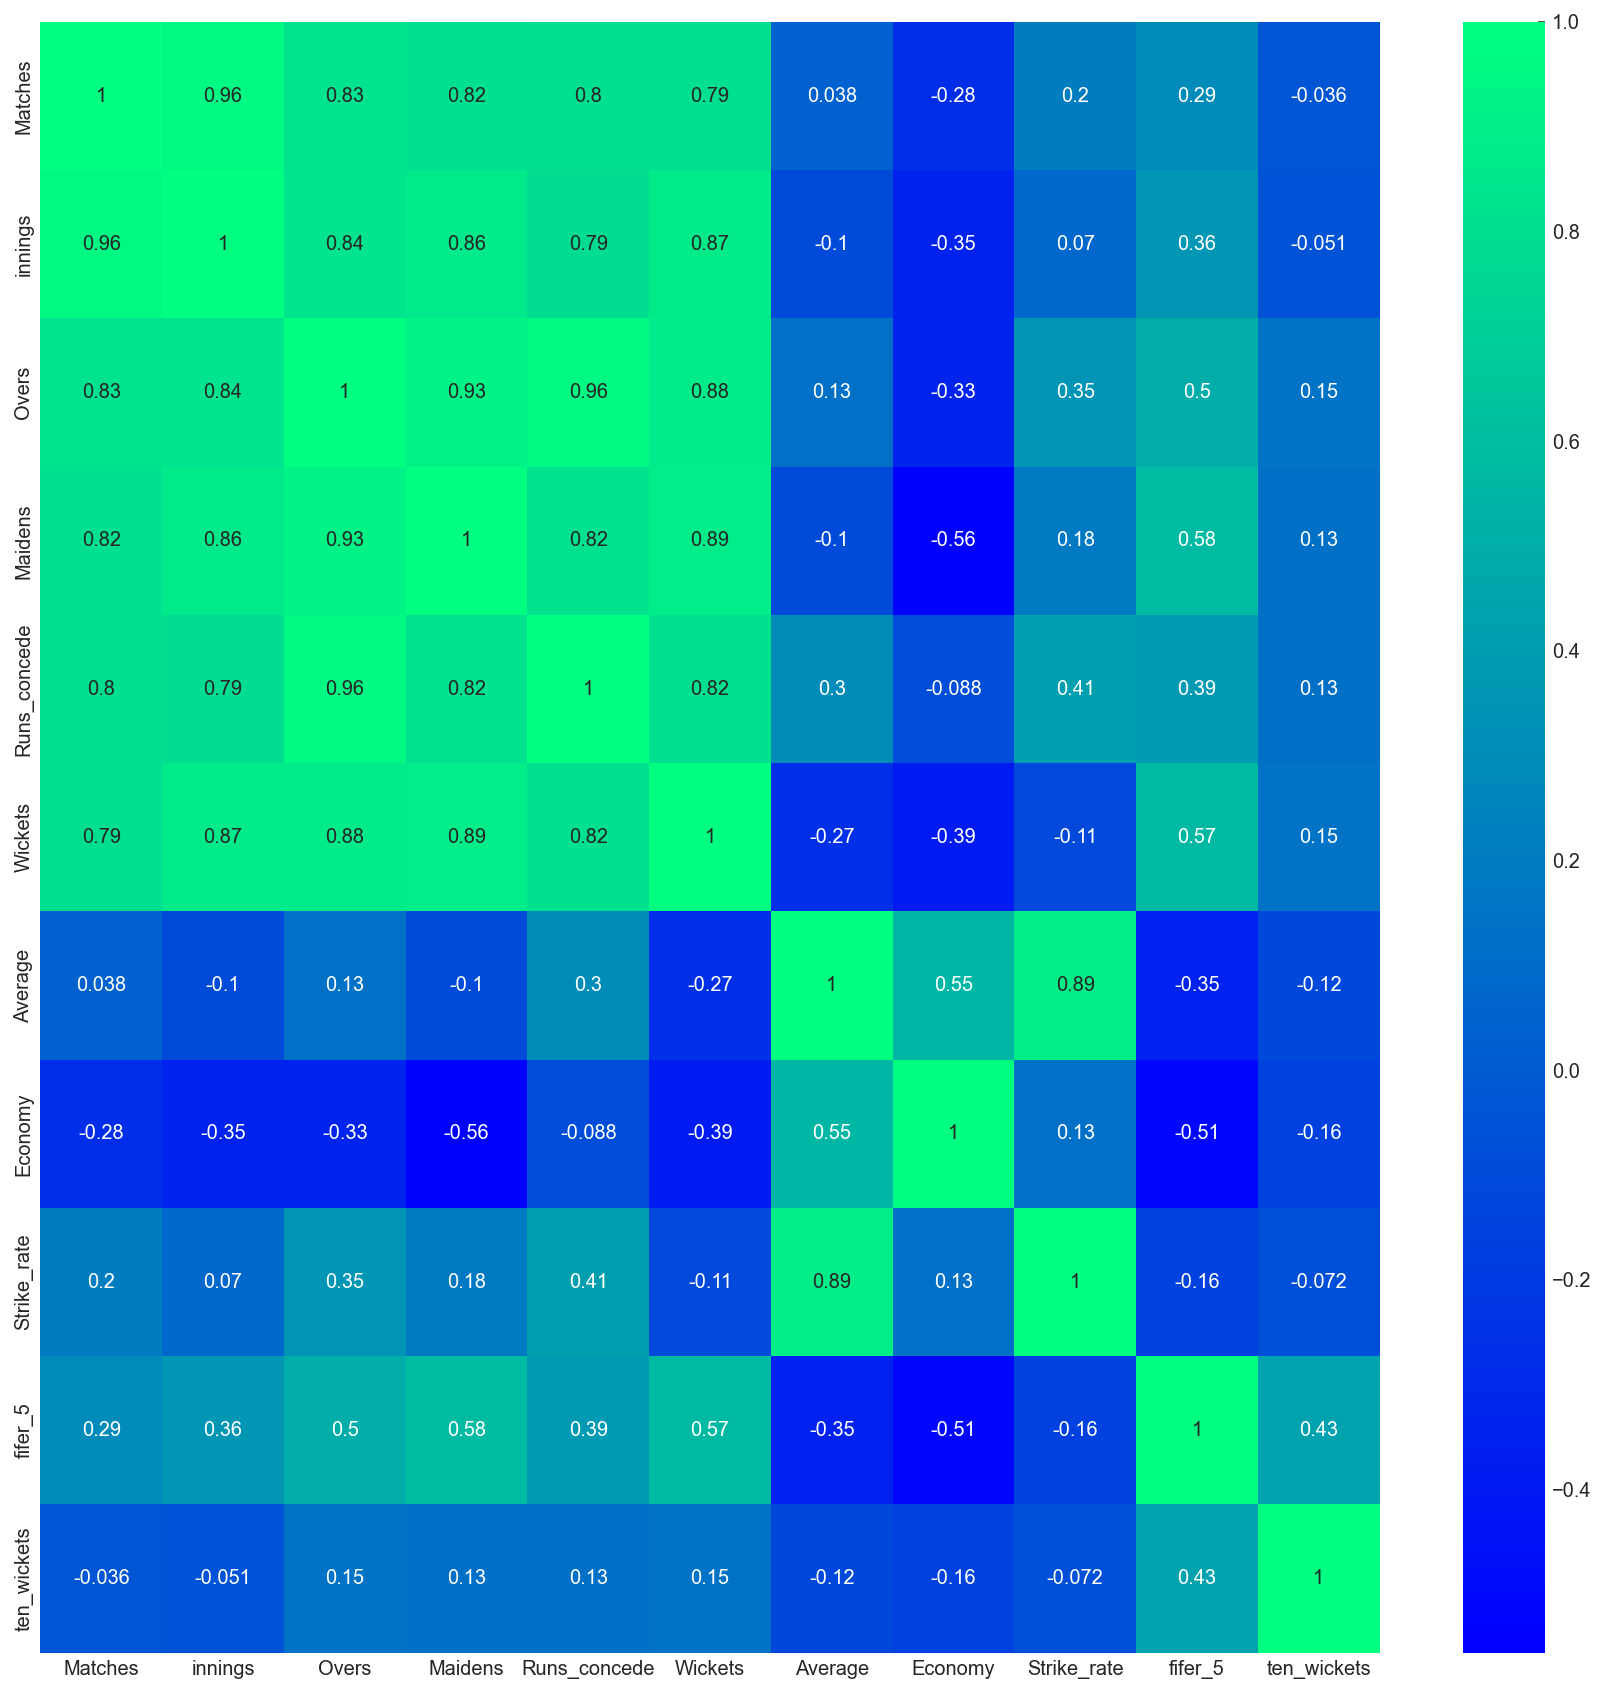

In [101]:
plt.figure(figsize=(15,15))
sns.heatmap(Icc_WTC_Bowling_Stats.corr(), cmap = 'winter', annot=True);

### MATCHES VS Overs

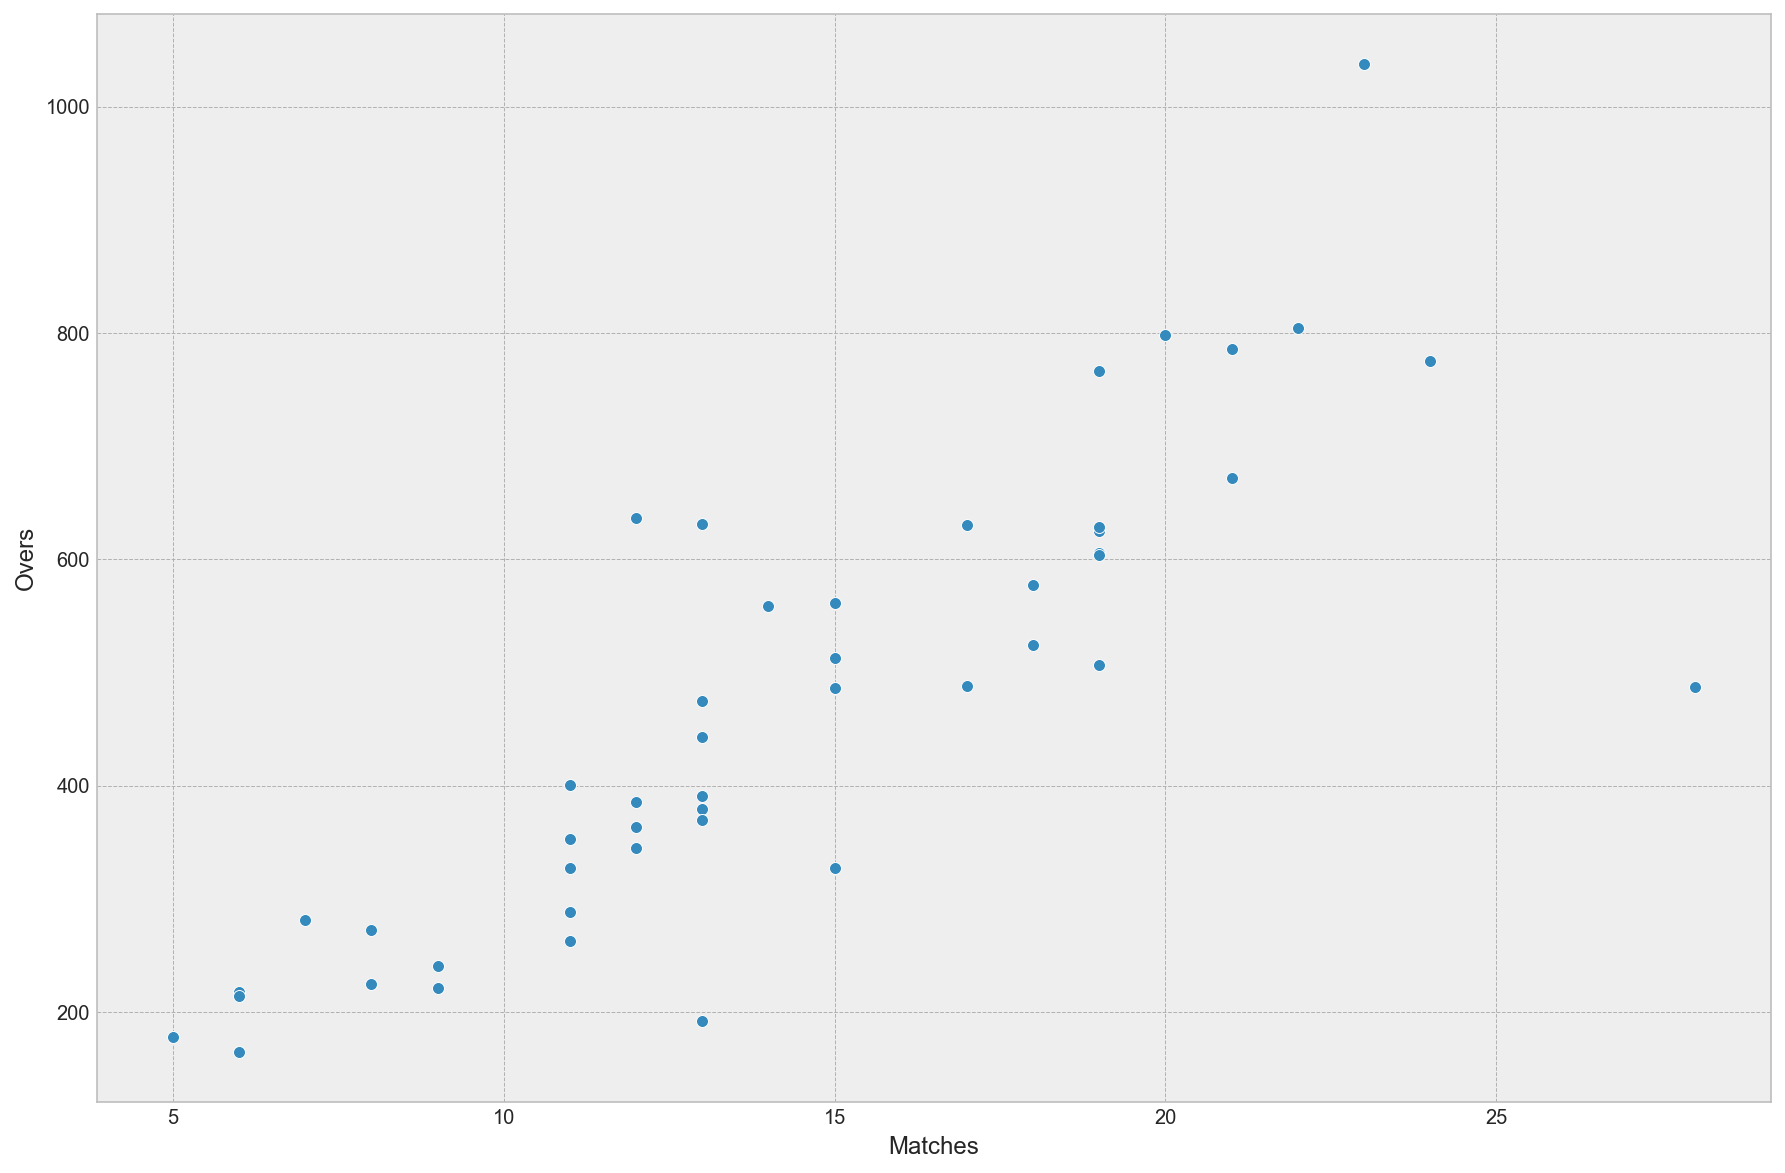

In [103]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Bowling_Stats, x = "Matches", y = 'Overs');

### MATCHES VS Runs_concede

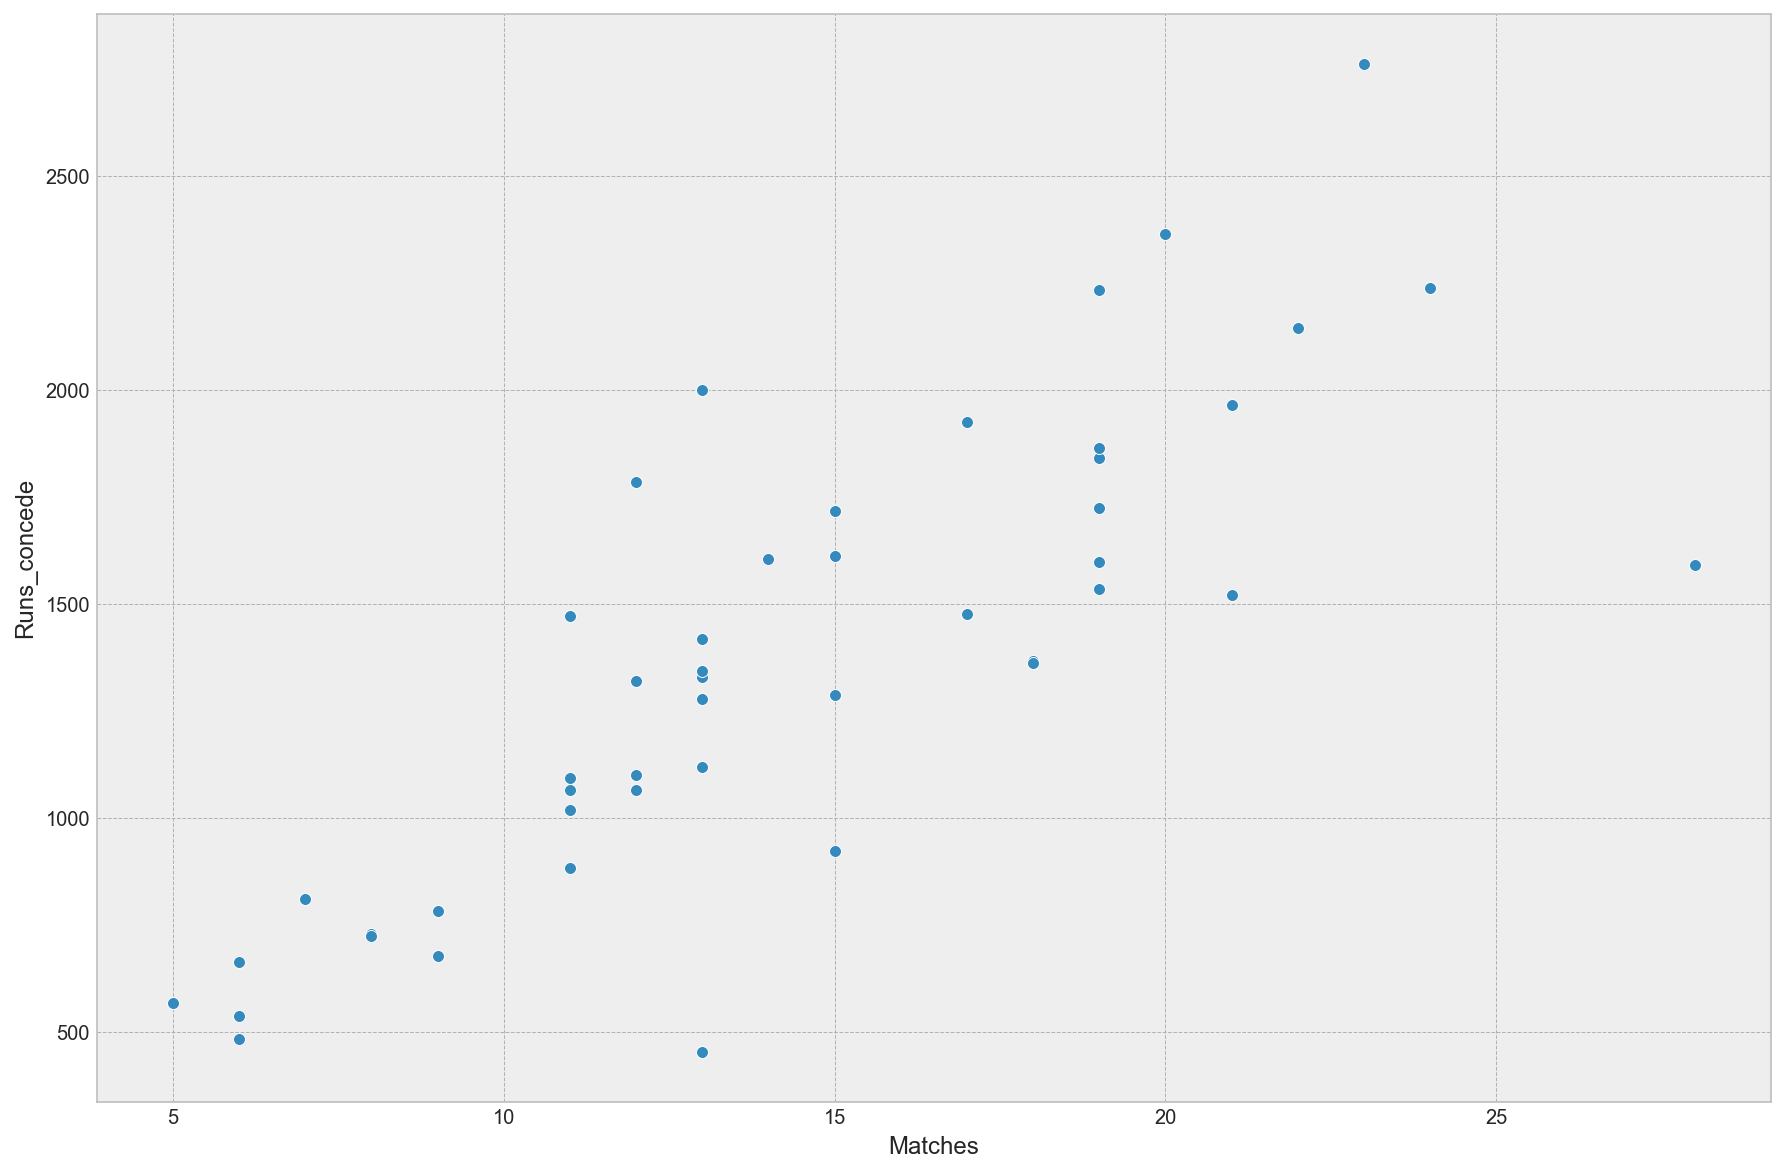

In [104]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Bowling_Stats, x = "Matches", y = 'Runs_concede');

### MATCHES VS Wickets

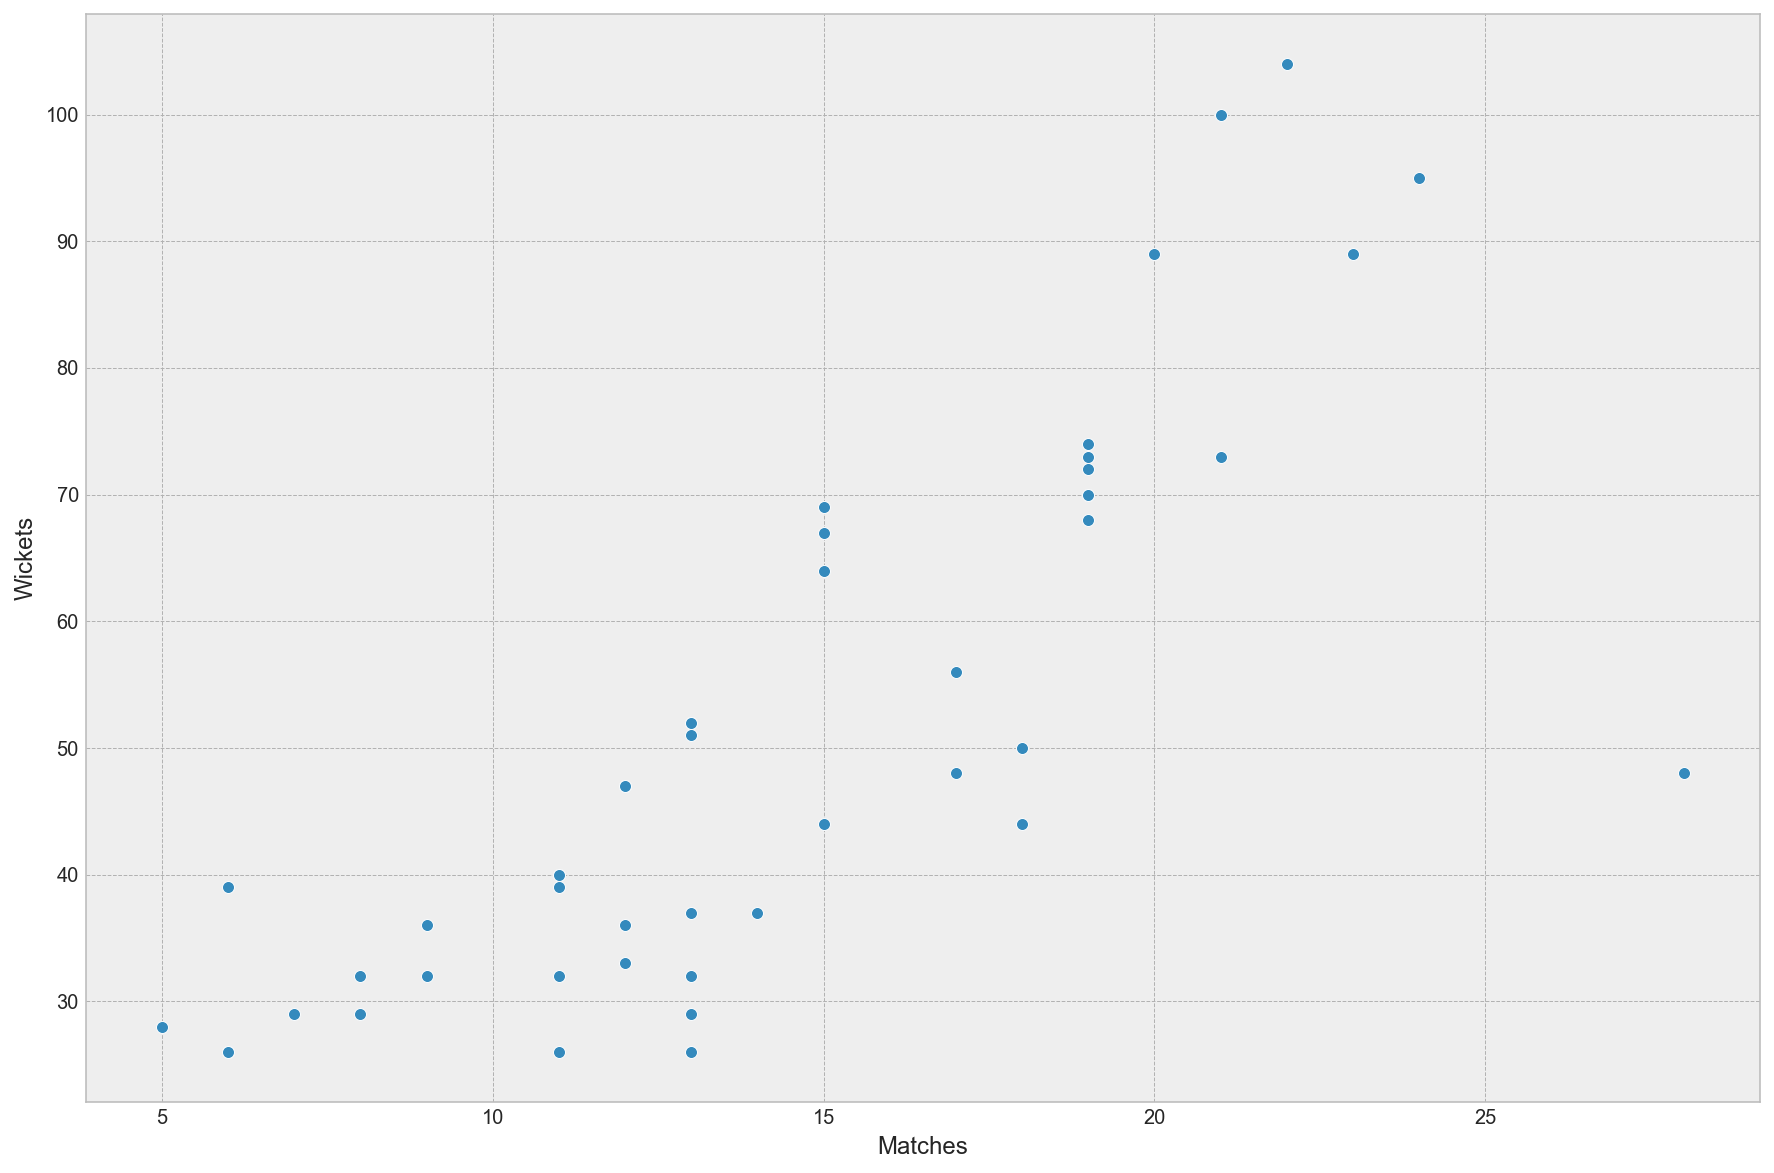

In [105]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Bowling_Stats, x = "Matches", y = 'Wickets');

### MATCHES VS Average

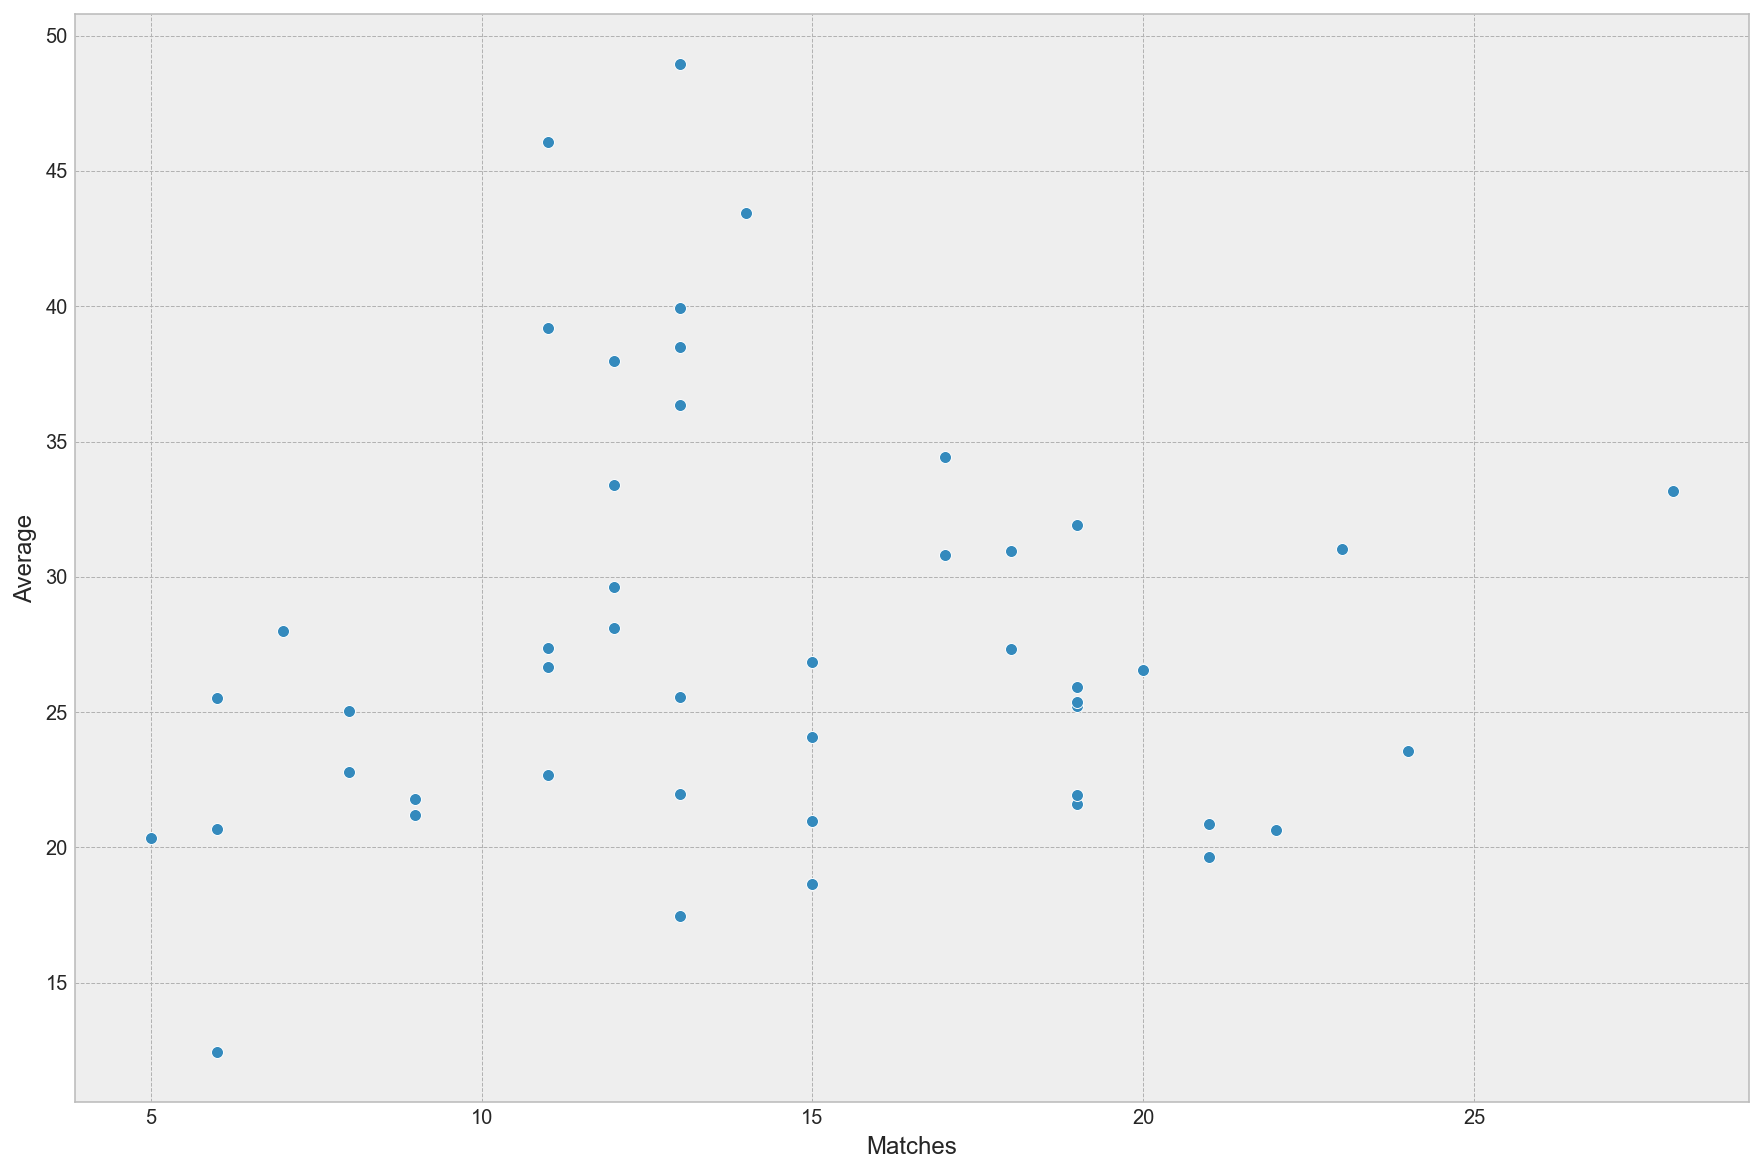

In [106]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Bowling_Stats, x = "Matches", y = 'Average');

### MATCHES VS Economy

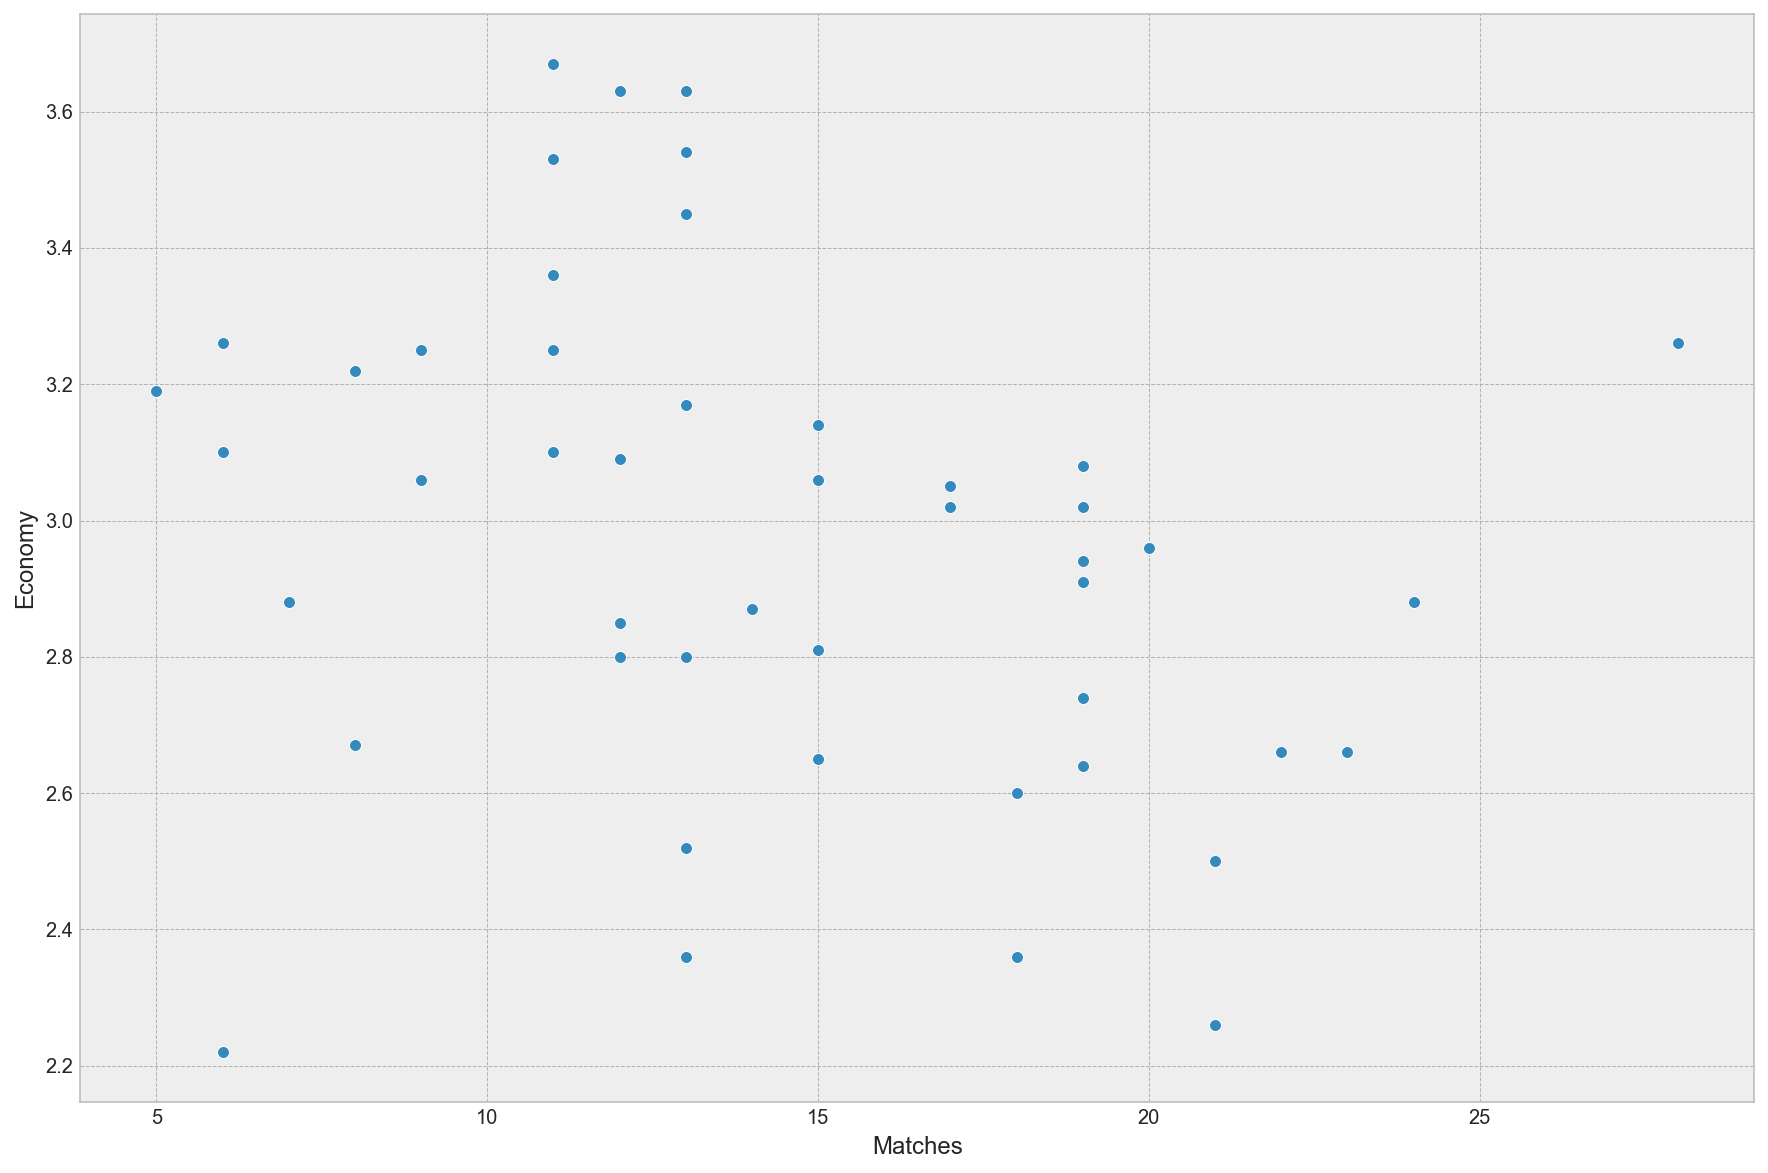

In [107]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Bowling_Stats, x = "Matches", y = 'Economy');

### MATCHES VS Strike_rate

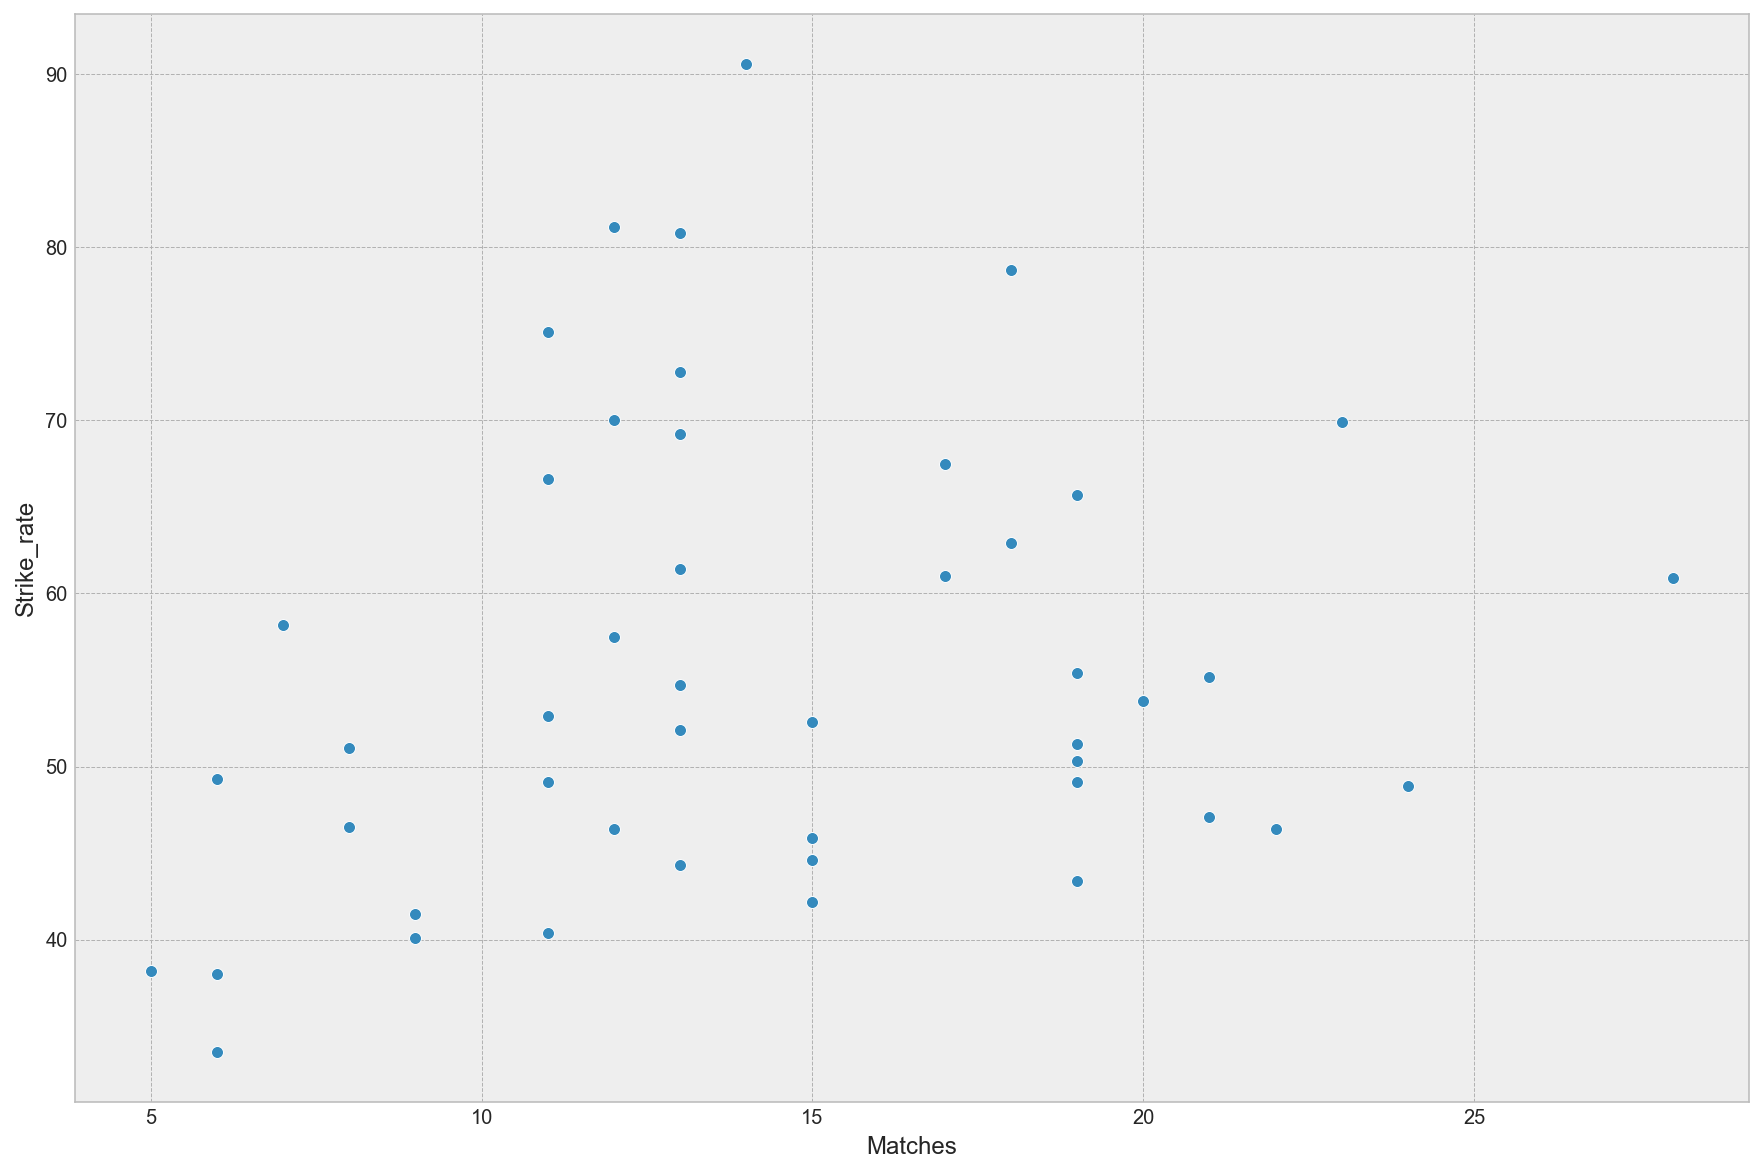

In [108]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Bowling_Stats, x = "Matches", y = 'Strike_rate');

### Overs vs Maidens

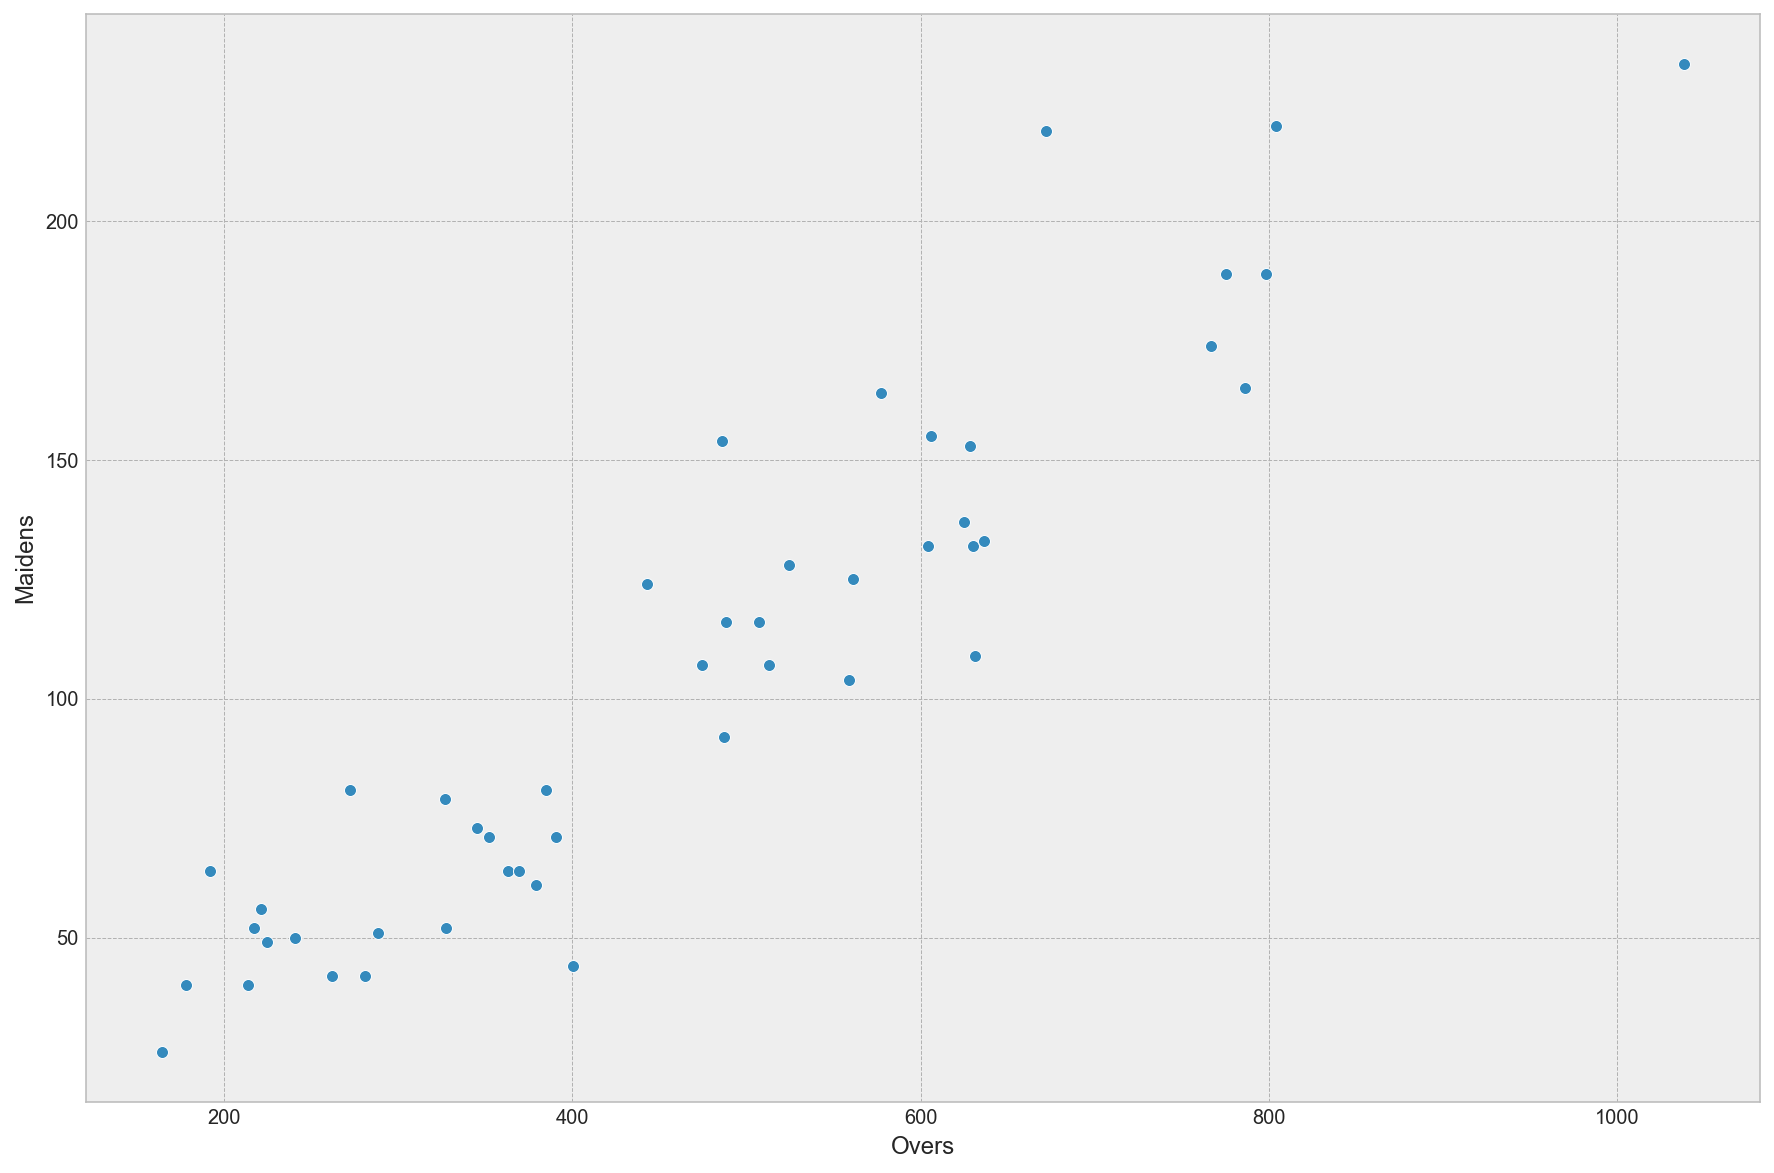

In [109]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Bowling_Stats, x = "Overs", y = 'Maidens');

### overs vs runs concede

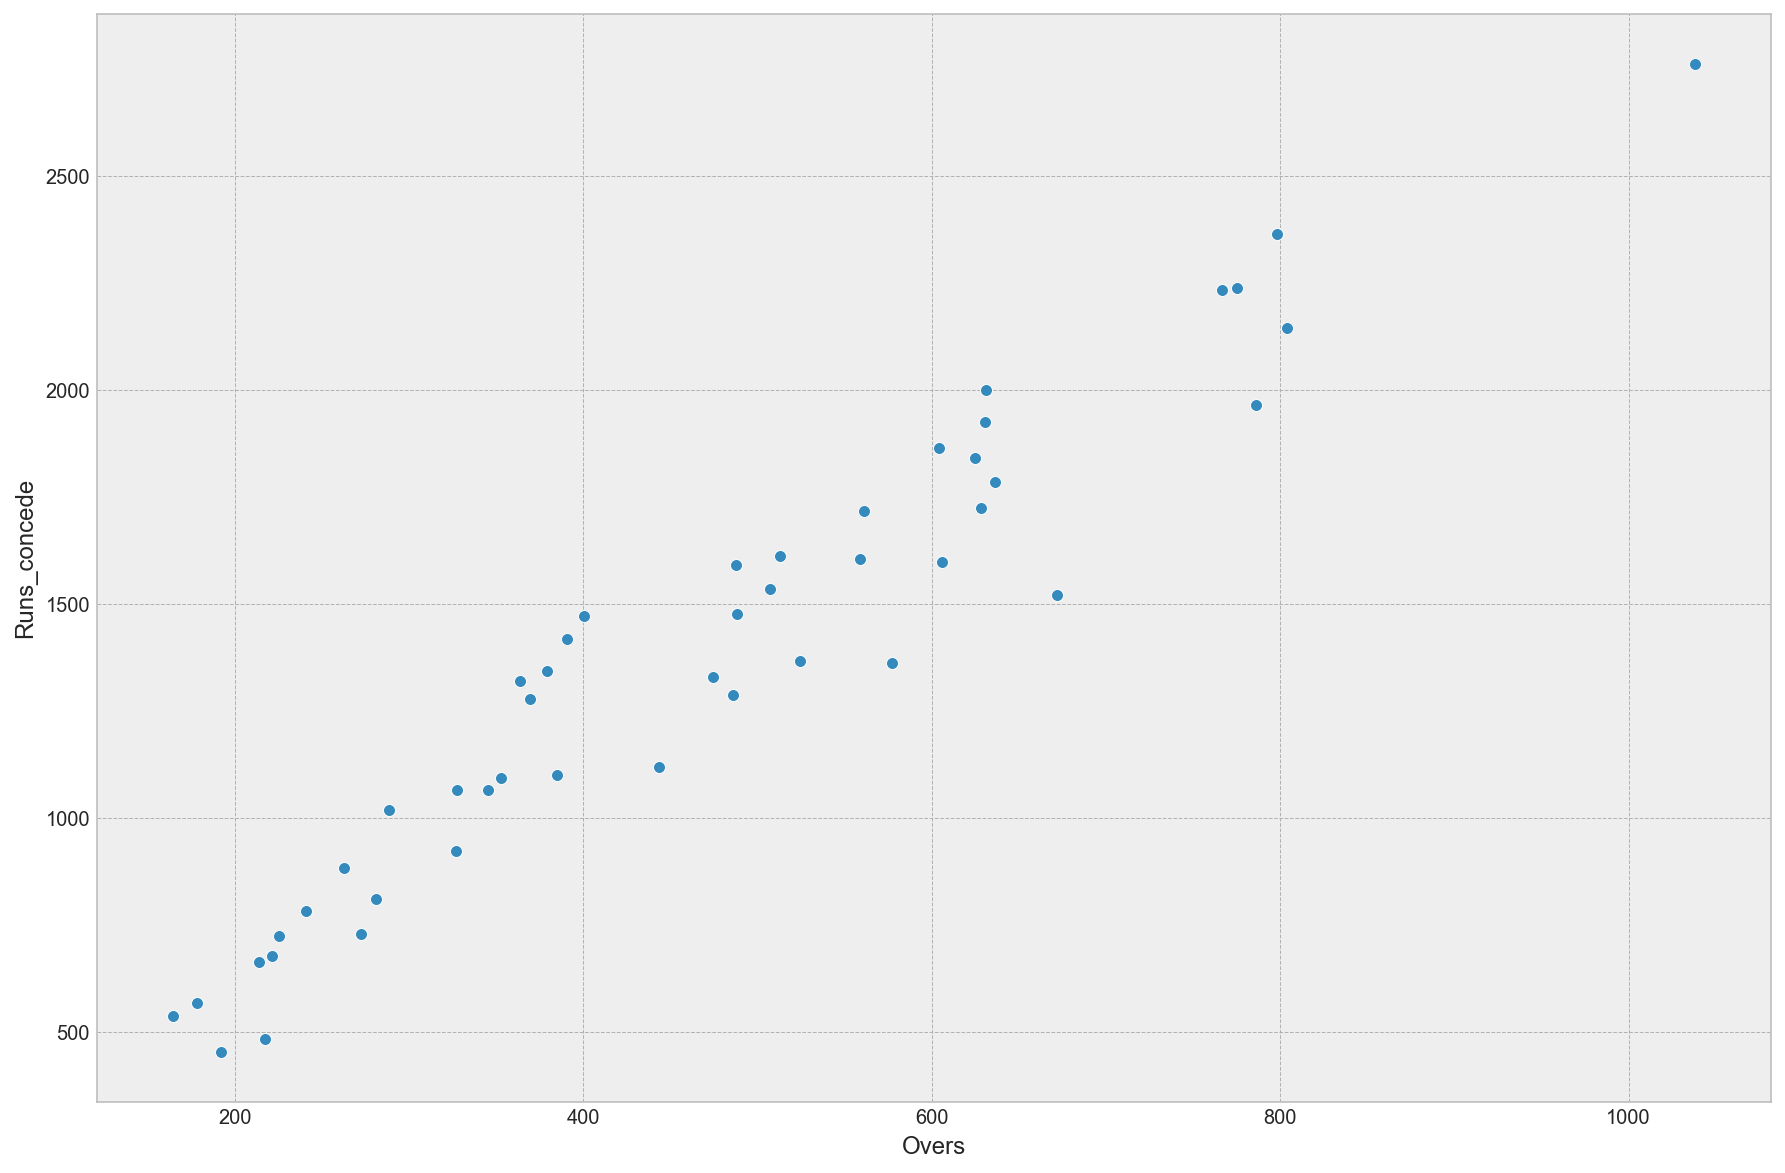

In [110]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Bowling_Stats, x = "Overs", y = 'Runs_concede');

### Overs vs Wickets

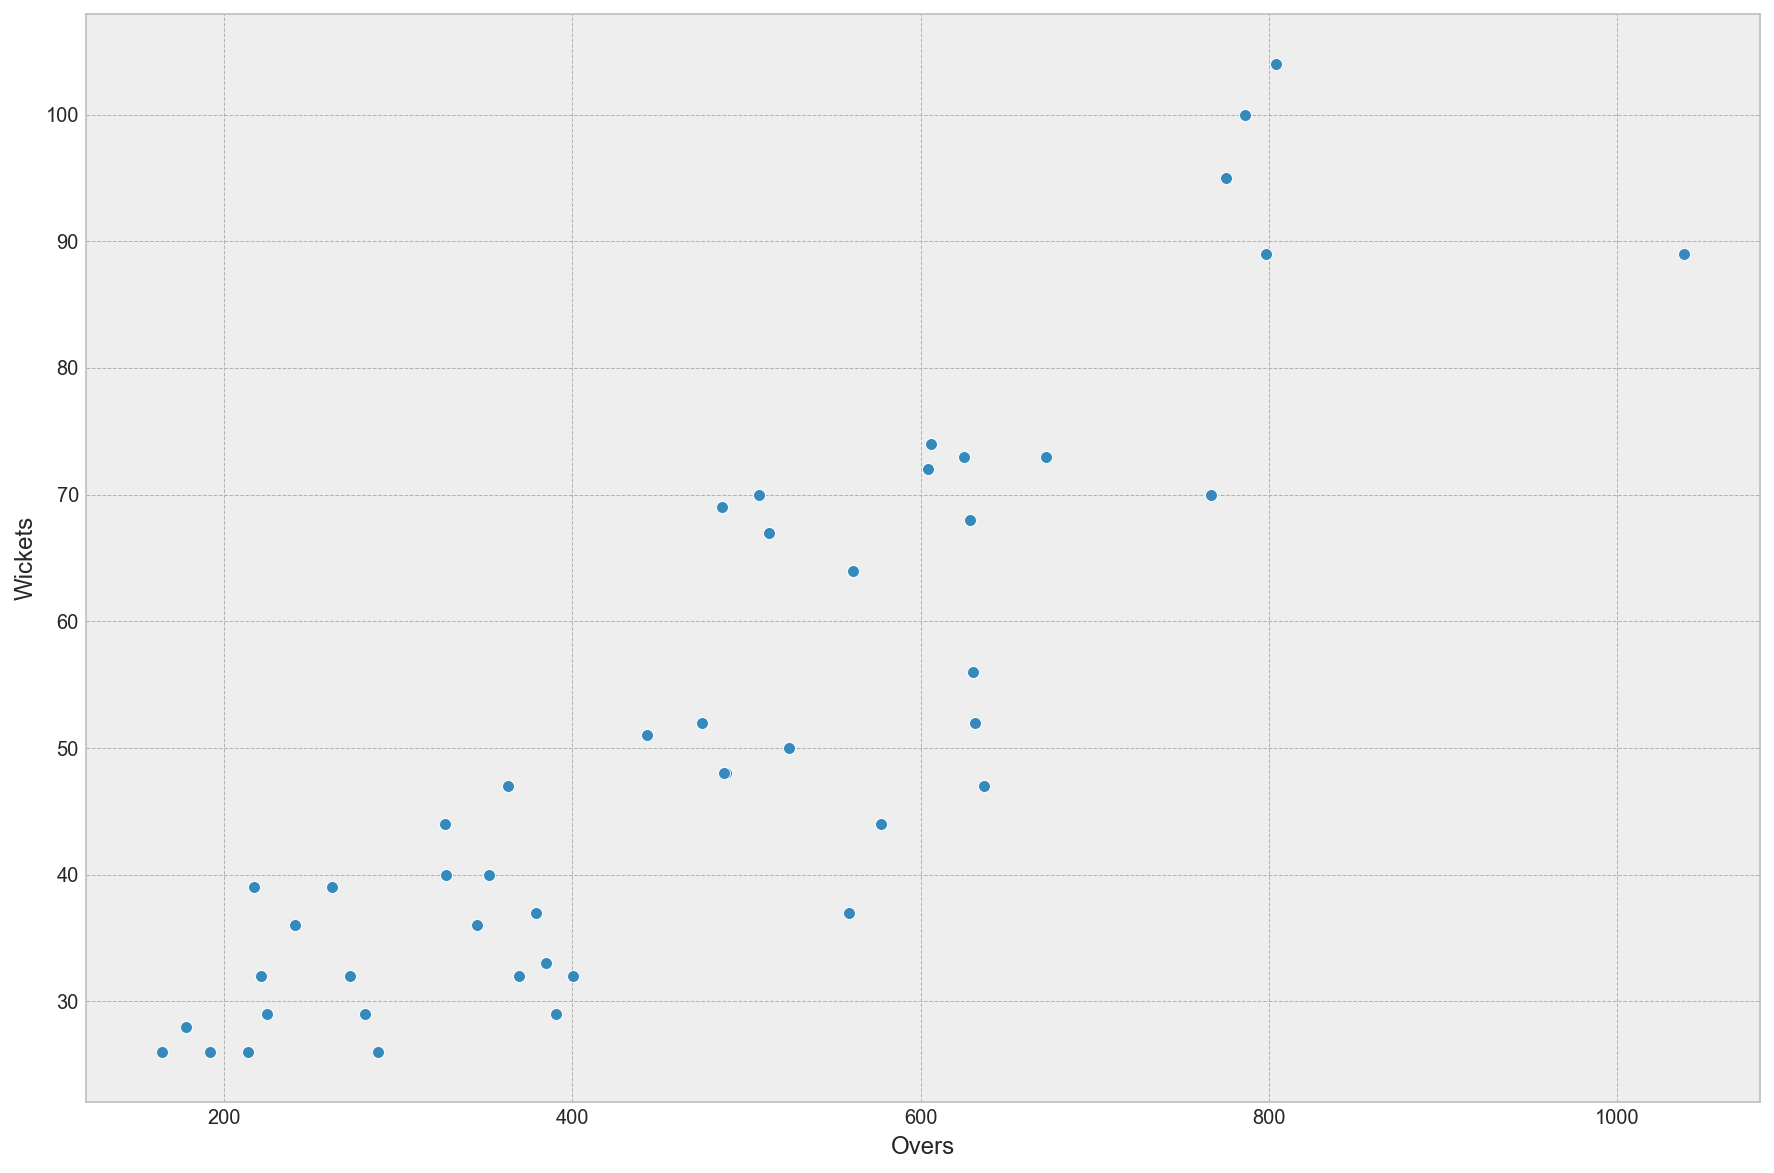

In [111]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Bowling_Stats, x = "Overs", y = 'Wickets');

### Overs vs average

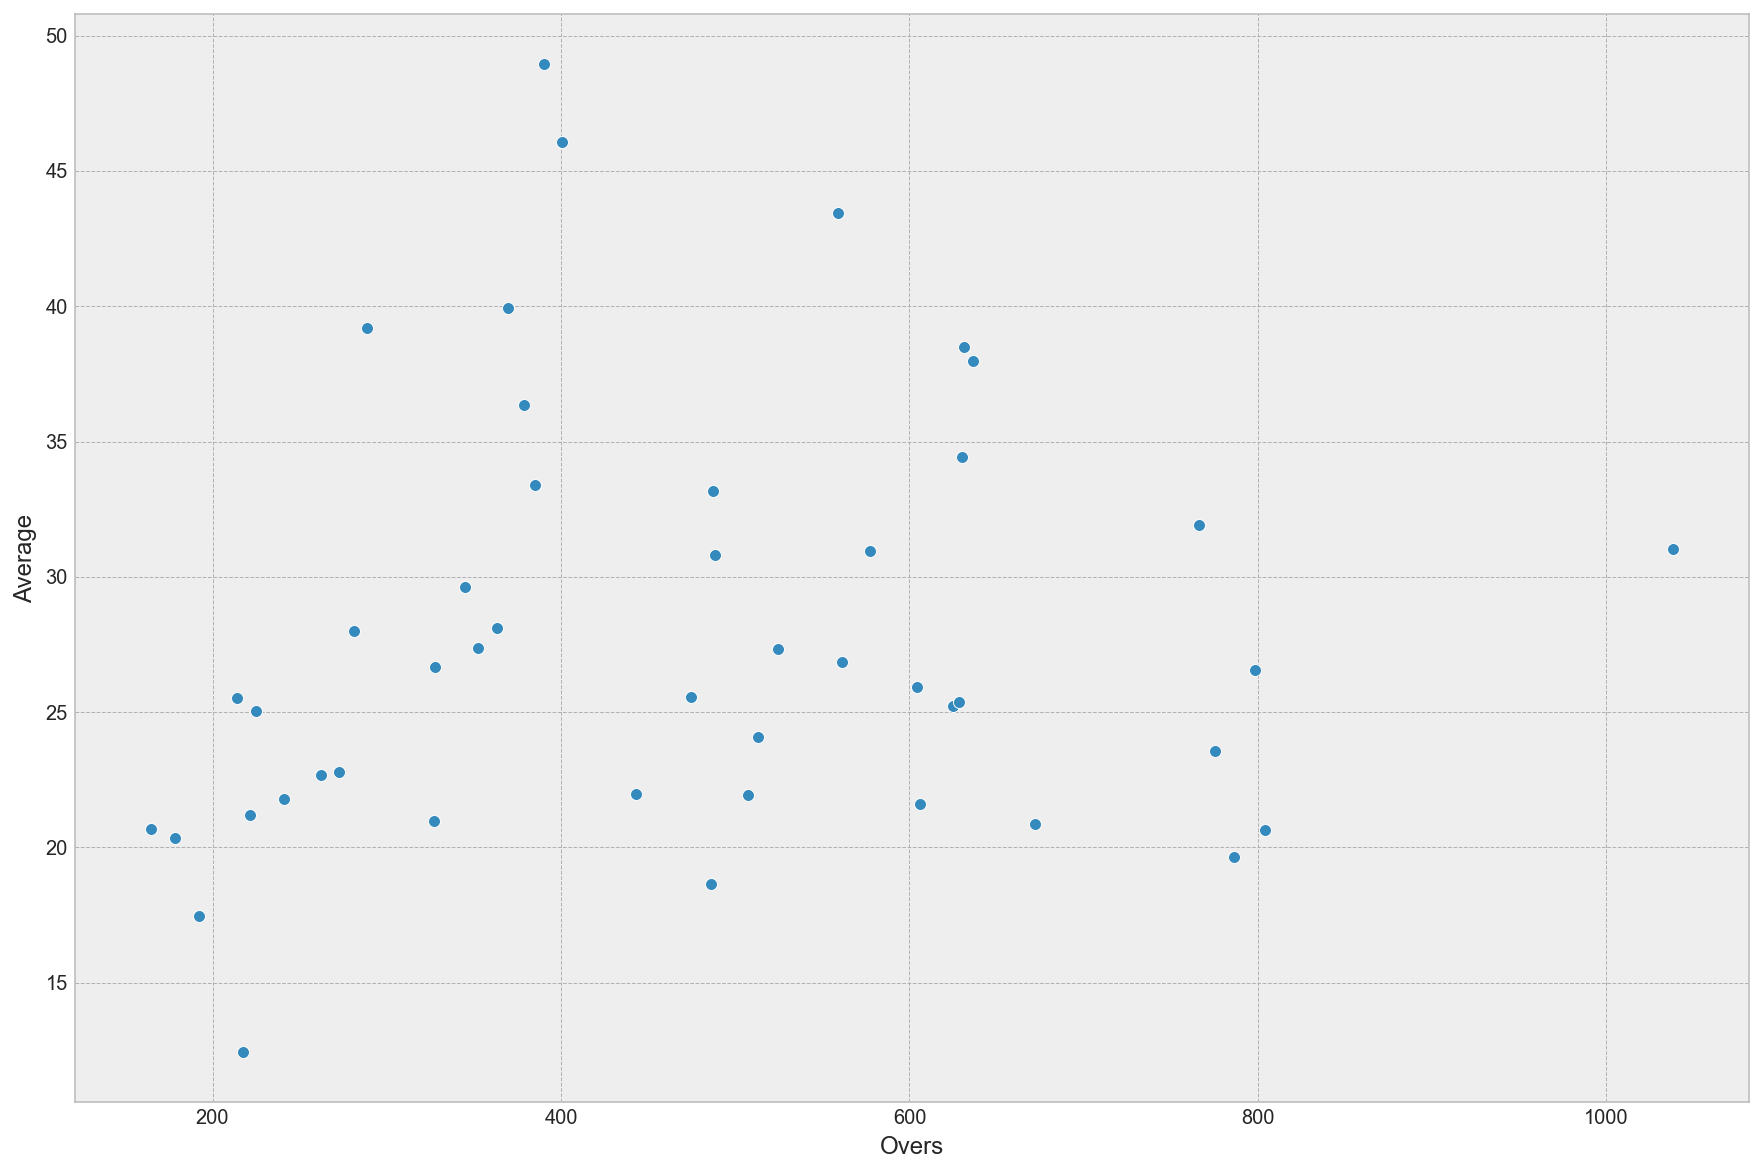

In [112]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Bowling_Stats, x = "Overs", y = 'Average');

### Overs vs Economy

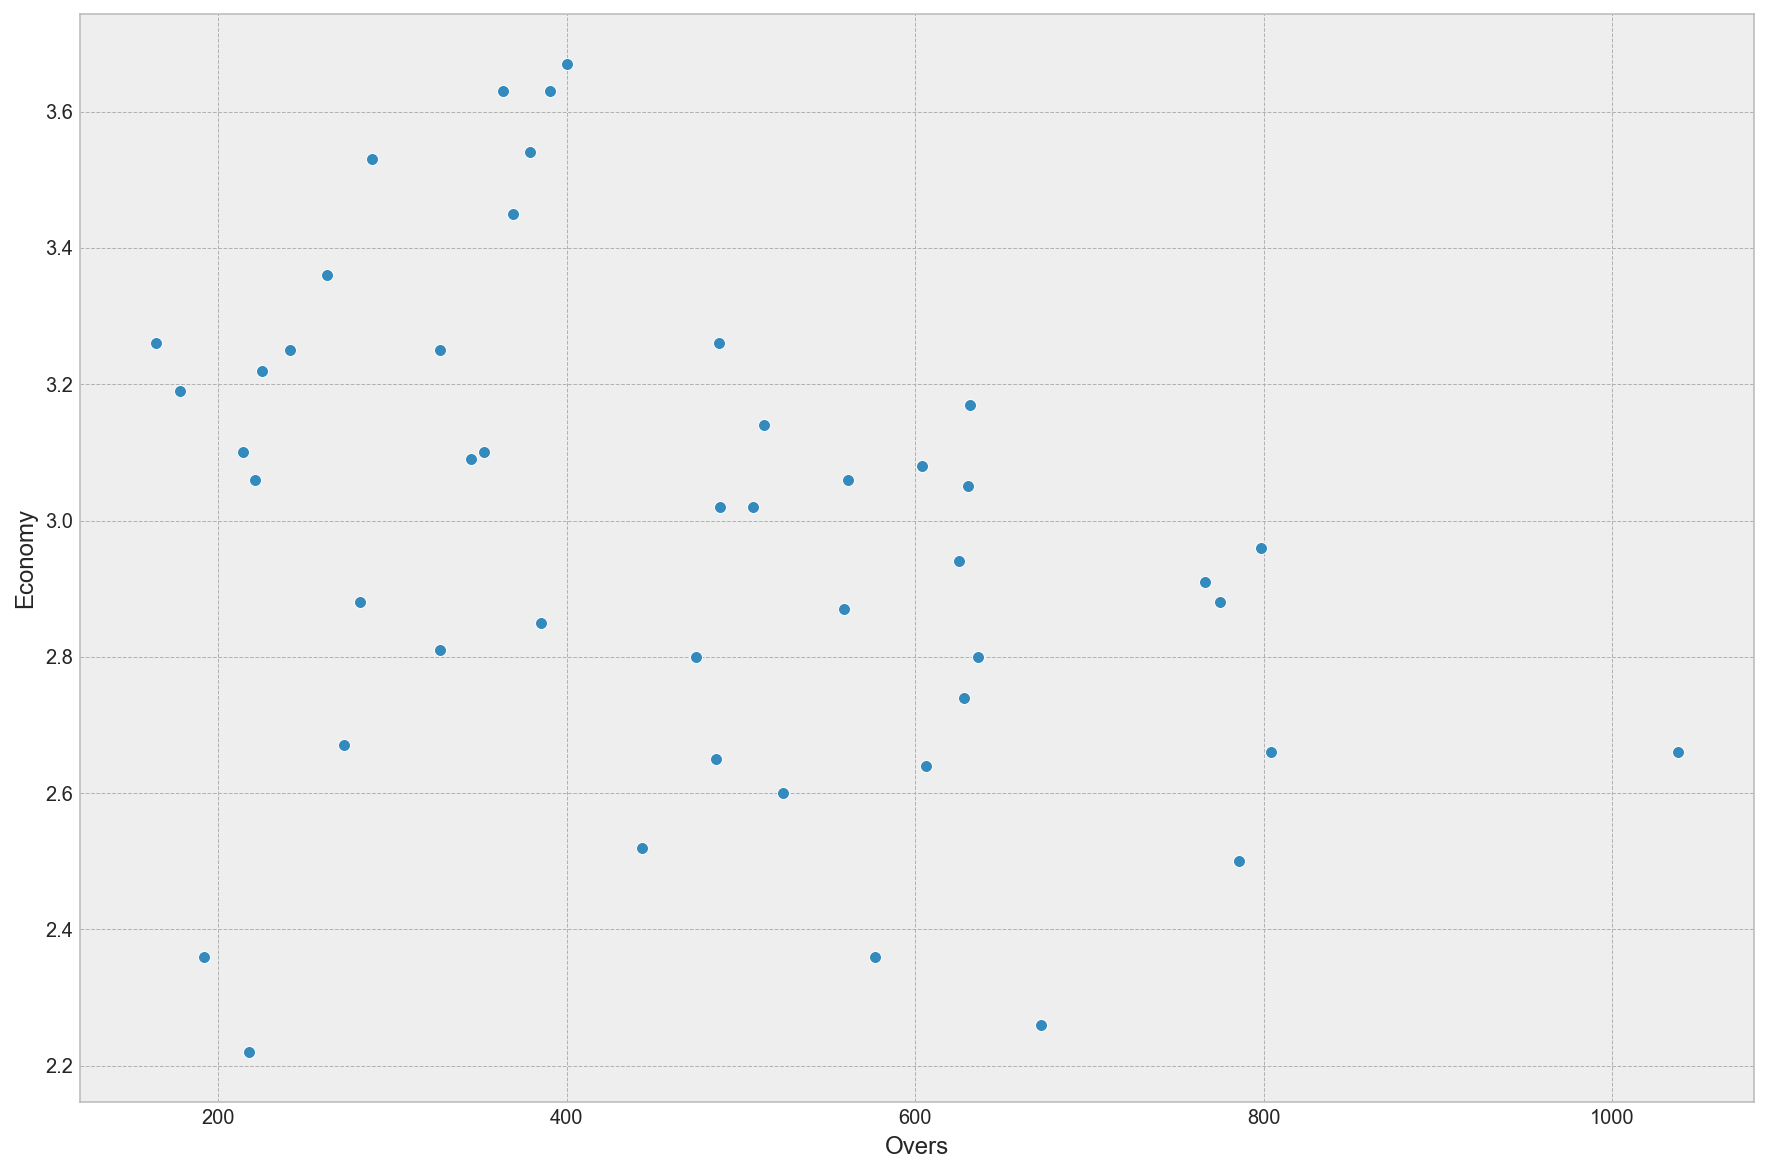

In [113]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Bowling_Stats, x = "Overs", y = 'Economy');

### Strike rate vs WIcket

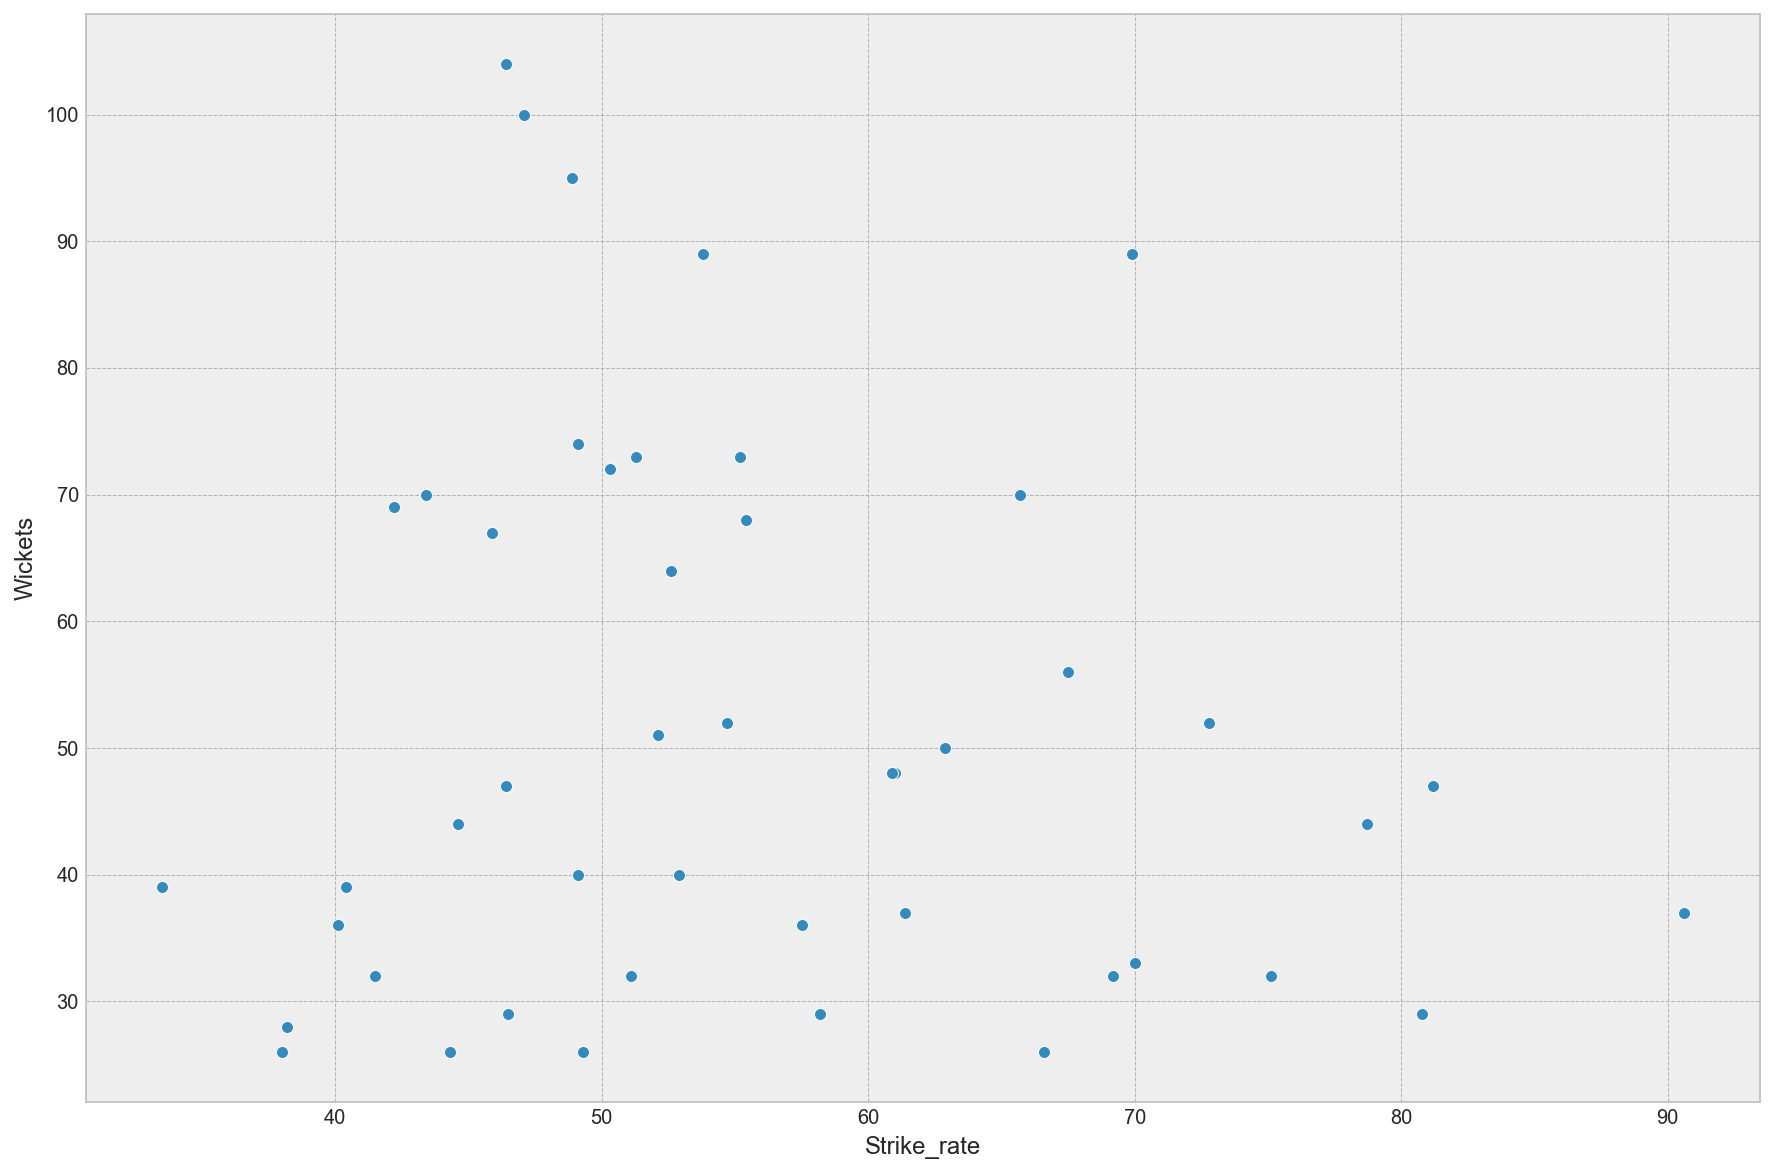

In [114]:
plt.figure(figsize=(15,10))
sns.scatterplot(data = Icc_WTC_Bowling_Stats, x = "Strike_rate", y = 'Wickets');